In [1]:
#=======================================
## Tree-like neural network - Housing
#=======================================

#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense, concatenate, Dropout


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#----------------------------------------
# Load the Housing dataset.

dataset = np.loadtxt("Housing-Training-Data.txt")

print(type(dataset))

print(dataset.shape)

X = dataset[:, 0:13]
Y = dataset[:, 13]

print(X.shape)
print(Y.shape)

x_group = [[5], [12], [0], [7], [5], [12]]

X1 = dataset[:, x_group[0]]
X2 = dataset[:, x_group[1]]
X3 = dataset[:, x_group[2]]
X4 = dataset[:, x_group[3]]
X5 = dataset[:, x_group[4]]
X6 = dataset[:, x_group[5]]

print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
print(X5.shape)
print(X6.shape)
print(Y.shape)



<class 'numpy.ndarray'>
(506, 14)
(506, 13)
(506,)
(506, 1)
(506, 1)
(506, 1)
(506, 1)
(506, 1)
(506, 1)
(506,)


In [3]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

X1_sample_mean = X_sample_mean[x_group[0]]
print(np.round(X1_sample_mean, 4))

X1_sample_std = X_sample_std[x_group[0]]
print(np.round(X1_sample_std, 4))

X2_sample_mean = X_sample_mean[x_group[1]]
print(np.round(X2_sample_mean, 4))

X2_sample_std = X_sample_std[x_group[1]]
print(np.round(X2_sample_std, 4))

X3_sample_mean = X_sample_mean[x_group[2]]
print(np.round(X3_sample_mean, 4))

X3_sample_std = X_sample_std[x_group[2]]
print(np.round(X3_sample_std, 4))

X4_sample_mean = X_sample_mean[x_group[3]]
print(np.round(X4_sample_mean, 4))

X4_sample_std = X_sample_std[x_group[3]]
print(np.round(X4_sample_std, 4))

X5_sample_mean = X_sample_mean[x_group[4]]
print(np.round(X5_sample_mean, 4))

X5_sample_std = X_sample_std[x_group[4]]
print(np.round(X5_sample_std, 4))

X6_sample_mean = X_sample_mean[x_group[5]]
print(np.round(X6_sample_mean, 4))

X6_sample_std = X_sample_std[x_group[5]]
print(np.round(X6_sample_std, 4))

Y_sample_mean = np.mean(Y, axis = 0)
print(np.round(Y_sample_mean, 4))

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
print(np.round(Y_sample_std, 4))

#----------------------------------------
standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

X1_train = X_train[:, x_group[0]]
X2_train = X_train[:, x_group[1]]
X3_train = X_train[:, x_group[2]]
X4_train = X_train[:, x_group[3]]
X5_train = X_train[:, x_group[4]]
X6_train = X_train[:, x_group[5]]

print(np.round(np.mean(X1_train, axis = 0), 4))
print(np.round(np.std(X1_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X2_train, axis = 0), 4))
print(np.round(np.std(X2_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X3_train, axis = 0), 4))
print(np.round(np.std(X3_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X4_train, axis = 0), 4))
print(np.round(np.std(X4_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X5_train, axis = 0), 4))
print(np.round(np.std(X5_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X6_train, axis = 0), 4))
print(np.round(np.std(X6_train, axis = 0, ddof = 1), 4))

Y_train = standardize(Y)

print(np.round(np.mean(Y_train, axis = 0), 4))
print(np.round(np.std(Y_train, axis = 0, ddof = 1), 4))



[3.613500e+00 1.136360e+01 1.113680e+01 6.920000e-02 5.547000e-01
 6.284600e+00 6.857490e+01 3.795000e+00 9.549400e+00 4.082372e+02
 1.845550e+01 3.566740e+02 1.265310e+01]
[8.601500e+00 2.332250e+01 6.860400e+00 2.540000e-01 1.159000e-01
 7.026000e-01 2.814890e+01 2.105700e+00 8.707300e+00 1.685371e+02
 2.164900e+00 9.129490e+01 7.141100e+00]
[6.2846]
[0.7026]
[12.6531]
[7.1411]
[3.6135]
[8.6015]
[3.795]
[2.1057]
[6.2846]
[0.7026]
[12.6531]
[7.1411]
22.5328
9.1971
[-0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]
[0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]
-0.0
1.0


In [4]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [5]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
  input_g1 = Input(shape = (1,))
  x1 = input_g1
  t1 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x1)
  t1 = Dropout(rate = 0.1)(t1)
  #
  y11 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
  y12 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
  #
  input_g2 = Input(shape = (1,))
  x2 = concatenate([y11, input_g2], axis = 1)  # column bind
  t2 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x2)
  t2 = Dropout(rate = 0.1)(t2)
  #
  y21 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
  y22 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
  #
  input_g3 = Input(shape = (1,))
  x3 = concatenate([y21, input_g3], axis = 1)  # column bind
  t3 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x3)
  t3 = Dropout(rate = 0.1)(t3)
  #
  y31 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
  y32 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
  #
  input_g6 = Input(shape = (1,))
  x6 = concatenate([y22, input_g6], axis = 1)  # column bind
  t6 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x6)
  t6 = Dropout(rate = 0.1)(t6)
  #
  y61 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
  y62 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
  #
  input_g9 = Input(shape = (1,))
  x9 = concatenate([y12, input_g9], axis = 1)  # column bind
  t9 = Dense(units = 3, kernel_initializer = "uniform", activation = "linear")(x9)
  t9 = Dropout(rate = 0.1)(t9)
  #
  y91 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
  y92 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
  #
  input_g10 = Input(shape = (1,))
  x10 = concatenate([y91, input_g10], axis = 1)  # column bind
  t10 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x10)
  t10 = Dropout(rate = 0.1)(t10)
  #
  y101 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
  y102 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
  #
  x_final =  concatenate([y31, y32, y61, y62, y92, y101, y102], axis = 1)  # column bind
  y_final = Dense(units = 5, kernel_initializer = "uniform", activation = "relu")(x_final)
  y_final = Dropout(rate = 0.1)(y_final)
  y_final = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(y_final)
  response = y_final
  #
  model = Model(inputs = [input_g1, input_g2, input_g3, input_g6, input_g9, input_g10], 
		outputs = response)
  # Compile the model.
  model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
  # Select index sets.
  seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
  test_index = index[seq_index]
  train_index = np.delete(index, seq_index)
  # Fit the model.
  history = model.fit([X1_train[train_index], X2_train[train_index], X3_train[train_index]
  , X4_train[train_index], X5_train[train_index], X6_train[train_index]]
  , Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 1)
  # Evaluate the model.
  scores = model.evaluate([X1_train[test_index], X2_train[test_index], X3_train[test_index]
  , X4_train[test_index], X5_train[test_index], X6_train[test_index]]
  , Y_train[test_index], verbose = 1)
  print("%s: %.4f" % (model.metrics_names[0], scores[0]))
  print("%s: %.4f" % (model.metrics_names[1], scores[1]))
  cv_mse.append(scores[0])
  cv_mae.append(scores[1])


Train on 364 samples, validate on 91 samples
Epoch 1/1000
364/364 [==============================] - 2s 7ms/step - loss: 0.9928 - mean_absolute_error: 0.7223 - val_loss: 1.1070 - val_mean_absolute_error: 0.7559
Epoch 2/1000
364/364 [==============================] - 0s 443us/step - loss: 0.9929 - mean_absolute_error: 0.7220 - val_loss: 1.1075 - val_mean_absolute_error: 0.7555
Epoch 3/1000
364/364 [==============================] - 0s 238us/step - loss: 0.9925 - mean_absolute_error: 0.7219 - val_loss: 1.1068 - val_mean_absolute_error: 0.7557
Epoch 4/1000
364/364 [==============================] - 0s 245us/step - loss: 0.9923 - mean_absolute_error: 0.7222 - val_loss: 1.1059 - val_mean_absolute_error: 0.7556
Epoch 5/1000
364/364 [==============================] - 0s 324us/step - loss: 0.9908 - mean_absolute_error: 0.7220 - val_loss: 1.1021 - val_mean_absolute_error: 0.7548
Epoch 6/1000
364/364 [==============================] - 0s 390us/step - loss: 0.9867 - mean_absolute_error: 0.7211 - 

364/364 [==============================] - 0s 245us/step - loss: 0.3512 - mean_absolute_error: 0.4033 - val_loss: 0.2500 - val_mean_absolute_error: 0.3755
Epoch 50/1000
364/364 [==============================] - 0s 317us/step - loss: 0.3931 - mean_absolute_error: 0.4246 - val_loss: 0.2454 - val_mean_absolute_error: 0.3727
Epoch 51/1000
364/364 [==============================] - 0s 336us/step - loss: 0.3905 - mean_absolute_error: 0.4155 - val_loss: 0.2336 - val_mean_absolute_error: 0.3663
Epoch 52/1000
364/364 [==============================] - 0s 367us/step - loss: 0.3733 - mean_absolute_error: 0.4198 - val_loss: 0.2389 - val_mean_absolute_error: 0.3687
Epoch 53/1000
364/364 [==============================] - 0s 324us/step - loss: 0.3723 - mean_absolute_error: 0.4081 - val_loss: 0.2419 - val_mean_absolute_error: 0.3713
Epoch 54/1000
364/364 [==============================] - 0s 293us/step - loss: 0.3503 - mean_absolute_error: 0.4066 - val_loss: 0.2282 - val_mean_absolute_error: 0.3634


364/364 [==============================] - 0s 225us/step - loss: 0.3194 - mean_absolute_error: 0.3788 - val_loss: 0.1998 - val_mean_absolute_error: 0.3545
Epoch 98/1000
364/364 [==============================] - 0s 402us/step - loss: 0.2993 - mean_absolute_error: 0.3849 - val_loss: 0.1951 - val_mean_absolute_error: 0.3530
Epoch 99/1000
364/364 [==============================] - 0s 326us/step - loss: 0.2918 - mean_absolute_error: 0.3789 - val_loss: 0.1880 - val_mean_absolute_error: 0.3496
Epoch 100/1000
364/364 [==============================] - 0s 270us/step - loss: 0.3600 - mean_absolute_error: 0.3956 - val_loss: 0.1920 - val_mean_absolute_error: 0.3506
Epoch 101/1000
364/364 [==============================] - 0s 304us/step - loss: 0.3000 - mean_absolute_error: 0.3835 - val_loss: 0.1994 - val_mean_absolute_error: 0.3542
Epoch 102/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2867 - mean_absolute_error: 0.3820 - val_loss: 0.1875 - val_mean_absolute_error: 0.34

364/364 [==============================] - 0s 274us/step - loss: 0.2736 - mean_absolute_error: 0.3667 - val_loss: 0.1752 - val_mean_absolute_error: 0.3326
Epoch 146/1000
364/364 [==============================] - 0s 281us/step - loss: 0.2981 - mean_absolute_error: 0.3807 - val_loss: 0.1744 - val_mean_absolute_error: 0.3314
Epoch 147/1000
364/364 [==============================] - 0s 298us/step - loss: 0.2894 - mean_absolute_error: 0.3731 - val_loss: 0.1770 - val_mean_absolute_error: 0.3338
Epoch 148/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2824 - mean_absolute_error: 0.3615 - val_loss: 0.1808 - val_mean_absolute_error: 0.3358
Epoch 149/1000
364/364 [==============================] - 0s 324us/step - loss: 0.2817 - mean_absolute_error: 0.3673 - val_loss: 0.1806 - val_mean_absolute_error: 0.3359
Epoch 150/1000
364/364 [==============================] - 0s 291us/step - loss: 0.2738 - mean_absolute_error: 0.3652 - val_loss: 0.1770 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 333us/step - loss: 0.2881 - mean_absolute_error: 0.3738 - val_loss: 0.1733 - val_mean_absolute_error: 0.3325
Epoch 194/1000
364/364 [==============================] - 0s 255us/step - loss: 0.2982 - mean_absolute_error: 0.3718 - val_loss: 0.1830 - val_mean_absolute_error: 0.3372
Epoch 195/1000
364/364 [==============================] - 0s 259us/step - loss: 0.2675 - mean_absolute_error: 0.3523 - val_loss: 0.1824 - val_mean_absolute_error: 0.3376
Epoch 196/1000
364/364 [==============================] - 0s 293us/step - loss: 0.2731 - mean_absolute_error: 0.3506 - val_loss: 0.1819 - val_mean_absolute_error: 0.3380
Epoch 197/1000
364/364 [==============================] - 0s 288us/step - loss: 0.2993 - mean_absolute_error: 0.3646 - val_loss: 0.1836 - val_mean_absolute_error: 0.3397
Epoch 198/1000
364/364 [==============================] - 0s 339us/step - loss: 0.3122 - mean_absolute_error: 0.3833 - val_loss: 0.1817 - val_mean_absolute_error: 0.

Epoch 241/1000
364/364 [==============================] - 0s 284us/step - loss: 0.2779 - mean_absolute_error: 0.3634 - val_loss: 0.1772 - val_mean_absolute_error: 0.3344
Epoch 242/1000
364/364 [==============================] - 0s 271us/step - loss: 0.2834 - mean_absolute_error: 0.3643 - val_loss: 0.1762 - val_mean_absolute_error: 0.3329
Epoch 243/1000
364/364 [==============================] - 0s 520us/step - loss: 0.2672 - mean_absolute_error: 0.3711 - val_loss: 0.1796 - val_mean_absolute_error: 0.3355
Epoch 244/1000
364/364 [==============================] - 0s 283us/step - loss: 0.2784 - mean_absolute_error: 0.3607 - val_loss: 0.1801 - val_mean_absolute_error: 0.3375
Epoch 245/1000
364/364 [==============================] - 0s 311us/step - loss: 0.2672 - mean_absolute_error: 0.3702 - val_loss: 0.1806 - val_mean_absolute_error: 0.3368
Epoch 246/1000
364/364 [==============================] - 0s 289us/step - loss: 0.2799 - mean_absolute_error: 0.3483 - val_loss: 0.1818 - val_mean_abs

364/364 [==============================] - 0s 258us/step - loss: 0.2913 - mean_absolute_error: 0.3808 - val_loss: 0.1818 - val_mean_absolute_error: 0.3326
Epoch 290/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3081 - mean_absolute_error: 0.3754 - val_loss: 0.1823 - val_mean_absolute_error: 0.3327
Epoch 291/1000
364/364 [==============================] - 0s 254us/step - loss: 0.2455 - mean_absolute_error: 0.3572 - val_loss: 0.1695 - val_mean_absolute_error: 0.3282
Epoch 292/1000
364/364 [==============================] - 0s 372us/step - loss: 0.2707 - mean_absolute_error: 0.3587 - val_loss: 0.1735 - val_mean_absolute_error: 0.3293
Epoch 293/1000
364/364 [==============================] - 0s 371us/step - loss: 0.2681 - mean_absolute_error: 0.3530 - val_loss: 0.1742 - val_mean_absolute_error: 0.3274
Epoch 294/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2510 - mean_absolute_error: 0.3516 - val_loss: 0.1709 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 311us/step - loss: 0.2740 - mean_absolute_error: 0.3430 - val_loss: 0.1625 - val_mean_absolute_error: 0.3156
Epoch 338/1000
364/364 [==============================] - 0s 258us/step - loss: 0.2604 - mean_absolute_error: 0.3412 - val_loss: 0.1709 - val_mean_absolute_error: 0.3216
Epoch 339/1000
364/364 [==============================] - 0s 315us/step - loss: 0.2634 - mean_absolute_error: 0.3694 - val_loss: 0.1732 - val_mean_absolute_error: 0.3238
Epoch 340/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2342 - mean_absolute_error: 0.3385 - val_loss: 0.1613 - val_mean_absolute_error: 0.3134
Epoch 341/1000
364/364 [==============================] - 0s 319us/step - loss: 0.2612 - mean_absolute_error: 0.3566 - val_loss: 0.1663 - val_mean_absolute_error: 0.3170
Epoch 342/1000
364/364 [==============================] - 0s 332us/step - loss: 0.2771 - mean_absolute_error: 0.3534 - val_loss: 0.1569 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 330us/step - loss: 0.2987 - mean_absolute_error: 0.3646 - val_loss: 0.1639 - val_mean_absolute_error: 0.3140
Epoch 386/1000
364/364 [==============================] - 0s 323us/step - loss: 0.2529 - mean_absolute_error: 0.3542 - val_loss: 0.1649 - val_mean_absolute_error: 0.3133
Epoch 387/1000
364/364 [==============================] - 0s 291us/step - loss: 0.2091 - mean_absolute_error: 0.3269 - val_loss: 0.1599 - val_mean_absolute_error: 0.3097
Epoch 388/1000
364/364 [==============================] - 0s 319us/step - loss: 0.2582 - mean_absolute_error: 0.3515 - val_loss: 0.1633 - val_mean_absolute_error: 0.3112
Epoch 389/1000
364/364 [==============================] - 0s 308us/step - loss: 0.2458 - mean_absolute_error: 0.3369 - val_loss: 0.1687 - val_mean_absolute_error: 0.3175
Epoch 390/1000
364/364 [==============================] - 0s 348us/step - loss: 0.2655 - mean_absolute_error: 0.3599 - val_loss: 0.1664 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 253us/step - loss: 0.2190 - mean_absolute_error: 0.3303 - val_loss: 0.1612 - val_mean_absolute_error: 0.3046
Epoch 434/1000
364/364 [==============================] - 0s 282us/step - loss: 0.2025 - mean_absolute_error: 0.3241 - val_loss: 0.1607 - val_mean_absolute_error: 0.3058
Epoch 435/1000
364/364 [==============================] - 0s 310us/step - loss: 0.2392 - mean_absolute_error: 0.3415 - val_loss: 0.1603 - val_mean_absolute_error: 0.3063
Epoch 436/1000
364/364 [==============================] - 0s 294us/step - loss: 0.2499 - mean_absolute_error: 0.3441 - val_loss: 0.1570 - val_mean_absolute_error: 0.3039
Epoch 437/1000
364/364 [==============================] - 0s 494us/step - loss: 0.2410 - mean_absolute_error: 0.3433 - val_loss: 0.1587 - val_mean_absolute_error: 0.3043
Epoch 438/1000
364/364 [==============================] - 0s 261us/step - loss: 0.2941 - mean_absolute_error: 0.3519 - val_loss: 0.1687 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 212us/step - loss: 0.2813 - mean_absolute_error: 0.3552 - val_loss: 0.1629 - val_mean_absolute_error: 0.3056
Epoch 482/1000
364/364 [==============================] - 0s 258us/step - loss: 0.2759 - mean_absolute_error: 0.3375 - val_loss: 0.1587 - val_mean_absolute_error: 0.3008
Epoch 483/1000
364/364 [==============================] - 0s 318us/step - loss: 0.2040 - mean_absolute_error: 0.3327 - val_loss: 0.1649 - val_mean_absolute_error: 0.3065
Epoch 484/1000
364/364 [==============================] - 0s 324us/step - loss: 0.2333 - mean_absolute_error: 0.3290 - val_loss: 0.1623 - val_mean_absolute_error: 0.3037
Epoch 485/1000
364/364 [==============================] - 0s 301us/step - loss: 0.2448 - mean_absolute_error: 0.3445 - val_loss: 0.1618 - val_mean_absolute_error: 0.3038
Epoch 486/1000
364/364 [==============================] - 0s 328us/step - loss: 0.2120 - mean_absolute_error: 0.3279 - val_loss: 0.1628 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 228us/step - loss: 0.2547 - mean_absolute_error: 0.3479 - val_loss: 0.1539 - val_mean_absolute_error: 0.2967
Epoch 530/1000
364/364 [==============================] - 0s 240us/step - loss: 0.2392 - mean_absolute_error: 0.3354 - val_loss: 0.1563 - val_mean_absolute_error: 0.2985
Epoch 531/1000
364/364 [==============================] - 0s 283us/step - loss: 0.2126 - mean_absolute_error: 0.3291 - val_loss: 0.1559 - val_mean_absolute_error: 0.2983
Epoch 532/1000
364/364 [==============================] - 0s 329us/step - loss: 0.2304 - mean_absolute_error: 0.3534 - val_loss: 0.1546 - val_mean_absolute_error: 0.2975
Epoch 533/1000
364/364 [==============================] - 0s 300us/step - loss: 0.2198 - mean_absolute_error: 0.3302 - val_loss: 0.1547 - val_mean_absolute_error: 0.2971
Epoch 534/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2378 - mean_absolute_error: 0.3386 - val_loss: 0.1556 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 234us/step - loss: 0.1986 - mean_absolute_error: 0.3290 - val_loss: 0.1581 - val_mean_absolute_error: 0.3018
Epoch 578/1000
364/364 [==============================] - 0s 180us/step - loss: 0.2174 - mean_absolute_error: 0.3304 - val_loss: 0.1520 - val_mean_absolute_error: 0.2952
Epoch 579/1000
364/364 [==============================] - 0s 250us/step - loss: 0.2156 - mean_absolute_error: 0.3363 - val_loss: 0.1514 - val_mean_absolute_error: 0.2953
Epoch 580/1000
364/364 [==============================] - 0s 305us/step - loss: 0.2151 - mean_absolute_error: 0.3231 - val_loss: 0.1526 - val_mean_absolute_error: 0.2958
Epoch 581/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2305 - mean_absolute_error: 0.3329 - val_loss: 0.1549 - val_mean_absolute_error: 0.2976
Epoch 582/1000
364/364 [==============================] - 0s 287us/step - loss: 0.2386 - mean_absolute_error: 0.3284 - val_loss: 0.1555 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 230us/step - loss: 0.2485 - mean_absolute_error: 0.3414 - val_loss: 0.1532 - val_mean_absolute_error: 0.2953
Epoch 626/1000
364/364 [==============================] - 0s 228us/step - loss: 0.2646 - mean_absolute_error: 0.3487 - val_loss: 0.1543 - val_mean_absolute_error: 0.2961
Epoch 627/1000
364/364 [==============================] - 0s 243us/step - loss: 0.2154 - mean_absolute_error: 0.3362 - val_loss: 0.1500 - val_mean_absolute_error: 0.2924
Epoch 628/1000
364/364 [==============================] - 0s 283us/step - loss: 0.1926 - mean_absolute_error: 0.3190 - val_loss: 0.1497 - val_mean_absolute_error: 0.2928
Epoch 629/1000
364/364 [==============================] - 0s 300us/step - loss: 0.2171 - mean_absolute_error: 0.3325 - val_loss: 0.1471 - val_mean_absolute_error: 0.2888
Epoch 630/1000
364/364 [==============================] - 0s 282us/step - loss: 0.2124 - mean_absolute_error: 0.3291 - val_loss: 0.1538 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 240us/step - loss: 0.2057 - mean_absolute_error: 0.3200 - val_loss: 0.1572 - val_mean_absolute_error: 0.3009
Epoch 674/1000
364/364 [==============================] - 0s 334us/step - loss: 0.2039 - mean_absolute_error: 0.3240 - val_loss: 0.1571 - val_mean_absolute_error: 0.3014
Epoch 675/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2255 - mean_absolute_error: 0.3358 - val_loss: 0.1595 - val_mean_absolute_error: 0.3037
Epoch 676/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2283 - mean_absolute_error: 0.3320 - val_loss: 0.1535 - val_mean_absolute_error: 0.2951
Epoch 677/1000
364/364 [==============================] - 0s 297us/step - loss: 0.2342 - mean_absolute_error: 0.3221 - val_loss: 0.1514 - val_mean_absolute_error: 0.2929
Epoch 678/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2480 - mean_absolute_error: 0.3512 - val_loss: 0.1508 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 429us/step - loss: 0.1783 - mean_absolute_error: 0.3111 - val_loss: 0.1498 - val_mean_absolute_error: 0.2904
Epoch 722/1000
364/364 [==============================] - 0s 272us/step - loss: 0.1771 - mean_absolute_error: 0.3141 - val_loss: 0.1493 - val_mean_absolute_error: 0.2893
Epoch 723/1000
364/364 [==============================] - 0s 244us/step - loss: 0.2133 - mean_absolute_error: 0.3221 - val_loss: 0.1502 - val_mean_absolute_error: 0.2915
Epoch 724/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2011 - mean_absolute_error: 0.3221 - val_loss: 0.1521 - val_mean_absolute_error: 0.2933
Epoch 725/1000
364/364 [==============================] - 0s 342us/step - loss: 0.2509 - mean_absolute_error: 0.3345 - val_loss: 0.1498 - val_mean_absolute_error: 0.2896
Epoch 726/1000
364/364 [==============================] - 0s 305us/step - loss: 0.1877 - mean_absolute_error: 0.3167 - val_loss: 0.1535 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 288us/step - loss: 0.2090 - mean_absolute_error: 0.3205 - val_loss: 0.1518 - val_mean_absolute_error: 0.2909
Epoch 770/1000
364/364 [==============================] - 0s 336us/step - loss: 0.2099 - mean_absolute_error: 0.3282 - val_loss: 0.1537 - val_mean_absolute_error: 0.2937
Epoch 771/1000
364/364 [==============================] - 0s 247us/step - loss: 0.2132 - mean_absolute_error: 0.3225 - val_loss: 0.1564 - val_mean_absolute_error: 0.2969
Epoch 772/1000
364/364 [==============================] - 0s 319us/step - loss: 0.1860 - mean_absolute_error: 0.3145 - val_loss: 0.1518 - val_mean_absolute_error: 0.2921
Epoch 773/1000
364/364 [==============================] - 0s 241us/step - loss: 0.1999 - mean_absolute_error: 0.3331 - val_loss: 0.1495 - val_mean_absolute_error: 0.2862
Epoch 774/1000
364/364 [==============================] - 0s 283us/step - loss: 0.2325 - mean_absolute_error: 0.3220 - val_loss: 0.1516 - val_mean_absolute_error: 0.

Epoch 817/1000
364/364 [==============================] - 0s 210us/step - loss: 0.2262 - mean_absolute_error: 0.3278 - val_loss: 0.1616 - val_mean_absolute_error: 0.3042
Epoch 818/1000
364/364 [==============================] - 0s 286us/step - loss: 0.2192 - mean_absolute_error: 0.3275 - val_loss: 0.1494 - val_mean_absolute_error: 0.2897
Epoch 819/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2470 - mean_absolute_error: 0.3464 - val_loss: 0.1501 - val_mean_absolute_error: 0.2873
Epoch 820/1000
364/364 [==============================] - 0s 325us/step - loss: 0.1890 - mean_absolute_error: 0.3199 - val_loss: 0.1701 - val_mean_absolute_error: 0.3100
Epoch 821/1000
364/364 [==============================] - 0s 328us/step - loss: 0.1744 - mean_absolute_error: 0.3178 - val_loss: 0.1527 - val_mean_absolute_error: 0.2892
Epoch 822/1000
364/364 [==============================] - 0s 265us/step - loss: 0.2259 - mean_absolute_error: 0.3370 - val_loss: 0.1492 - val_mean_abs

364/364 [==============================] - 0s 280us/step - loss: 0.1925 - mean_absolute_error: 0.3114 - val_loss: 0.1535 - val_mean_absolute_error: 0.2930
Epoch 866/1000
364/364 [==============================] - 0s 282us/step - loss: 0.2274 - mean_absolute_error: 0.3293 - val_loss: 0.1556 - val_mean_absolute_error: 0.2943
Epoch 867/1000
364/364 [==============================] - 0s 280us/step - loss: 0.2111 - mean_absolute_error: 0.3224 - val_loss: 0.1517 - val_mean_absolute_error: 0.2922
Epoch 868/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2634 - mean_absolute_error: 0.3623 - val_loss: 0.1560 - val_mean_absolute_error: 0.2980
Epoch 869/1000
364/364 [==============================] - 0s 305us/step - loss: 0.1941 - mean_absolute_error: 0.3225 - val_loss: 0.1503 - val_mean_absolute_error: 0.2910
Epoch 870/1000
364/364 [==============================] - 0s 285us/step - loss: 0.1789 - mean_absolute_error: 0.3158 - val_loss: 0.1512 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 226us/step - loss: 0.1895 - mean_absolute_error: 0.3138 - val_loss: 0.1500 - val_mean_absolute_error: 0.2818
Epoch 914/1000
364/364 [==============================] - 0s 274us/step - loss: 0.2003 - mean_absolute_error: 0.3111 - val_loss: 0.1509 - val_mean_absolute_error: 0.2847
Epoch 915/1000
364/364 [==============================] - 0s 233us/step - loss: 0.1839 - mean_absolute_error: 0.3134 - val_loss: 0.1510 - val_mean_absolute_error: 0.2860
Epoch 916/1000
364/364 [==============================] - 0s 252us/step - loss: 0.1990 - mean_absolute_error: 0.3199 - val_loss: 0.1493 - val_mean_absolute_error: 0.2832
Epoch 917/1000
364/364 [==============================] - 0s 267us/step - loss: 0.1797 - mean_absolute_error: 0.3073 - val_loss: 0.1544 - val_mean_absolute_error: 0.2907
Epoch 918/1000
364/364 [==============================] - 0s 344us/step - loss: 0.1947 - mean_absolute_error: 0.3201 - val_loss: 0.1498 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 365us/step - loss: 0.1930 - mean_absolute_error: 0.3159 - val_loss: 0.1521 - val_mean_absolute_error: 0.2889
Epoch 962/1000
364/364 [==============================] - 0s 239us/step - loss: 0.2567 - mean_absolute_error: 0.3467 - val_loss: 0.1477 - val_mean_absolute_error: 0.2859
Epoch 963/1000
364/364 [==============================] - 0s 263us/step - loss: 0.1963 - mean_absolute_error: 0.3153 - val_loss: 0.1483 - val_mean_absolute_error: 0.2860
Epoch 964/1000
364/364 [==============================] - 0s 228us/step - loss: 0.2194 - mean_absolute_error: 0.3283 - val_loss: 0.1523 - val_mean_absolute_error: 0.2909
Epoch 965/1000
364/364 [==============================] - 0s 278us/step - loss: 0.2438 - mean_absolute_error: 0.3352 - val_loss: 0.1522 - val_mean_absolute_error: 0.2905
Epoch 966/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2179 - mean_absolute_error: 0.3458 - val_loss: 0.1484 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 273us/step - loss: 0.8440 - mean_absolute_error: 0.6714 - val_loss: 1.0693 - val_mean_absolute_error: 0.7405
Epoch 9/1000
364/364 [==============================] - 0s 233us/step - loss: 0.8275 - mean_absolute_error: 0.6647 - val_loss: 1.0385 - val_mean_absolute_error: 0.7299
Epoch 10/1000
364/364 [==============================] - 0s 252us/step - loss: 0.8035 - mean_absolute_error: 0.6568 - val_loss: 0.9880 - val_mean_absolute_error: 0.7132
Epoch 11/1000
364/364 [==============================] - 0s 280us/step - loss: 0.7684 - mean_absolute_error: 0.6431 - val_loss: 0.9244 - val_mean_absolute_error: 0.6915
Epoch 12/1000
364/364 [==============================] - 0s 263us/step - loss: 0.7131 - mean_absolute_error: 0.6246 - val_loss: 0.8449 - val_mean_absolute_error: 0.6673
Epoch 13/1000
364/364 [==============================] - 0s 215us/step - loss: 0.6528 - mean_absolute_error: 0.6025 - val_loss: 0.7594 - val_mean_absolute_error: 0.6376
E

364/364 [==============================] - 0s 291us/step - loss: 0.3178 - mean_absolute_error: 0.3969 - val_loss: 0.2601 - val_mean_absolute_error: 0.3786
Epoch 57/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3193 - mean_absolute_error: 0.3957 - val_loss: 0.2605 - val_mean_absolute_error: 0.3777
Epoch 58/1000
364/364 [==============================] - 0s 284us/step - loss: 0.2662 - mean_absolute_error: 0.3725 - val_loss: 0.2587 - val_mean_absolute_error: 0.3757
Epoch 59/1000
364/364 [==============================] - 0s 282us/step - loss: 0.3086 - mean_absolute_error: 0.3847 - val_loss: 0.2566 - val_mean_absolute_error: 0.3716
Epoch 60/1000
364/364 [==============================] - 0s 251us/step - loss: 0.3080 - mean_absolute_error: 0.3868 - val_loss: 0.2430 - val_mean_absolute_error: 0.3616
Epoch 61/1000
364/364 [==============================] - 0s 269us/step - loss: 0.3107 - mean_absolute_error: 0.3962 - val_loss: 0.2464 - val_mean_absolute_error: 0.3657


364/364 [==============================] - 0s 211us/step - loss: 0.2675 - mean_absolute_error: 0.3507 - val_loss: 0.2015 - val_mean_absolute_error: 0.3306
Epoch 105/1000
364/364 [==============================] - 0s 278us/step - loss: 0.2572 - mean_absolute_error: 0.3552 - val_loss: 0.2042 - val_mean_absolute_error: 0.3340
Epoch 106/1000
364/364 [==============================] - 0s 288us/step - loss: 0.2455 - mean_absolute_error: 0.3496 - val_loss: 0.2022 - val_mean_absolute_error: 0.3319
Epoch 107/1000
364/364 [==============================] - 0s 248us/step - loss: 0.2515 - mean_absolute_error: 0.3378 - val_loss: 0.1972 - val_mean_absolute_error: 0.3277
Epoch 108/1000
364/364 [==============================] - 0s 296us/step - loss: 0.2826 - mean_absolute_error: 0.3592 - val_loss: 0.2008 - val_mean_absolute_error: 0.3309
Epoch 109/1000
364/364 [==============================] - 0s 260us/step - loss: 0.2703 - mean_absolute_error: 0.3581 - val_loss: 0.2051 - val_mean_absolute_error: 0.

Epoch 152/1000
364/364 [==============================] - 0s 237us/step - loss: 0.2323 - mean_absolute_error: 0.3434 - val_loss: 0.2005 - val_mean_absolute_error: 0.3261
Epoch 153/1000
364/364 [==============================] - 0s 229us/step - loss: 0.2997 - mean_absolute_error: 0.3660 - val_loss: 0.2075 - val_mean_absolute_error: 0.3312
Epoch 154/1000
364/364 [==============================] - 0s 571us/step - loss: 0.2607 - mean_absolute_error: 0.3509 - val_loss: 0.1991 - val_mean_absolute_error: 0.3256
Epoch 155/1000
364/364 [==============================] - 0s 263us/step - loss: 0.3021 - mean_absolute_error: 0.3738 - val_loss: 0.1968 - val_mean_absolute_error: 0.3238
Epoch 156/1000
364/364 [==============================] - 0s 203us/step - loss: 0.2539 - mean_absolute_error: 0.3498 - val_loss: 0.1910 - val_mean_absolute_error: 0.3192
Epoch 157/1000
364/364 [==============================] - 0s 289us/step - loss: 0.2839 - mean_absolute_error: 0.3567 - val_loss: 0.1893 - val_mean_abs

364/364 [==============================] - 0s 275us/step - loss: 0.2392 - mean_absolute_error: 0.3379 - val_loss: 0.1956 - val_mean_absolute_error: 0.3201
Epoch 201/1000
364/364 [==============================] - 0s 230us/step - loss: 0.2478 - mean_absolute_error: 0.3345 - val_loss: 0.2014 - val_mean_absolute_error: 0.3255
Epoch 202/1000
364/364 [==============================] - 0s 266us/step - loss: 0.2435 - mean_absolute_error: 0.3411 - val_loss: 0.2014 - val_mean_absolute_error: 0.3244
Epoch 203/1000
364/364 [==============================] - 0s 270us/step - loss: 0.2159 - mean_absolute_error: 0.3267 - val_loss: 0.1946 - val_mean_absolute_error: 0.3191
Epoch 204/1000
364/364 [==============================] - 0s 248us/step - loss: 0.2287 - mean_absolute_error: 0.3290 - val_loss: 0.1913 - val_mean_absolute_error: 0.3166
Epoch 205/1000
364/364 [==============================] - 0s 266us/step - loss: 0.2936 - mean_absolute_error: 0.3508 - val_loss: 0.1866 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 268us/step - loss: 0.2418 - mean_absolute_error: 0.3426 - val_loss: 0.1867 - val_mean_absolute_error: 0.3129
Epoch 249/1000
364/364 [==============================] - 0s 277us/step - loss: 0.2439 - mean_absolute_error: 0.3448 - val_loss: 0.1759 - val_mean_absolute_error: 0.3048
Epoch 250/1000
364/364 [==============================] - 0s 276us/step - loss: 0.2427 - mean_absolute_error: 0.3407 - val_loss: 0.1809 - val_mean_absolute_error: 0.3086
Epoch 251/1000
364/364 [==============================] - 0s 236us/step - loss: 0.2360 - mean_absolute_error: 0.3390 - val_loss: 0.1932 - val_mean_absolute_error: 0.3185
Epoch 252/1000
364/364 [==============================] - 0s 255us/step - loss: 0.2415 - mean_absolute_error: 0.3321 - val_loss: 0.1913 - val_mean_absolute_error: 0.3163
Epoch 253/1000
364/364 [==============================] - 0s 270us/step - loss: 0.2277 - mean_absolute_error: 0.3234 - val_loss: 0.1904 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 275us/step - loss: 0.2244 - mean_absolute_error: 0.3259 - val_loss: 0.1933 - val_mean_absolute_error: 0.3173
Epoch 297/1000
364/364 [==============================] - 0s 207us/step - loss: 0.2776 - mean_absolute_error: 0.3432 - val_loss: 0.1900 - val_mean_absolute_error: 0.3150
Epoch 298/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2739 - mean_absolute_error: 0.3449 - val_loss: 0.1826 - val_mean_absolute_error: 0.3097
Epoch 299/1000
364/364 [==============================] - 0s 243us/step - loss: 0.2423 - mean_absolute_error: 0.3377 - val_loss: 0.1878 - val_mean_absolute_error: 0.3140
Epoch 300/1000
364/364 [==============================] - 0s 249us/step - loss: 0.2268 - mean_absolute_error: 0.3297 - val_loss: 0.1817 - val_mean_absolute_error: 0.3083
Epoch 301/1000
364/364 [==============================] - 0s 315us/step - loss: 0.2321 - mean_absolute_error: 0.3385 - val_loss: 0.1833 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 316us/step - loss: 0.2592 - mean_absolute_error: 0.3435 - val_loss: 0.1827 - val_mean_absolute_error: 0.3092
Epoch 345/1000
364/364 [==============================] - 0s 271us/step - loss: 0.2287 - mean_absolute_error: 0.3306 - val_loss: 0.1927 - val_mean_absolute_error: 0.3175
Epoch 346/1000
364/364 [==============================] - 0s 294us/step - loss: 0.2740 - mean_absolute_error: 0.3483 - val_loss: 0.2074 - val_mean_absolute_error: 0.3310
Epoch 347/1000
364/364 [==============================] - 0s 296us/step - loss: 0.2434 - mean_absolute_error: 0.3435 - val_loss: 0.1890 - val_mean_absolute_error: 0.3151
Epoch 348/1000
364/364 [==============================] - 0s 305us/step - loss: 0.2032 - mean_absolute_error: 0.3114 - val_loss: 0.1914 - val_mean_absolute_error: 0.3168
Epoch 349/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2584 - mean_absolute_error: 0.3355 - val_loss: 0.1875 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 215us/step - loss: 0.2006 - mean_absolute_error: 0.3134 - val_loss: 0.1927 - val_mean_absolute_error: 0.3181
Epoch 393/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2397 - mean_absolute_error: 0.3435 - val_loss: 0.1861 - val_mean_absolute_error: 0.3124
Epoch 394/1000
364/364 [==============================] - 0s 282us/step - loss: 0.2047 - mean_absolute_error: 0.3212 - val_loss: 0.1866 - val_mean_absolute_error: 0.3130
Epoch 395/1000
364/364 [==============================] - 0s 246us/step - loss: 0.2592 - mean_absolute_error: 0.3326 - val_loss: 0.1897 - val_mean_absolute_error: 0.3154
Epoch 396/1000
364/364 [==============================] - 0s 424us/step - loss: 0.2221 - mean_absolute_error: 0.3309 - val_loss: 0.1833 - val_mean_absolute_error: 0.3104
Epoch 397/1000
364/364 [==============================] - 0s 419us/step - loss: 0.2294 - mean_absolute_error: 0.3317 - val_loss: 0.1910 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 287us/step - loss: 0.2112 - mean_absolute_error: 0.3200 - val_loss: 0.1903 - val_mean_absolute_error: 0.3171
Epoch 441/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2584 - mean_absolute_error: 0.3514 - val_loss: 0.1937 - val_mean_absolute_error: 0.3194
Epoch 442/1000
364/364 [==============================] - 0s 357us/step - loss: 0.2243 - mean_absolute_error: 0.3251 - val_loss: 0.1766 - val_mean_absolute_error: 0.3061
Epoch 443/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2280 - mean_absolute_error: 0.3295 - val_loss: 0.1789 - val_mean_absolute_error: 0.3083
Epoch 444/1000
364/364 [==============================] - 0s 259us/step - loss: 0.2180 - mean_absolute_error: 0.3366 - val_loss: 0.1836 - val_mean_absolute_error: 0.3127
Epoch 445/1000
364/364 [==============================] - 0s 233us/step - loss: 0.2252 - mean_absolute_error: 0.3320 - val_loss: 0.1857 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 277us/step - loss: 0.2370 - mean_absolute_error: 0.3438 - val_loss: 0.1809 - val_mean_absolute_error: 0.3092
Epoch 489/1000
364/364 [==============================] - 0s 288us/step - loss: 0.2539 - mean_absolute_error: 0.3514 - val_loss: 0.1826 - val_mean_absolute_error: 0.3106
Epoch 490/1000
364/364 [==============================] - 0s 246us/step - loss: 0.2305 - mean_absolute_error: 0.3368 - val_loss: 0.1744 - val_mean_absolute_error: 0.3035
Epoch 491/1000
364/364 [==============================] - 0s 247us/step - loss: 0.2357 - mean_absolute_error: 0.3261 - val_loss: 0.1865 - val_mean_absolute_error: 0.3128
Epoch 492/1000
364/364 [==============================] - 0s 280us/step - loss: 0.2219 - mean_absolute_error: 0.3266 - val_loss: 0.1875 - val_mean_absolute_error: 0.3140
Epoch 493/1000
364/364 [==============================] - 0s 217us/step - loss: 0.2145 - mean_absolute_error: 0.3324 - val_loss: 0.1818 - val_mean_absolute_error: 0.

Epoch 536/1000
364/364 [==============================] - 0s 336us/step - loss: 0.2125 - mean_absolute_error: 0.3352 - val_loss: 0.1830 - val_mean_absolute_error: 0.3098
Epoch 537/1000
364/364 [==============================] - 0s 233us/step - loss: 0.2478 - mean_absolute_error: 0.3575 - val_loss: 0.1796 - val_mean_absolute_error: 0.3071
Epoch 538/1000
364/364 [==============================] - 0s 290us/step - loss: 0.6109 - mean_absolute_error: 0.3618 - val_loss: 0.2173 - val_mean_absolute_error: 0.3427
Epoch 539/1000
364/364 [==============================] - 0s 438us/step - loss: 0.2418 - mean_absolute_error: 0.3425 - val_loss: 0.2029 - val_mean_absolute_error: 0.3260
Epoch 540/1000
364/364 [==============================] - 0s 332us/step - loss: 0.1961 - mean_absolute_error: 0.3184 - val_loss: 0.1854 - val_mean_absolute_error: 0.3109
Epoch 541/1000
364/364 [==============================] - 0s 218us/step - loss: 0.2012 - mean_absolute_error: 0.3190 - val_loss: 0.1810 - val_mean_abs

364/364 [==============================] - 0s 265us/step - loss: 0.2080 - mean_absolute_error: 0.3261 - val_loss: 0.1894 - val_mean_absolute_error: 0.3139
Epoch 585/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2235 - mean_absolute_error: 0.3365 - val_loss: 0.1876 - val_mean_absolute_error: 0.3128
Epoch 586/1000
364/364 [==============================] - 0s 285us/step - loss: 0.2144 - mean_absolute_error: 0.3372 - val_loss: 0.1868 - val_mean_absolute_error: 0.3124
Epoch 587/1000
364/364 [==============================] - 0s 496us/step - loss: 0.2557 - mean_absolute_error: 0.3506 - val_loss: 0.1835 - val_mean_absolute_error: 0.3097
Epoch 588/1000
364/364 [==============================] - 0s 343us/step - loss: 0.2447 - mean_absolute_error: 0.3306 - val_loss: 0.1896 - val_mean_absolute_error: 0.3144
Epoch 589/1000
364/364 [==============================] - 0s 329us/step - loss: 0.2396 - mean_absolute_error: 0.3324 - val_loss: 0.1917 - val_mean_absolute_error: 0.

Epoch 632/1000
364/364 [==============================] - 0s 285us/step - loss: 0.2339 - mean_absolute_error: 0.3210 - val_loss: 0.1886 - val_mean_absolute_error: 0.3134
Epoch 633/1000
364/364 [==============================] - 0s 295us/step - loss: 0.2173 - mean_absolute_error: 0.3325 - val_loss: 0.1929 - val_mean_absolute_error: 0.3160
Epoch 634/1000
364/364 [==============================] - 0s 285us/step - loss: 0.2383 - mean_absolute_error: 0.3350 - val_loss: 0.1843 - val_mean_absolute_error: 0.3094
Epoch 635/1000
364/364 [==============================] - 0s 298us/step - loss: 0.2178 - mean_absolute_error: 0.3256 - val_loss: 0.1916 - val_mean_absolute_error: 0.3151
Epoch 636/1000
364/364 [==============================] - 0s 308us/step - loss: 0.1973 - mean_absolute_error: 0.3120 - val_loss: 0.1793 - val_mean_absolute_error: 0.3062
Epoch 637/1000
364/364 [==============================] - 0s 301us/step - loss: 0.2360 - mean_absolute_error: 0.3400 - val_loss: 0.1841 - val_mean_abs

Epoch 680/1000
364/364 [==============================] - 0s 323us/step - loss: 0.2024 - mean_absolute_error: 0.3277 - val_loss: 0.1841 - val_mean_absolute_error: 0.3091
Epoch 681/1000
364/364 [==============================] - 0s 345us/step - loss: 0.2217 - mean_absolute_error: 0.3190 - val_loss: 0.1819 - val_mean_absolute_error: 0.3077
Epoch 682/1000
364/364 [==============================] - 0s 275us/step - loss: 0.2385 - mean_absolute_error: 0.3478 - val_loss: 0.1887 - val_mean_absolute_error: 0.3138
Epoch 683/1000
364/364 [==============================] - 0s 293us/step - loss: 0.2242 - mean_absolute_error: 0.3153 - val_loss: 0.1795 - val_mean_absolute_error: 0.3051
Epoch 684/1000
364/364 [==============================] - 0s 298us/step - loss: 0.2167 - mean_absolute_error: 0.3257 - val_loss: 0.1731 - val_mean_absolute_error: 0.3004
Epoch 685/1000
364/364 [==============================] - 0s 291us/step - loss: 0.2103 - mean_absolute_error: 0.3217 - val_loss: 0.2148 - val_mean_abs

364/364 [==============================] - 0s 361us/step - loss: 0.1931 - mean_absolute_error: 0.3192 - val_loss: 0.1913 - val_mean_absolute_error: 0.3170
Epoch 729/1000
364/364 [==============================] - 0s 289us/step - loss: 0.2347 - mean_absolute_error: 0.3402 - val_loss: 0.1803 - val_mean_absolute_error: 0.3067
Epoch 730/1000
364/364 [==============================] - ETA: 0s - loss: 0.2334 - mean_absolute_error: 0.329 - 0s 271us/step - loss: 0.2316 - mean_absolute_error: 0.3291 - val_loss: 0.1842 - val_mean_absolute_error: 0.3096
Epoch 731/1000
364/364 [==============================] - 0s 371us/step - loss: 0.2318 - mean_absolute_error: 0.3404 - val_loss: 0.1783 - val_mean_absolute_error: 0.3051
Epoch 732/1000
364/364 [==============================] - 0s 370us/step - loss: 0.2337 - mean_absolute_error: 0.3217 - val_loss: 0.1887 - val_mean_absolute_error: 0.3141
Epoch 733/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2025 - mean_absolute_error: 0

Epoch 776/1000
364/364 [==============================] - 0s 288us/step - loss: 0.2147 - mean_absolute_error: 0.3239 - val_loss: 0.1952 - val_mean_absolute_error: 0.3163
Epoch 777/1000
364/364 [==============================] - 0s 274us/step - loss: 0.2342 - mean_absolute_error: 0.3339 - val_loss: 0.1911 - val_mean_absolute_error: 0.3125
Epoch 778/1000
364/364 [==============================] - 0s 299us/step - loss: 0.2285 - mean_absolute_error: 0.3246 - val_loss: 0.1931 - val_mean_absolute_error: 0.3139
Epoch 779/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2250 - mean_absolute_error: 0.3272 - val_loss: 0.1895 - val_mean_absolute_error: 0.3111
Epoch 780/1000
364/364 [==============================] - 0s 254us/step - loss: 0.2062 - mean_absolute_error: 0.3272 - val_loss: 0.1826 - val_mean_absolute_error: 0.3065
Epoch 781/1000
364/364 [==============================] - 0s 311us/step - loss: 0.2201 - mean_absolute_error: 0.3259 - val_loss: 0.1942 - val_mean_abs

364/364 [==============================] - 0s 583us/step - loss: 0.2227 - mean_absolute_error: 0.3236 - val_loss: 0.1824 - val_mean_absolute_error: 0.3081
Epoch 825/1000
364/364 [==============================] - 0s 301us/step - loss: 0.2601 - mean_absolute_error: 0.3514 - val_loss: 0.1884 - val_mean_absolute_error: 0.3118
Epoch 826/1000
364/364 [==============================] - 0s 278us/step - loss: 0.2308 - mean_absolute_error: 0.3418 - val_loss: 0.1939 - val_mean_absolute_error: 0.3162
Epoch 827/1000
364/364 [==============================] - 0s 333us/step - loss: 0.2294 - mean_absolute_error: 0.3411 - val_loss: 0.1886 - val_mean_absolute_error: 0.3127
Epoch 828/1000
364/364 [==============================] - 0s 286us/step - loss: 0.2265 - mean_absolute_error: 0.3360 - val_loss: 0.1976 - val_mean_absolute_error: 0.3186
Epoch 829/1000
364/364 [==============================] - 0s 295us/step - loss: 0.2200 - mean_absolute_error: 0.3251 - val_loss: 0.1875 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 272us/step - loss: 0.2011 - mean_absolute_error: 0.3090 - val_loss: 0.1875 - val_mean_absolute_error: 0.3106
Epoch 873/1000
364/364 [==============================] - 0s 310us/step - loss: 0.2275 - mean_absolute_error: 0.3162 - val_loss: 0.2002 - val_mean_absolute_error: 0.3208
Epoch 874/1000
364/364 [==============================] - 0s 298us/step - loss: 0.2730 - mean_absolute_error: 0.3468 - val_loss: 0.1875 - val_mean_absolute_error: 0.3118
Epoch 875/1000
364/364 [==============================] - 0s 311us/step - loss: 0.2037 - mean_absolute_error: 0.3162 - val_loss: 0.2002 - val_mean_absolute_error: 0.3211
Epoch 876/1000
364/364 [==============================] - 0s 349us/step - loss: 0.1809 - mean_absolute_error: 0.3125 - val_loss: 0.1930 - val_mean_absolute_error: 0.3170
Epoch 877/1000
364/364 [==============================] - 0s 345us/step - loss: 0.2122 - mean_absolute_error: 0.3323 - val_loss: 0.1842 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 382us/step - loss: 0.2102 - mean_absolute_error: 0.3228 - val_loss: 0.1940 - val_mean_absolute_error: 0.3150
Epoch 921/1000
364/364 [==============================] - 0s 379us/step - loss: 0.1874 - mean_absolute_error: 0.3261 - val_loss: 0.1955 - val_mean_absolute_error: 0.3161
Epoch 922/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2045 - mean_absolute_error: 0.3201 - val_loss: 0.2129 - val_mean_absolute_error: 0.3274
Epoch 923/1000
364/364 [==============================] - 0s 270us/step - loss: 0.1674 - mean_absolute_error: 0.2987 - val_loss: 0.1926 - val_mean_absolute_error: 0.3139
Epoch 924/1000
364/364 [==============================] - 0s 335us/step - loss: 0.2289 - mean_absolute_error: 0.3287 - val_loss: 0.1919 - val_mean_absolute_error: 0.3139
Epoch 925/1000
364/364 [==============================] - 0s 346us/step - loss: 0.2251 - mean_absolute_error: 0.3248 - val_loss: 0.2050 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 372us/step - loss: 0.2426 - mean_absolute_error: 0.3364 - val_loss: 0.1951 - val_mean_absolute_error: 0.3161
Epoch 969/1000
364/364 [==============================] - 0s 356us/step - loss: 0.1934 - mean_absolute_error: 0.3159 - val_loss: 0.1898 - val_mean_absolute_error: 0.3119
Epoch 970/1000
364/364 [==============================] - 0s 413us/step - loss: 0.2074 - mean_absolute_error: 0.3164 - val_loss: 0.1964 - val_mean_absolute_error: 0.3173
Epoch 971/1000
364/364 [==============================] - 0s 289us/step - loss: 0.2036 - mean_absolute_error: 0.3306 - val_loss: 0.1886 - val_mean_absolute_error: 0.3100
Epoch 972/1000
364/364 [==============================] - 0s 285us/step - loss: 0.2334 - mean_absolute_error: 0.3498 - val_loss: 0.1899 - val_mean_absolute_error: 0.3105
Epoch 973/1000
364/364 [==============================] - 0s 359us/step - loss: 0.2298 - mean_absolute_error: 0.3450 - val_loss: 0.1927 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 302us/step - loss: 0.3480 - mean_absolute_error: 0.4124 - val_loss: 0.2450 - val_mean_absolute_error: 0.3737
Epoch 16/1000
364/364 [==============================] - 0s 390us/step - loss: 0.3486 - mean_absolute_error: 0.3955 - val_loss: 0.2241 - val_mean_absolute_error: 0.3612
Epoch 17/1000
364/364 [==============================] - 0s 365us/step - loss: 0.3692 - mean_absolute_error: 0.4177 - val_loss: 0.2153 - val_mean_absolute_error: 0.3563
Epoch 18/1000
364/364 [==============================] - 0s 301us/step - loss: 0.3722 - mean_absolute_error: 0.4193 - val_loss: 0.2129 - val_mean_absolute_error: 0.3536
Epoch 19/1000
364/364 [==============================] - 0s 353us/step - loss: 0.3521 - mean_absolute_error: 0.4139 - val_loss: 0.2002 - val_mean_absolute_error: 0.3514
Epoch 20/1000
364/364 [==============================] - 0s 328us/step - loss: 0.3784 - mean_absolute_error: 0.4361 - val_loss: 0.2005 - val_mean_absolute_error: 0.3472


364/364 [==============================] - 0s 296us/step - loss: 0.2912 - mean_absolute_error: 0.3622 - val_loss: 0.1592 - val_mean_absolute_error: 0.3107
Epoch 64/1000
364/364 [==============================] - 0s 304us/step - loss: 0.3588 - mean_absolute_error: 0.4030 - val_loss: 0.1656 - val_mean_absolute_error: 0.3151
Epoch 65/1000
364/364 [==============================] - 0s 399us/step - loss: 0.3183 - mean_absolute_error: 0.3819 - val_loss: 0.1649 - val_mean_absolute_error: 0.3143
Epoch 66/1000
364/364 [==============================] - 0s 272us/step - loss: 0.3283 - mean_absolute_error: 0.3813 - val_loss: 0.1631 - val_mean_absolute_error: 0.3143
Epoch 67/1000
364/364 [==============================] - 0s 294us/step - loss: 0.2788 - mean_absolute_error: 0.3569 - val_loss: 0.1617 - val_mean_absolute_error: 0.3136
Epoch 68/1000
364/364 [==============================] - 0s 286us/step - loss: 0.2994 - mean_absolute_error: 0.3575 - val_loss: 0.1594 - val_mean_absolute_error: 0.3120


364/364 [==============================] - 0s 353us/step - loss: 0.2858 - mean_absolute_error: 0.3689 - val_loss: 0.1529 - val_mean_absolute_error: 0.3076
Epoch 112/1000
364/364 [==============================] - 0s 368us/step - loss: 0.2612 - mean_absolute_error: 0.3626 - val_loss: 0.1584 - val_mean_absolute_error: 0.3111
Epoch 113/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2473 - mean_absolute_error: 0.3420 - val_loss: 0.1601 - val_mean_absolute_error: 0.3130
Epoch 114/1000
364/364 [==============================] - 0s 326us/step - loss: 0.2673 - mean_absolute_error: 0.3638 - val_loss: 0.1598 - val_mean_absolute_error: 0.3134
Epoch 115/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2710 - mean_absolute_error: 0.3528 - val_loss: 0.1630 - val_mean_absolute_error: 0.3154
Epoch 116/1000
364/364 [==============================] - 0s 325us/step - loss: 0.2856 - mean_absolute_error: 0.3747 - val_loss: 0.1546 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 339us/step - loss: 0.3048 - mean_absolute_error: 0.3652 - val_loss: 0.1551 - val_mean_absolute_error: 0.3044
Epoch 160/1000
364/364 [==============================] - 0s 312us/step - loss: 0.2277 - mean_absolute_error: 0.3264 - val_loss: 0.1595 - val_mean_absolute_error: 0.3081
Epoch 161/1000
364/364 [==============================] - 0s 283us/step - loss: 0.2519 - mean_absolute_error: 0.3502 - val_loss: 0.1511 - val_mean_absolute_error: 0.3000
Epoch 162/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2773 - mean_absolute_error: 0.3556 - val_loss: 0.1540 - val_mean_absolute_error: 0.3030
Epoch 163/1000
364/364 [==============================] - 0s 367us/step - loss: 0.2573 - mean_absolute_error: 0.3519 - val_loss: 0.1531 - val_mean_absolute_error: 0.3021
Epoch 164/1000
364/364 [==============================] - 0s 281us/step - loss: 0.2755 - mean_absolute_error: 0.3593 - val_loss: 0.1565 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 322us/step - loss: 0.2243 - mean_absolute_error: 0.3262 - val_loss: 0.1547 - val_mean_absolute_error: 0.2970
Epoch 208/1000
364/364 [==============================] - 0s 321us/step - loss: 0.2248 - mean_absolute_error: 0.3329 - val_loss: 0.1493 - val_mean_absolute_error: 0.2912
Epoch 209/1000
364/364 [==============================] - 0s 301us/step - loss: 0.2343 - mean_absolute_error: 0.3460 - val_loss: 0.1501 - val_mean_absolute_error: 0.2919
Epoch 210/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2093 - mean_absolute_error: 0.3260 - val_loss: 0.1553 - val_mean_absolute_error: 0.2971
Epoch 211/1000
364/364 [==============================] - 0s 315us/step - loss: 0.2518 - mean_absolute_error: 0.3432 - val_loss: 0.1560 - val_mean_absolute_error: 0.2972
Epoch 212/1000
364/364 [==============================] - 0s 348us/step - loss: 0.2505 - mean_absolute_error: 0.3498 - val_loss: 0.1573 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 322us/step - loss: 0.2297 - mean_absolute_error: 0.3332 - val_loss: 0.1538 - val_mean_absolute_error: 0.2904
Epoch 256/1000
364/364 [==============================] - 0s 323us/step - loss: 0.2009 - mean_absolute_error: 0.3242 - val_loss: 0.1513 - val_mean_absolute_error: 0.2877
Epoch 257/1000
364/364 [==============================] - 0s 327us/step - loss: 0.2305 - mean_absolute_error: 0.3398 - val_loss: 0.1529 - val_mean_absolute_error: 0.2900
Epoch 258/1000
364/364 [==============================] - 0s 392us/step - loss: 0.1954 - mean_absolute_error: 0.3185 - val_loss: 0.1581 - val_mean_absolute_error: 0.2963
Epoch 259/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2090 - mean_absolute_error: 0.3193 - val_loss: 0.1609 - val_mean_absolute_error: 0.2982
Epoch 260/1000
364/364 [==============================] - 0s 310us/step - loss: 0.2162 - mean_absolute_error: 0.3291 - val_loss: 0.1553 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 342us/step - loss: 0.2188 - mean_absolute_error: 0.3267 - val_loss: 0.1609 - val_mean_absolute_error: 0.2969
Epoch 304/1000
364/364 [==============================] - 0s 340us/step - loss: 0.1950 - mean_absolute_error: 0.3253 - val_loss: 0.1617 - val_mean_absolute_error: 0.2976
Epoch 305/1000
364/364 [==============================] - 0s 318us/step - loss: 0.2368 - mean_absolute_error: 0.3444 - val_loss: 0.1577 - val_mean_absolute_error: 0.2928
Epoch 306/1000
364/364 [==============================] - 0s 373us/step - loss: 0.2596 - mean_absolute_error: 0.3448 - val_loss: 0.1647 - val_mean_absolute_error: 0.3012
Epoch 307/1000
364/364 [==============================] - 0s 342us/step - loss: 0.1835 - mean_absolute_error: 0.3042 - val_loss: 0.1541 - val_mean_absolute_error: 0.2889
Epoch 308/1000
364/364 [==============================] - 0s 311us/step - loss: 0.1872 - mean_absolute_error: 0.3111 - val_loss: 0.1530 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 300us/step - loss: 0.2086 - mean_absolute_error: 0.3193 - val_loss: 0.1591 - val_mean_absolute_error: 0.2960
Epoch 352/1000
364/364 [==============================] - 0s 315us/step - loss: 0.1802 - mean_absolute_error: 0.3063 - val_loss: 0.1581 - val_mean_absolute_error: 0.2945
Epoch 353/1000
364/364 [==============================] - 0s 352us/step - loss: 0.2110 - mean_absolute_error: 0.3380 - val_loss: 0.1572 - val_mean_absolute_error: 0.2928
Epoch 354/1000
364/364 [==============================] - 0s 330us/step - loss: 0.1761 - mean_absolute_error: 0.3120 - val_loss: 0.1564 - val_mean_absolute_error: 0.2918
Epoch 355/1000
364/364 [==============================] - 0s 326us/step - loss: 0.2010 - mean_absolute_error: 0.3216 - val_loss: 0.1620 - val_mean_absolute_error: 0.2986
Epoch 356/1000
364/364 [==============================] - 0s 409us/step - loss: 0.2302 - mean_absolute_error: 0.3369 - val_loss: 0.1560 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 291us/step - loss: 0.1622 - mean_absolute_error: 0.2971 - val_loss: 0.1573 - val_mean_absolute_error: 0.2933
Epoch 400/1000
364/364 [==============================] - 0s 281us/step - loss: 0.1893 - mean_absolute_error: 0.3099 - val_loss: 0.1573 - val_mean_absolute_error: 0.2917
Epoch 401/1000
364/364 [==============================] - 0s 303us/step - loss: 0.1671 - mean_absolute_error: 0.3082 - val_loss: 0.1588 - val_mean_absolute_error: 0.2921
Epoch 402/1000
364/364 [==============================] - 0s 301us/step - loss: 0.2021 - mean_absolute_error: 0.3185 - val_loss: 0.1587 - val_mean_absolute_error: 0.2935
Epoch 403/1000
364/364 [==============================] - 0s 322us/step - loss: 0.1959 - mean_absolute_error: 0.3234 - val_loss: 0.1620 - val_mean_absolute_error: 0.2988
Epoch 404/1000
364/364 [==============================] - 0s 360us/step - loss: 0.1868 - mean_absolute_error: 0.3172 - val_loss: 0.1600 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 271us/step - loss: 0.1825 - mean_absolute_error: 0.3091 - val_loss: 0.1594 - val_mean_absolute_error: 0.2939
Epoch 448/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2133 - mean_absolute_error: 0.3285 - val_loss: 0.1627 - val_mean_absolute_error: 0.2978
Epoch 449/1000
364/364 [==============================] - 0s 303us/step - loss: 0.1798 - mean_absolute_error: 0.3047 - val_loss: 0.1591 - val_mean_absolute_error: 0.2939
Epoch 450/1000
364/364 [==============================] - 0s 341us/step - loss: 0.2296 - mean_absolute_error: 0.3289 - val_loss: 0.1597 - val_mean_absolute_error: 0.2948
Epoch 451/1000
364/364 [==============================] - 0s 316us/step - loss: 0.1907 - mean_absolute_error: 0.3160 - val_loss: 0.1676 - val_mean_absolute_error: 0.3014
Epoch 452/1000
364/364 [==============================] - 0s 336us/step - loss: 0.1970 - mean_absolute_error: 0.3021 - val_loss: 0.1751 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 342us/step - loss: 0.1895 - mean_absolute_error: 0.3143 - val_loss: 0.1592 - val_mean_absolute_error: 0.2915
Epoch 496/1000
364/364 [==============================] - 0s 337us/step - loss: 0.1814 - mean_absolute_error: 0.3173 - val_loss: 0.1595 - val_mean_absolute_error: 0.2931
Epoch 497/1000
364/364 [==============================] - 0s 346us/step - loss: 0.2081 - mean_absolute_error: 0.3328 - val_loss: 0.1551 - val_mean_absolute_error: 0.2902
Epoch 498/1000
364/364 [==============================] - 0s 342us/step - loss: 0.2255 - mean_absolute_error: 0.3194 - val_loss: 0.1562 - val_mean_absolute_error: 0.2908
Epoch 499/1000
364/364 [==============================] - 0s 328us/step - loss: 0.1956 - mean_absolute_error: 0.3119 - val_loss: 0.1586 - val_mean_absolute_error: 0.2934
Epoch 500/1000
364/364 [==============================] - 0s 348us/step - loss: 0.2092 - mean_absolute_error: 0.3124 - val_loss: 0.1598 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 296us/step - loss: 0.2122 - mean_absolute_error: 0.3167 - val_loss: 0.1535 - val_mean_absolute_error: 0.2899
Epoch 544/1000
364/364 [==============================] - 0s 286us/step - loss: 0.2268 - mean_absolute_error: 0.3311 - val_loss: 0.1560 - val_mean_absolute_error: 0.2896
Epoch 545/1000
364/364 [==============================] - 0s 317us/step - loss: 0.2187 - mean_absolute_error: 0.3256 - val_loss: 0.1604 - val_mean_absolute_error: 0.2945
Epoch 546/1000
364/364 [==============================] - 0s 362us/step - loss: 0.2059 - mean_absolute_error: 0.3212 - val_loss: 0.1606 - val_mean_absolute_error: 0.2958
Epoch 547/1000
364/364 [==============================] - 0s 309us/step - loss: 0.1778 - mean_absolute_error: 0.3028 - val_loss: 0.1589 - val_mean_absolute_error: 0.2944
Epoch 548/1000
364/364 [==============================] - 0s 359us/step - loss: 0.2143 - mean_absolute_error: 0.3245 - val_loss: 0.1548 - val_mean_absolute_error: 0.

Epoch 591/1000
364/364 [==============================] - 0s 333us/step - loss: 0.1674 - mean_absolute_error: 0.2942 - val_loss: 0.1569 - val_mean_absolute_error: 0.2911
Epoch 592/1000
364/364 [==============================] - 0s 315us/step - loss: 0.1887 - mean_absolute_error: 0.3096 - val_loss: 0.1574 - val_mean_absolute_error: 0.2931
Epoch 593/1000
364/364 [==============================] - 0s 362us/step - loss: 0.1844 - mean_absolute_error: 0.3112 - val_loss: 0.1564 - val_mean_absolute_error: 0.2925
Epoch 594/1000
364/364 [==============================] - 0s 331us/step - loss: 0.2015 - mean_absolute_error: 0.3206 - val_loss: 0.1630 - val_mean_absolute_error: 0.2991
Epoch 595/1000
364/364 [==============================] - 0s 396us/step - loss: 0.1389 - mean_absolute_error: 0.2757 - val_loss: 0.1628 - val_mean_absolute_error: 0.2985
Epoch 596/1000
364/364 [==============================] - 0s 333us/step - loss: 0.1827 - mean_absolute_error: 0.3124 - val_loss: 0.1541 - val_mean_abs

364/364 [==============================] - 0s 317us/step - loss: 0.2320 - mean_absolute_error: 0.3366 - val_loss: 0.1549 - val_mean_absolute_error: 0.2899
Epoch 640/1000
364/364 [==============================] - 0s 350us/step - loss: 0.1969 - mean_absolute_error: 0.3290 - val_loss: 0.1523 - val_mean_absolute_error: 0.2857
Epoch 641/1000
364/364 [==============================] - 0s 353us/step - loss: 0.1700 - mean_absolute_error: 0.2981 - val_loss: 0.1568 - val_mean_absolute_error: 0.2933
Epoch 642/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2237 - mean_absolute_error: 0.3402 - val_loss: 0.1562 - val_mean_absolute_error: 0.2925
Epoch 643/1000
364/364 [==============================] - 0s 367us/step - loss: 0.2094 - mean_absolute_error: 0.3371 - val_loss: 0.1539 - val_mean_absolute_error: 0.2897
Epoch 644/1000
364/364 [==============================] - 0s 332us/step - loss: 0.1947 - mean_absolute_error: 0.3116 - val_loss: 0.1526 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 306us/step - loss: 0.1999 - mean_absolute_error: 0.3155 - val_loss: 0.1515 - val_mean_absolute_error: 0.2853
Epoch 688/1000
364/364 [==============================] - 0s 342us/step - loss: 0.2073 - mean_absolute_error: 0.3240 - val_loss: 0.1520 - val_mean_absolute_error: 0.2836
Epoch 689/1000
364/364 [==============================] - 0s 271us/step - loss: 0.1948 - mean_absolute_error: 0.3157 - val_loss: 0.1558 - val_mean_absolute_error: 0.2907
Epoch 690/1000
364/364 [==============================] - 0s 260us/step - loss: 0.1854 - mean_absolute_error: 0.3131 - val_loss: 0.1572 - val_mean_absolute_error: 0.2928
Epoch 691/1000
364/364 [==============================] - 0s 297us/step - loss: 0.1768 - mean_absolute_error: 0.3115 - val_loss: 0.1558 - val_mean_absolute_error: 0.2915
Epoch 692/1000
364/364 [==============================] - 0s 302us/step - loss: 0.1979 - mean_absolute_error: 0.3225 - val_loss: 0.1515 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 391us/step - loss: 0.1890 - mean_absolute_error: 0.3143 - val_loss: 0.1546 - val_mean_absolute_error: 0.2890
Epoch 736/1000
364/364 [==============================] - 0s 293us/step - loss: 0.2316 - mean_absolute_error: 0.3325 - val_loss: 0.1581 - val_mean_absolute_error: 0.2913
Epoch 737/1000
364/364 [==============================] - 0s 352us/step - loss: 0.1791 - mean_absolute_error: 0.3052 - val_loss: 0.1630 - val_mean_absolute_error: 0.2948
Epoch 738/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2016 - mean_absolute_error: 0.3207 - val_loss: 0.1564 - val_mean_absolute_error: 0.2897
Epoch 739/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2287 - mean_absolute_error: 0.3384 - val_loss: 0.1589 - val_mean_absolute_error: 0.2921
Epoch 740/1000
364/364 [==============================] - 0s 381us/step - loss: 0.1617 - mean_absolute_error: 0.2991 - val_loss: 0.1595 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 336us/step - loss: 0.2047 - mean_absolute_error: 0.3267 - val_loss: 0.1582 - val_mean_absolute_error: 0.2929
Epoch 783/1000
364/364 [==============================] - 0s 347us/step - loss: 0.2014 - mean_absolute_error: 0.3135 - val_loss: 0.1542 - val_mean_absolute_error: 0.2890
Epoch 784/1000
364/364 [==============================] - 0s 350us/step - loss: 0.2178 - mean_absolute_error: 0.3347 - val_loss: 0.1540 - val_mean_absolute_error: 0.2892
Epoch 785/1000
364/364 [==============================] - 0s 314us/step - loss: 0.2194 - mean_absolute_error: 0.3230 - val_loss: 0.1544 - val_mean_absolute_error: 0.2862
Epoch 786/1000
364/364 [==============================] - 0s 334us/step - loss: 0.1773 - mean_absolute_error: 0.2956 - val_loss: 0.1579 - val_mean_absolute_error: 0.2912
Epoch 787/1000
364/364 [==============================] - 0s 335us/step - loss: 0.1823 - mean_absolute_error: 0.3114 - val_loss: 0.1581 - val_mean_absolute_error: 0.

Epoch 830/1000
364/364 [==============================] - 0s 296us/step - loss: 0.2189 - mean_absolute_error: 0.3396 - val_loss: 0.1624 - val_mean_absolute_error: 0.2959
Epoch 831/1000
364/364 [==============================] - 0s 332us/step - loss: 0.1976 - mean_absolute_error: 0.3127 - val_loss: 0.1581 - val_mean_absolute_error: 0.2922
Epoch 832/1000
364/364 [==============================] - 0s 326us/step - loss: 0.2054 - mean_absolute_error: 0.3257 - val_loss: 0.1553 - val_mean_absolute_error: 0.2891
Epoch 833/1000
364/364 [==============================] - 0s 427us/step - loss: 0.1808 - mean_absolute_error: 0.3075 - val_loss: 0.1563 - val_mean_absolute_error: 0.2900
Epoch 834/1000
364/364 [==============================] - 0s 343us/step - loss: 0.1976 - mean_absolute_error: 0.3044 - val_loss: 0.1616 - val_mean_absolute_error: 0.2967
Epoch 835/1000
364/364 [==============================] - 0s 343us/step - loss: 0.2069 - mean_absolute_error: 0.3193 - val_loss: 0.1561 - val_mean_abs

364/364 [==============================] - 0s 303us/step - loss: 0.2024 - mean_absolute_error: 0.3124 - val_loss: 0.1566 - val_mean_absolute_error: 0.2899
Epoch 879/1000
364/364 [==============================] - 0s 340us/step - loss: 0.1786 - mean_absolute_error: 0.3088 - val_loss: 0.1569 - val_mean_absolute_error: 0.2900
Epoch 880/1000
364/364 [==============================] - 0s 297us/step - loss: 0.2010 - mean_absolute_error: 0.3389 - val_loss: 0.1560 - val_mean_absolute_error: 0.2888
Epoch 881/1000
364/364 [==============================] - 0s 352us/step - loss: 0.1775 - mean_absolute_error: 0.3120 - val_loss: 0.1578 - val_mean_absolute_error: 0.2919
Epoch 882/1000
364/364 [==============================] - 0s 354us/step - loss: 0.2018 - mean_absolute_error: 0.3207 - val_loss: 0.1597 - val_mean_absolute_error: 0.2938
Epoch 883/1000
364/364 [==============================] - 0s 355us/step - loss: 0.1715 - mean_absolute_error: 0.2975 - val_loss: 0.1592 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 292us/step - loss: 0.2103 - mean_absolute_error: 0.3112 - val_loss: 0.1547 - val_mean_absolute_error: 0.2900
Epoch 927/1000
364/364 [==============================] - 0s 354us/step - loss: 0.2068 - mean_absolute_error: 0.3214 - val_loss: 0.1547 - val_mean_absolute_error: 0.2876
Epoch 928/1000
364/364 [==============================] - 0s 330us/step - loss: 0.2008 - mean_absolute_error: 0.3307 - val_loss: 0.1538 - val_mean_absolute_error: 0.2871
Epoch 929/1000
364/364 [==============================] - 0s 359us/step - loss: 0.1618 - mean_absolute_error: 0.2993 - val_loss: 0.1586 - val_mean_absolute_error: 0.2931
Epoch 930/1000
364/364 [==============================] - 0s 392us/step - loss: 0.1962 - mean_absolute_error: 0.3123 - val_loss: 0.1594 - val_mean_absolute_error: 0.2933
Epoch 931/1000
364/364 [==============================] - 0s 283us/step - loss: 0.2063 - mean_absolute_error: 0.3160 - val_loss: 0.1647 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 307us/step - loss: 0.2023 - mean_absolute_error: 0.3270 - val_loss: 0.1556 - val_mean_absolute_error: 0.2873
Epoch 975/1000
364/364 [==============================] - 0s 291us/step - loss: 0.2581 - mean_absolute_error: 0.3423 - val_loss: 0.1571 - val_mean_absolute_error: 0.2924
Epoch 976/1000
364/364 [==============================] - 0s 351us/step - loss: 0.1898 - mean_absolute_error: 0.3168 - val_loss: 0.1529 - val_mean_absolute_error: 0.2860
Epoch 977/1000
364/364 [==============================] - 0s 355us/step - loss: 0.1702 - mean_absolute_error: 0.3020 - val_loss: 0.1536 - val_mean_absolute_error: 0.2861
Epoch 978/1000
364/364 [==============================] - 0s 363us/step - loss: 0.2016 - mean_absolute_error: 0.3206 - val_loss: 0.1608 - val_mean_absolute_error: 0.2942
Epoch 979/1000
364/364 [==============================] - 0s 341us/step - loss: 0.2024 - mean_absolute_error: 0.3196 - val_loss: 0.1624 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 287us/step - loss: 0.3458 - mean_absolute_error: 0.4075 - val_loss: 0.2259 - val_mean_absolute_error: 0.3586
Epoch 22/1000
364/364 [==============================] - 0s 309us/step - loss: 0.3331 - mean_absolute_error: 0.4010 - val_loss: 0.2180 - val_mean_absolute_error: 0.3542
Epoch 23/1000
364/364 [==============================] - 0s 374us/step - loss: 0.3378 - mean_absolute_error: 0.4003 - val_loss: 0.2168 - val_mean_absolute_error: 0.3524
Epoch 24/1000
364/364 [==============================] - 0s 348us/step - loss: 0.3417 - mean_absolute_error: 0.3960 - val_loss: 0.2106 - val_mean_absolute_error: 0.3485
Epoch 25/1000
364/364 [==============================] - 0s 340us/step - loss: 0.3529 - mean_absolute_error: 0.3916 - val_loss: 0.2065 - val_mean_absolute_error: 0.3457
Epoch 26/1000
364/364 [==============================] - 0s 343us/step - loss: 0.3465 - mean_absolute_error: 0.4000 - val_loss: 0.2081 - val_mean_absolute_error: 0.3459


364/364 [==============================] - 0s 323us/step - loss: 0.3151 - mean_absolute_error: 0.3542 - val_loss: 0.1722 - val_mean_absolute_error: 0.3086
Epoch 70/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2976 - mean_absolute_error: 0.3551 - val_loss: 0.1726 - val_mean_absolute_error: 0.3091
Epoch 71/1000
364/364 [==============================] - 0s 338us/step - loss: 0.3098 - mean_absolute_error: 0.3649 - val_loss: 0.1739 - val_mean_absolute_error: 0.3106
Epoch 72/1000
364/364 [==============================] - 0s 333us/step - loss: 0.3255 - mean_absolute_error: 0.3681 - val_loss: 0.1726 - val_mean_absolute_error: 0.3094
Epoch 73/1000
364/364 [==============================] - 0s 362us/step - loss: 0.3003 - mean_absolute_error: 0.3666 - val_loss: 0.1680 - val_mean_absolute_error: 0.3066
Epoch 74/1000
364/364 [==============================] - 0s 331us/step - loss: 0.3113 - mean_absolute_error: 0.3592 - val_loss: 0.1688 - val_mean_absolute_error: 0.3056


364/364 [==============================] - 0s 303us/step - loss: 0.2848 - mean_absolute_error: 0.3521 - val_loss: 0.1588 - val_mean_absolute_error: 0.2943
Epoch 118/1000
364/364 [==============================] - 0s 257us/step - loss: 0.2771 - mean_absolute_error: 0.3517 - val_loss: 0.1581 - val_mean_absolute_error: 0.2933
Epoch 119/1000
364/364 [==============================] - 0s 336us/step - loss: 0.2863 - mean_absolute_error: 0.3559 - val_loss: 0.1625 - val_mean_absolute_error: 0.2964
Epoch 120/1000
364/364 [==============================] - 0s 321us/step - loss: 0.3262 - mean_absolute_error: 0.3674 - val_loss: 0.1608 - val_mean_absolute_error: 0.2983
Epoch 121/1000
364/364 [==============================] - 0s 372us/step - loss: 0.3281 - mean_absolute_error: 0.3775 - val_loss: 0.1651 - val_mean_absolute_error: 0.3000
Epoch 122/1000
364/364 [==============================] - 0s 405us/step - loss: 0.3046 - mean_absolute_error: 0.3495 - val_loss: 0.1645 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 290us/step - loss: 0.3227 - mean_absolute_error: 0.3778 - val_loss: 0.1614 - val_mean_absolute_error: 0.3039
Epoch 166/1000
364/364 [==============================] - 0s 323us/step - loss: 0.2863 - mean_absolute_error: 0.3577 - val_loss: 0.1538 - val_mean_absolute_error: 0.3012
Epoch 167/1000
364/364 [==============================] - 0s 326us/step - loss: 0.2407 - mean_absolute_error: 0.3312 - val_loss: 0.1546 - val_mean_absolute_error: 0.3015
Epoch 168/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2764 - mean_absolute_error: 0.3474 - val_loss: 0.1513 - val_mean_absolute_error: 0.2992
Epoch 169/1000
364/364 [==============================] - 0s 373us/step - loss: 0.2770 - mean_absolute_error: 0.3559 - val_loss: 0.1538 - val_mean_absolute_error: 0.2986
Epoch 170/1000
364/364 [==============================] - 0s 326us/step - loss: 0.2524 - mean_absolute_error: 0.3486 - val_loss: 0.1497 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 254us/step - loss: 0.2861 - mean_absolute_error: 0.3675 - val_loss: 0.1524 - val_mean_absolute_error: 0.2979
Epoch 214/1000
364/364 [==============================] - 0s 267us/step - loss: 0.2801 - mean_absolute_error: 0.3425 - val_loss: 0.1614 - val_mean_absolute_error: 0.3033
Epoch 215/1000
364/364 [==============================] - 0s 318us/step - loss: 0.3106 - mean_absolute_error: 0.3607 - val_loss: 0.1603 - val_mean_absolute_error: 0.3029
Epoch 216/1000
364/364 [==============================] - 0s 303us/step - loss: 0.3010 - mean_absolute_error: 0.3601 - val_loss: 0.1618 - val_mean_absolute_error: 0.3036
Epoch 217/1000
364/364 [==============================] - 0s 320us/step - loss: 0.2710 - mean_absolute_error: 0.3484 - val_loss: 0.1574 - val_mean_absolute_error: 0.3015
Epoch 218/1000
364/364 [==============================] - 0s 267us/step - loss: 0.2910 - mean_absolute_error: 0.3599 - val_loss: 0.1596 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 357us/step - loss: 0.2659 - mean_absolute_error: 0.3525 - val_loss: 0.1608 - val_mean_absolute_error: 0.2994
Epoch 262/1000
364/364 [==============================] - 0s 346us/step - loss: 0.2784 - mean_absolute_error: 0.3663 - val_loss: 0.1597 - val_mean_absolute_error: 0.2981
Epoch 263/1000
364/364 [==============================] - 0s 450us/step - loss: 0.2866 - mean_absolute_error: 0.3599 - val_loss: 0.1587 - val_mean_absolute_error: 0.2981
Epoch 264/1000
364/364 [==============================] - 0s 402us/step - loss: 0.2583 - mean_absolute_error: 0.3504 - val_loss: 0.1536 - val_mean_absolute_error: 0.2963
Epoch 265/1000
364/364 [==============================] - 0s 336us/step - loss: 0.2611 - mean_absolute_error: 0.3554 - val_loss: 0.1594 - val_mean_absolute_error: 0.2985
Epoch 266/1000
364/364 [==============================] - 0s 336us/step - loss: 0.3132 - mean_absolute_error: 0.3712 - val_loss: 0.1596 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 327us/step - loss: 0.3159 - mean_absolute_error: 0.3763 - val_loss: 0.1624 - val_mean_absolute_error: 0.3008
Epoch 310/1000
364/364 [==============================] - 0s 340us/step - loss: 0.2812 - mean_absolute_error: 0.3623 - val_loss: 0.1661 - val_mean_absolute_error: 0.3017
Epoch 311/1000
364/364 [==============================] - 0s 353us/step - loss: 0.2811 - mean_absolute_error: 0.3584 - val_loss: 0.1585 - val_mean_absolute_error: 0.2966
Epoch 312/1000
364/364 [==============================] - 0s 377us/step - loss: 0.2749 - mean_absolute_error: 0.3501 - val_loss: 0.1598 - val_mean_absolute_error: 0.2970
Epoch 313/1000
364/364 [==============================] - 0s 324us/step - loss: 0.2437 - mean_absolute_error: 0.3461 - val_loss: 0.1588 - val_mean_absolute_error: 0.2962
Epoch 314/1000
364/364 [==============================] - 0s 350us/step - loss: 0.2791 - mean_absolute_error: 0.3552 - val_loss: 0.1549 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 273us/step - loss: 0.2263 - mean_absolute_error: 0.3274 - val_loss: 0.1502 - val_mean_absolute_error: 0.2894
Epoch 358/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2802 - mean_absolute_error: 0.3500 - val_loss: 0.1589 - val_mean_absolute_error: 0.2969
Epoch 359/1000
364/364 [==============================] - 0s 334us/step - loss: 0.2613 - mean_absolute_error: 0.3455 - val_loss: 0.1611 - val_mean_absolute_error: 0.2998
Epoch 360/1000
364/364 [==============================] - 0s 291us/step - loss: 0.2178 - mean_absolute_error: 0.3360 - val_loss: 0.1569 - val_mean_absolute_error: 0.2962
Epoch 361/1000
364/364 [==============================] - 0s 349us/step - loss: 0.2449 - mean_absolute_error: 0.3336 - val_loss: 0.1570 - val_mean_absolute_error: 0.2962
Epoch 362/1000
364/364 [==============================] - 0s 368us/step - loss: 0.2729 - mean_absolute_error: 0.3493 - val_loss: 0.1595 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 335us/step - loss: 0.2204 - mean_absolute_error: 0.3255 - val_loss: 0.1642 - val_mean_absolute_error: 0.3012
Epoch 406/1000
364/364 [==============================] - 0s 322us/step - loss: 0.2913 - mean_absolute_error: 0.3643 - val_loss: 0.1680 - val_mean_absolute_error: 0.3048
Epoch 407/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2449 - mean_absolute_error: 0.3410 - val_loss: 0.1639 - val_mean_absolute_error: 0.3023
Epoch 408/1000
364/364 [==============================] - 0s 327us/step - loss: 0.2626 - mean_absolute_error: 0.3420 - val_loss: 0.1577 - val_mean_absolute_error: 0.2986
Epoch 409/1000
364/364 [==============================] - 0s 321us/step - loss: 0.2500 - mean_absolute_error: 0.3462 - val_loss: 0.1692 - val_mean_absolute_error: 0.3046
Epoch 410/1000
364/364 [==============================] - 0s 365us/step - loss: 0.2251 - mean_absolute_error: 0.3184 - val_loss: 0.1649 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 307us/step - loss: 0.1943 - mean_absolute_error: 0.3140 - val_loss: 0.1631 - val_mean_absolute_error: 0.2989
Epoch 454/1000
364/364 [==============================] - 0s 322us/step - loss: 0.2380 - mean_absolute_error: 0.3302 - val_loss: 0.1679 - val_mean_absolute_error: 0.3032
Epoch 455/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2190 - mean_absolute_error: 0.3243 - val_loss: 0.1676 - val_mean_absolute_error: 0.3038
Epoch 456/1000
364/364 [==============================] - 0s 384us/step - loss: 0.2704 - mean_absolute_error: 0.3557 - val_loss: 0.1699 - val_mean_absolute_error: 0.3054
Epoch 457/1000
364/364 [==============================] - 0s 330us/step - loss: 0.2238 - mean_absolute_error: 0.3217 - val_loss: 0.1622 - val_mean_absolute_error: 0.2982
Epoch 458/1000
364/364 [==============================] - 0s 433us/step - loss: 0.2769 - mean_absolute_error: 0.3406 - val_loss: 0.1759 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 392us/step - loss: 0.2582 - mean_absolute_error: 0.3391 - val_loss: 0.1739 - val_mean_absolute_error: 0.3079
Epoch 502/1000
364/364 [==============================] - 0s 353us/step - loss: 0.2245 - mean_absolute_error: 0.3318 - val_loss: 0.1754 - val_mean_absolute_error: 0.3089
Epoch 503/1000
364/364 [==============================] - 0s 388us/step - loss: 0.2279 - mean_absolute_error: 0.3426 - val_loss: 0.1775 - val_mean_absolute_error: 0.3100
Epoch 504/1000
364/364 [==============================] - 0s 334us/step - loss: 0.1977 - mean_absolute_error: 0.3264 - val_loss: 0.1681 - val_mean_absolute_error: 0.3035
Epoch 505/1000
364/364 [==============================] - 0s 358us/step - loss: 0.2819 - mean_absolute_error: 0.3562 - val_loss: 0.1687 - val_mean_absolute_error: 0.3029
Epoch 506/1000
364/364 [==============================] - 0s 365us/step - loss: 0.2707 - mean_absolute_error: 0.3312 - val_loss: 0.1688 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 320us/step - loss: 0.2556 - mean_absolute_error: 0.3491 - val_loss: 0.1727 - val_mean_absolute_error: 0.3055
Epoch 550/1000
364/364 [==============================] - 0s 340us/step - loss: 0.2629 - mean_absolute_error: 0.3465 - val_loss: 0.1709 - val_mean_absolute_error: 0.3038
Epoch 551/1000
364/364 [==============================] - 0s 364us/step - loss: 0.2395 - mean_absolute_error: 0.3298 - val_loss: 0.1764 - val_mean_absolute_error: 0.3081
Epoch 552/1000
364/364 [==============================] - 0s 395us/step - loss: 0.2439 - mean_absolute_error: 0.3458 - val_loss: 0.1694 - val_mean_absolute_error: 0.3033
Epoch 553/1000
364/364 [==============================] - 0s 312us/step - loss: 0.2505 - mean_absolute_error: 0.3422 - val_loss: 0.1703 - val_mean_absolute_error: 0.3034
Epoch 554/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2126 - mean_absolute_error: 0.3236 - val_loss: 0.1728 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 377us/step - loss: 0.2421 - mean_absolute_error: 0.3348 - val_loss: 0.1692 - val_mean_absolute_error: 0.3035
Epoch 598/1000
364/364 [==============================] - 0s 320us/step - loss: 0.2743 - mean_absolute_error: 0.3663 - val_loss: 0.1679 - val_mean_absolute_error: 0.3013
Epoch 599/1000
364/364 [==============================] - 0s 323us/step - loss: 0.2335 - mean_absolute_error: 0.3338 - val_loss: 0.1701 - val_mean_absolute_error: 0.3029
Epoch 600/1000
364/364 [==============================] - 0s 341us/step - loss: 0.2308 - mean_absolute_error: 0.3301 - val_loss: 0.1778 - val_mean_absolute_error: 0.3105
Epoch 601/1000
364/364 [==============================] - 0s 340us/step - loss: 0.2305 - mean_absolute_error: 0.3411 - val_loss: 0.1725 - val_mean_absolute_error: 0.3067
Epoch 602/1000
364/364 [==============================] - 0s 377us/step - loss: 0.2103 - mean_absolute_error: 0.3349 - val_loss: 0.1718 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 308us/step - loss: 0.2058 - mean_absolute_error: 0.3270 - val_loss: 0.1770 - val_mean_absolute_error: 0.3085
Epoch 646/1000
364/364 [==============================] - 0s 274us/step - loss: 0.2032 - mean_absolute_error: 0.3190 - val_loss: 0.1742 - val_mean_absolute_error: 0.3074
Epoch 647/1000
364/364 [==============================] - 0s 280us/step - loss: 0.2340 - mean_absolute_error: 0.3311 - val_loss: 0.1714 - val_mean_absolute_error: 0.3070
Epoch 648/1000
364/364 [==============================] - 0s 360us/step - loss: 0.2214 - mean_absolute_error: 0.3339 - val_loss: 0.1712 - val_mean_absolute_error: 0.3055
Epoch 649/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2070 - mean_absolute_error: 0.3208 - val_loss: 0.1696 - val_mean_absolute_error: 0.3032
Epoch 650/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2693 - mean_absolute_error: 0.3583 - val_loss: 0.1715 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 334us/step - loss: 0.2335 - mean_absolute_error: 0.3414 - val_loss: 0.1739 - val_mean_absolute_error: 0.3116
Epoch 694/1000
364/364 [==============================] - 0s 358us/step - loss: 0.1840 - mean_absolute_error: 0.3237 - val_loss: 0.1708 - val_mean_absolute_error: 0.3093
Epoch 695/1000
364/364 [==============================] - 0s 323us/step - loss: 0.2175 - mean_absolute_error: 0.3295 - val_loss: 0.1683 - val_mean_absolute_error: 0.3063
Epoch 696/1000
364/364 [==============================] - 0s 352us/step - loss: 0.2166 - mean_absolute_error: 0.3247 - val_loss: 0.1708 - val_mean_absolute_error: 0.3063
Epoch 697/1000
364/364 [==============================] - 0s 347us/step - loss: 0.2463 - mean_absolute_error: 0.3404 - val_loss: 0.1710 - val_mean_absolute_error: 0.3062
Epoch 698/1000
364/364 [==============================] - 0s 352us/step - loss: 0.2238 - mean_absolute_error: 0.3338 - val_loss: 0.1711 - val_mean_absolute_error: 0.

Epoch 741/1000
364/364 [==============================] - 0s 294us/step - loss: 0.2577 - mean_absolute_error: 0.3566 - val_loss: 0.1689 - val_mean_absolute_error: 0.3080
Epoch 742/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2480 - mean_absolute_error: 0.3494 - val_loss: 0.1679 - val_mean_absolute_error: 0.3078
Epoch 743/1000
364/364 [==============================] - 0s 418us/step - loss: 0.2080 - mean_absolute_error: 0.3326 - val_loss: 0.1611 - val_mean_absolute_error: 0.3015
Epoch 744/1000
364/364 [==============================] - 0s 331us/step - loss: 0.1871 - mean_absolute_error: 0.3229 - val_loss: 0.1625 - val_mean_absolute_error: 0.3027
Epoch 745/1000
364/364 [==============================] - 0s 368us/step - loss: 0.2479 - mean_absolute_error: 0.3514 - val_loss: 0.1642 - val_mean_absolute_error: 0.3061
Epoch 746/1000
364/364 [==============================] - 0s 348us/step - loss: 0.2203 - mean_absolute_error: 0.3348 - val_loss: 0.1643 - val_mean_abs

364/364 [==============================] - 0s 292us/step - loss: 0.1946 - mean_absolute_error: 0.3139 - val_loss: 0.1611 - val_mean_absolute_error: 0.3011
Epoch 790/1000
364/364 [==============================] - 0s 355us/step - loss: 0.1918 - mean_absolute_error: 0.3214 - val_loss: 0.1636 - val_mean_absolute_error: 0.3042
Epoch 791/1000
364/364 [==============================] - 0s 349us/step - loss: 0.2251 - mean_absolute_error: 0.3313 - val_loss: 0.1615 - val_mean_absolute_error: 0.3008
Epoch 792/1000
364/364 [==============================] - 0s 396us/step - loss: 0.2106 - mean_absolute_error: 0.3289 - val_loss: 0.1675 - val_mean_absolute_error: 0.3073
Epoch 793/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2422 - mean_absolute_error: 0.3418 - val_loss: 0.1583 - val_mean_absolute_error: 0.2962
Epoch 794/1000
364/364 [==============================] - 0s 363us/step - loss: 0.2654 - mean_absolute_error: 0.3378 - val_loss: 0.1665 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 361us/step - loss: 0.2170 - mean_absolute_error: 0.3381 - val_loss: 0.1622 - val_mean_absolute_error: 0.3020
Epoch 838/1000
364/364 [==============================] - 0s 343us/step - loss: 0.2127 - mean_absolute_error: 0.3250 - val_loss: 0.1640 - val_mean_absolute_error: 0.3024
Epoch 839/1000
364/364 [==============================] - 0s 320us/step - loss: 0.1896 - mean_absolute_error: 0.3110 - val_loss: 0.1653 - val_mean_absolute_error: 0.3025
Epoch 840/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2078 - mean_absolute_error: 0.3249 - val_loss: 0.1658 - val_mean_absolute_error: 0.3047
Epoch 841/1000
364/364 [==============================] - 0s 301us/step - loss: 0.1842 - mean_absolute_error: 0.3177 - val_loss: 0.1656 - val_mean_absolute_error: 0.3037
Epoch 842/1000
364/364 [==============================] - 0s 364us/step - loss: 0.1819 - mean_absolute_error: 0.3093 - val_loss: 0.1707 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 224us/step - loss: 0.2033 - mean_absolute_error: 0.3337 - val_loss: 0.1689 - val_mean_absolute_error: 0.3048
Epoch 886/1000
364/364 [==============================] - 0s 289us/step - loss: 0.2201 - mean_absolute_error: 0.3309 - val_loss: 0.1687 - val_mean_absolute_error: 0.3049
Epoch 887/1000
364/364 [==============================] - 0s 284us/step - loss: 0.2739 - mean_absolute_error: 0.3539 - val_loss: 0.1641 - val_mean_absolute_error: 0.3014
Epoch 888/1000
364/364 [==============================] - 0s 297us/step - loss: 0.2351 - mean_absolute_error: 0.3339 - val_loss: 0.1692 - val_mean_absolute_error: 0.3053
Epoch 889/1000
364/364 [==============================] - 0s 313us/step - loss: 0.1991 - mean_absolute_error: 0.3184 - val_loss: 0.1703 - val_mean_absolute_error: 0.3064
Epoch 890/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2210 - mean_absolute_error: 0.3285 - val_loss: 0.1681 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 331us/step - loss: 0.1978 - mean_absolute_error: 0.3215 - val_loss: 0.1673 - val_mean_absolute_error: 0.3057
Epoch 934/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2597 - mean_absolute_error: 0.3618 - val_loss: 0.1634 - val_mean_absolute_error: 0.3016
Epoch 935/1000
364/364 [==============================] - 0s 338us/step - loss: 0.2228 - mean_absolute_error: 0.3412 - val_loss: 0.1628 - val_mean_absolute_error: 0.3001
Epoch 936/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2128 - mean_absolute_error: 0.3308 - val_loss: 0.1672 - val_mean_absolute_error: 0.3036
Epoch 937/1000
364/364 [==============================] - 0s 358us/step - loss: 0.2128 - mean_absolute_error: 0.3241 - val_loss: 0.1659 - val_mean_absolute_error: 0.3020
Epoch 938/1000
364/364 [==============================] - 0s 323us/step - loss: 0.1960 - mean_absolute_error: 0.3209 - val_loss: 0.1575 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 303us/step - loss: 0.1659 - mean_absolute_error: 0.2923 - val_loss: 0.1643 - val_mean_absolute_error: 0.3002
Epoch 982/1000
364/364 [==============================] - 0s 356us/step - loss: 0.1812 - mean_absolute_error: 0.3100 - val_loss: 0.1642 - val_mean_absolute_error: 0.3013
Epoch 983/1000
364/364 [==============================] - 0s 347us/step - loss: 0.2052 - mean_absolute_error: 0.3251 - val_loss: 0.1664 - val_mean_absolute_error: 0.3034
Epoch 984/1000
364/364 [==============================] - 0s 382us/step - loss: 0.2098 - mean_absolute_error: 0.3198 - val_loss: 0.1705 - val_mean_absolute_error: 0.3065
Epoch 985/1000
364/364 [==============================] - 0s 362us/step - loss: 0.2377 - mean_absolute_error: 0.3327 - val_loss: 0.1585 - val_mean_absolute_error: 0.2949
Epoch 986/1000
364/364 [==============================] - 0s 355us/step - loss: 0.2061 - mean_absolute_error: 0.3150 - val_loss: 0.1687 - val_mean_absolute_error: 0.

Epoch 29/1000
364/364 [==============================] - 0s 313us/step - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 30/1000
364/364 [==============================] - 0s 311us/step - loss: 0.9808 - mean_absolute_error: 0.7107 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 31/1000
364/364 [==============================] - 0s 354us/step - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 32/1000
364/364 [==============================] - 0s 341us/step - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 33/1000
364/364 [==============================] - 0s 335us/step - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 34/1000
364/364 [==============================] - 0s 347us/step - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1082 - val_mean_absolute_

364/364 [==============================] - 0s 371us/step - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 78/1000
364/364 [==============================] - 0s 415us/step - loss: 0.9809 - mean_absolute_error: 0.7103 - val_loss: 1.1093 - val_mean_absolute_error: 0.7545
Epoch 79/1000
364/364 [==============================] - 0s 377us/step - loss: 0.9808 - mean_absolute_error: 0.7105 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 80/1000
364/364 [==============================] - 0s 402us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 81/1000
364/364 [==============================] - 0s 315us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 82/1000
364/364 [==============================] - 0s 378us/step - loss: 0.9808 - mean_absolute_error: 0.7104 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546


364/364 [==============================] - 0s 318us/step - loss: 0.9807 - mean_absolute_error: 0.7098 - val_loss: 1.1096 - val_mean_absolute_error: 0.7543
Epoch 126/1000
364/364 [==============================] - 0s 318us/step - loss: 0.9807 - mean_absolute_error: 0.7098 - val_loss: 1.1095 - val_mean_absolute_error: 0.7544
Epoch 127/1000
364/364 [==============================] - 0s 356us/step - loss: 0.9808 - mean_absolute_error: 0.7102 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 128/1000
364/364 [==============================] - 0s 353us/step - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 129/1000
364/364 [==============================] - 0s 394us/step - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 130/1000
364/364 [==============================] - 0s 361us/step - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1093 - val_mean_absolute_error: 0.

Epoch 173/1000
364/364 [==============================] - 0s 345us/step - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 174/1000
364/364 [==============================] - 0s 403us/step - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 175/1000
364/364 [==============================] - 0s 314us/step - loss: 0.9808 - mean_absolute_error: 0.7105 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 176/1000
364/364 [==============================] - 0s 318us/step - loss: 0.9808 - mean_absolute_error: 0.7106 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 177/1000
364/364 [==============================] - 0s 425us/step - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 178/1000
364/364 [==============================] - 0s 335us/step - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1087 - val_mean_abs

364/364 [==============================] - 0s 362us/step - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 222/1000
364/364 [==============================] - 0s 372us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 223/1000
364/364 [==============================] - 0s 385us/step - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 224/1000
364/364 [==============================] - 0s 366us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 225/1000
364/364 [==============================] - 0s 377us/step - loss: 0.9807 - mean_absolute_error: 0.7112 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 226/1000
364/364 [==============================] - 0s 358us/step - loss: 0.9807 - mean_absolute_error: 0.7112 - val_loss: 1.1083 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 394us/step - loss: 0.9809 - mean_absolute_error: 0.7121 - val_loss: 1.1073 - val_mean_absolute_error: 0.7557
Epoch 270/1000
364/364 [==============================] - 0s 358us/step - loss: 0.9809 - mean_absolute_error: 0.7125 - val_loss: 1.1072 - val_mean_absolute_error: 0.7558
Epoch 271/1000
364/364 [==============================] - 0s 336us/step - loss: 0.9807 - mean_absolute_error: 0.7123 - val_loss: 1.1074 - val_mean_absolute_error: 0.7557
Epoch 272/1000
364/364 [==============================] - 0s 393us/step - loss: 0.9808 - mean_absolute_error: 0.7123 - val_loss: 1.1074 - val_mean_absolute_error: 0.7557
Epoch 273/1000
364/364 [==============================] - 0s 392us/step - loss: 0.9809 - mean_absolute_error: 0.7125 - val_loss: 1.1070 - val_mean_absolute_error: 0.7559
Epoch 274/1000
364/364 [==============================] - 0s 367us/step - loss: 0.9809 - mean_absolute_error: 0.7124 - val_loss: 1.1074 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 349us/step - loss: 0.9808 - mean_absolute_error: 0.7097 - val_loss: 1.1097 - val_mean_absolute_error: 0.7543
Epoch 318/1000
364/364 [==============================] - 0s 394us/step - loss: 0.9808 - mean_absolute_error: 0.7097 - val_loss: 1.1097 - val_mean_absolute_error: 0.7543
Epoch 319/1000
364/364 [==============================] - 0s 389us/step - loss: 0.9809 - mean_absolute_error: 0.7099 - val_loss: 1.1094 - val_mean_absolute_error: 0.7544
Epoch 320/1000
364/364 [==============================] - 0s 457us/step - loss: 0.9807 - mean_absolute_error: 0.7099 - val_loss: 1.1095 - val_mean_absolute_error: 0.7544
Epoch 321/1000
364/364 [==============================] - 0s 359us/step - loss: 0.9807 - mean_absolute_error: 0.7098 - val_loss: 1.1096 - val_mean_absolute_error: 0.7543
Epoch 322/1000
364/364 [==============================] - 0s 342us/step - loss: 0.9807 - mean_absolute_error: 0.7098 - val_loss: 1.1094 - val_mean_absolute_error: 0.

Epoch 365/1000
364/364 [==============================] - 0s 274us/step - loss: 0.9807 - mean_absolute_error: 0.7119 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 366/1000
364/364 [==============================] - 0s 289us/step - loss: 0.9807 - mean_absolute_error: 0.7114 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 367/1000
364/364 [==============================] - 0s 297us/step - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 368/1000
364/364 [==============================] - 0s 329us/step - loss: 0.9807 - mean_absolute_error: 0.7118 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 369/1000
364/364 [==============================] - 0s 333us/step - loss: 0.9806 - mean_absolute_error: 0.7115 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 370/1000
364/364 [==============================] - 0s 299us/step - loss: 0.9808 - mean_absolute_error: 0.7111 - val_loss: 1.1085 - val_mean_abs

364/364 [==============================] - 0s 325us/step - loss: 0.9807 - mean_absolute_error: 0.7115 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 414/1000
364/364 [==============================] - 0s 342us/step - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 415/1000
364/364 [==============================] - 0s 374us/step - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 416/1000
364/364 [==============================] - 0s 380us/step - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 417/1000
364/364 [==============================] - 0s 390us/step - loss: 0.9806 - mean_absolute_error: 0.7109 - val_loss: 1.1083 - val_mean_absolute_error: 0.7550
Epoch 418/1000
364/364 [==============================] - 0s 385us/step - loss: 0.9808 - mean_absolute_error: 0.7112 - val_loss: 1.1083 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 414us/step - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 462/1000
364/364 [==============================] - 0s 428us/step - loss: 0.9809 - mean_absolute_error: 0.7103 - val_loss: 1.1093 - val_mean_absolute_error: 0.7545
Epoch 463/1000
364/364 [==============================] - 0s 331us/step - loss: 0.9809 - mean_absolute_error: 0.7105 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 464/1000
364/364 [==============================] - 0s 318us/step - loss: 0.9806 - mean_absolute_error: 0.7107 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 465/1000
364/364 [==============================] - 0s 318us/step - loss: 0.9808 - mean_absolute_error: 0.7102 - val_loss: 1.1092 - val_mean_absolute_error: 0.7545
Epoch 466/1000
364/364 [==============================] - 0s 360us/step - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1087 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 350us/step - loss: 0.9807 - mean_absolute_error: 0.7109 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 510/1000
364/364 [==============================] - 0s 297us/step - loss: 0.9806 - mean_absolute_error: 0.7106 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 511/1000
364/364 [==============================] - 0s 341us/step - loss: 0.9806 - mean_absolute_error: 0.7105 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 512/1000
364/364 [==============================] - 0s 350us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 513/1000
364/364 [==============================] - 0s 366us/step - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 514/1000
364/364 [==============================] - 0s 346us/step - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1092 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 356us/step - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 558/1000
364/364 [==============================] - 0s 353us/step - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 559/1000
364/364 [==============================] - 0s 360us/step - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 560/1000
364/364 [==============================] - 0s 347us/step - loss: 0.9808 - mean_absolute_error: 0.7114 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 561/1000
364/364 [==============================] - 0s 314us/step - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 562/1000
364/364 [==============================] - 0s 335us/step - loss: 0.9807 - mean_absolute_error: 0.7112 - val_loss: 1.1082 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 312us/step - loss: 0.9809 - mean_absolute_error: 0.7108 - val_loss: 1.1085 - val_mean_absolute_error: 0.7550
Epoch 606/1000
364/364 [==============================] - 0s 337us/step - loss: 0.9807 - mean_absolute_error: 0.7110 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 607/1000
364/364 [==============================] - 0s 375us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 608/1000
364/364 [==============================] - 0s 338us/step - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 609/1000
364/364 [==============================] - 0s 383us/step - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 610/1000
364/364 [==============================] - 0s 332us/step - loss: 0.9806 - mean_absolute_error: 0.7107 - val_loss: 1.1084 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 359us/step - loss: 0.9809 - mean_absolute_error: 0.7094 - val_loss: 1.1101 - val_mean_absolute_error: 0.7542
Epoch 654/1000
364/364 [==============================] - 0s 361us/step - loss: 0.9807 - mean_absolute_error: 0.7094 - val_loss: 1.1100 - val_mean_absolute_error: 0.7542
Epoch 655/1000
364/364 [==============================] - 0s 378us/step - loss: 0.9809 - mean_absolute_error: 0.7091 - val_loss: 1.1102 - val_mean_absolute_error: 0.7542
Epoch 656/1000
364/364 [==============================] - 0s 321us/step - loss: 0.9807 - mean_absolute_error: 0.7092 - val_loss: 1.1100 - val_mean_absolute_error: 0.7542
Epoch 657/1000
364/364 [==============================] - 0s 385us/step - loss: 0.9807 - mean_absolute_error: 0.7095 - val_loss: 1.1099 - val_mean_absolute_error: 0.7543
Epoch 658/1000
364/364 [==============================] - 0s 374us/step - loss: 0.9807 - mean_absolute_error: 0.7097 - val_loss: 1.1095 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 360us/step - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1092 - val_mean_absolute_error: 0.7545
Epoch 702/1000
364/364 [==============================] - 0s 306us/step - loss: 0.9807 - mean_absolute_error: 0.7101 - val_loss: 1.1093 - val_mean_absolute_error: 0.7545
Epoch 703/1000
364/364 [==============================] - 0s 349us/step - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 704/1000
364/364 [==============================] - 0s 405us/step - loss: 0.9808 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 705/1000
364/364 [==============================] - 0s 373us/step - loss: 0.9807 - mean_absolute_error: 0.7109 - val_loss: 1.1085 - val_mean_absolute_error: 0.7550
Epoch 706/1000
364/364 [==============================] - 0s 341us/step - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 316us/step - loss: 0.9808 - mean_absolute_error: 0.7099 - val_loss: 1.1096 - val_mean_absolute_error: 0.7543
Epoch 750/1000
364/364 [==============================] - 0s 323us/step - loss: 0.9807 - mean_absolute_error: 0.7096 - val_loss: 1.1097 - val_mean_absolute_error: 0.7543
Epoch 751/1000
364/364 [==============================] - 0s 317us/step - loss: 0.9808 - mean_absolute_error: 0.7096 - val_loss: 1.1096 - val_mean_absolute_error: 0.7543
Epoch 752/1000
364/364 [==============================] - 0s 449us/step - loss: 0.9806 - mean_absolute_error: 0.7099 - val_loss: 1.1092 - val_mean_absolute_error: 0.7545
Epoch 753/1000
364/364 [==============================] - 0s 312us/step - loss: 0.9807 - mean_absolute_error: 0.7102 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 754/1000
364/364 [==============================] - 0s 291us/step - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1088 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 351us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 798/1000
364/364 [==============================] - 0s 372us/step - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 799/1000
364/364 [==============================] - 0s 311us/step - loss: 0.9808 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 800/1000
364/364 [==============================] - 0s 351us/step - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 801/1000
364/364 [==============================] - 0s 324us/step - loss: 0.9808 - mean_absolute_error: 0.7110 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 802/1000
364/364 [==============================] - 0s 334us/step - loss: 0.9806 - mean_absolute_error: 0.7109 - val_loss: 1.1086 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 316us/step - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 846/1000
364/364 [==============================] - 0s 323us/step - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 847/1000
364/364 [==============================] - 0s 400us/step - loss: 0.9807 - mean_absolute_error: 0.7102 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 848/1000
364/364 [==============================] - 0s 344us/step - loss: 0.9809 - mean_absolute_error: 0.7108 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 849/1000
364/364 [==============================] - 0s 351us/step - loss: 0.9808 - mean_absolute_error: 0.7113 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 850/1000
364/364 [==============================] - 0s 319us/step - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1081 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 377us/step - loss: 0.9807 - mean_absolute_error: 0.7101 - val_loss: 1.1094 - val_mean_absolute_error: 0.7544
Epoch 894/1000
364/364 [==============================] - 0s 347us/step - loss: 0.9807 - mean_absolute_error: 0.7099 - val_loss: 1.1094 - val_mean_absolute_error: 0.7544
Epoch 895/1000
364/364 [==============================] - 0s 376us/step - loss: 0.9808 - mean_absolute_error: 0.7101 - val_loss: 1.1093 - val_mean_absolute_error: 0.7545
Epoch 896/1000
364/364 [==============================] - 0s 385us/step - loss: 0.9807 - mean_absolute_error: 0.7101 - val_loss: 1.1092 - val_mean_absolute_error: 0.7545
Epoch 897/1000
364/364 [==============================] - 0s 391us/step - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 898/1000
364/364 [==============================] - ETA: 0s - loss: 1.0052 - mean_absolute_error: 0.715 - 0s 357us/step - loss: 0.9807 - mean_absolute_error: 0

Epoch 941/1000
364/364 [==============================] - 0s 373us/step - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 942/1000
364/364 [==============================] - 0s 346us/step - loss: 0.9807 - mean_absolute_error: 0.7115 - val_loss: 1.1080 - val_mean_absolute_error: 0.7552
Epoch 943/1000
364/364 [==============================] - 0s 339us/step - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1083 - val_mean_absolute_error: 0.7551
Epoch 944/1000
364/364 [==============================] - 0s 343us/step - loss: 0.9807 - mean_absolute_error: 0.7110 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 945/1000
364/364 [==============================] - 0s 391us/step - loss: 0.9808 - mean_absolute_error: 0.7105 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 946/1000
364/364 [==============================] - 0s 397us/step - loss: 0.9807 - mean_absolute_error: 0.7102 - val_loss: 1.1091 - val_mean_abs

Epoch 989/1000
364/364 [==============================] - 0s 334us/step - loss: 0.9807 - mean_absolute_error: 0.7102 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 990/1000
364/364 [==============================] - 0s 377us/step - loss: 0.9807 - mean_absolute_error: 0.7102 - val_loss: 1.1093 - val_mean_absolute_error: 0.7545
Epoch 991/1000
364/364 [==============================] - 0s 357us/step - loss: 0.9808 - mean_absolute_error: 0.7102 - val_loss: 1.1092 - val_mean_absolute_error: 0.7545
Epoch 992/1000
364/364 [==============================] - 0s 340us/step - loss: 0.9811 - mean_absolute_error: 0.7100 - val_loss: 1.1097 - val_mean_absolute_error: 0.7543
Epoch 993/1000
364/364 [==============================] - 0s 325us/step - loss: 0.9807 - mean_absolute_error: 0.7102 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 994/1000
364/364 [==============================] - 0s 338us/step - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1090 - val_mean_abs

364/364 [==============================] - 0s 328us/step - loss: 0.3169 - mean_absolute_error: 0.3759 - val_loss: 0.1944 - val_mean_absolute_error: 0.3248
Epoch 37/1000
364/364 [==============================] - 0s 402us/step - loss: 0.3379 - mean_absolute_error: 0.3819 - val_loss: 0.1980 - val_mean_absolute_error: 0.3249
Epoch 38/1000
364/364 [==============================] - 0s 373us/step - loss: 0.3328 - mean_absolute_error: 0.3899 - val_loss: 0.1962 - val_mean_absolute_error: 0.3236
Epoch 39/1000
364/364 [==============================] - 0s 382us/step - loss: 0.3404 - mean_absolute_error: 0.3866 - val_loss: 0.1919 - val_mean_absolute_error: 0.3208
Epoch 40/1000
364/364 [==============================] - 0s 402us/step - loss: 0.2974 - mean_absolute_error: 0.3627 - val_loss: 0.1857 - val_mean_absolute_error: 0.3194
Epoch 41/1000
364/364 [==============================] - 0s 356us/step - loss: 0.3307 - mean_absolute_error: 0.3840 - val_loss: 0.1877 - val_mean_absolute_error: 0.3209


364/364 [==============================] - 0s 328us/step - loss: 0.2808 - mean_absolute_error: 0.3571 - val_loss: 0.1632 - val_mean_absolute_error: 0.2922
Epoch 85/1000
364/364 [==============================] - 0s 340us/step - loss: 0.2650 - mean_absolute_error: 0.3348 - val_loss: 0.1600 - val_mean_absolute_error: 0.2937
Epoch 86/1000
364/364 [==============================] - 0s 406us/step - loss: 0.3097 - mean_absolute_error: 0.3662 - val_loss: 0.1599 - val_mean_absolute_error: 0.2930
Epoch 87/1000
364/364 [==============================] - 0s 371us/step - loss: 0.3113 - mean_absolute_error: 0.3491 - val_loss: 0.1610 - val_mean_absolute_error: 0.2999
Epoch 88/1000
364/364 [==============================] - 0s 359us/step - loss: 0.2829 - mean_absolute_error: 0.3446 - val_loss: 0.1639 - val_mean_absolute_error: 0.2985
Epoch 89/1000
364/364 [==============================] - 0s 348us/step - loss: 0.3191 - mean_absolute_error: 0.3685 - val_loss: 0.1676 - val_mean_absolute_error: 0.2970


364/364 [==============================] - 0s 323us/step - loss: 0.2836 - mean_absolute_error: 0.3478 - val_loss: 0.1573 - val_mean_absolute_error: 0.2940
Epoch 133/1000
364/364 [==============================] - 0s 330us/step - loss: 0.2907 - mean_absolute_error: 0.3576 - val_loss: 0.1540 - val_mean_absolute_error: 0.2922
Epoch 134/1000
364/364 [==============================] - 0s 374us/step - loss: 0.2477 - mean_absolute_error: 0.3339 - val_loss: 0.1536 - val_mean_absolute_error: 0.2909
Epoch 135/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2947 - mean_absolute_error: 0.3526 - val_loss: 0.1533 - val_mean_absolute_error: 0.2907
Epoch 136/1000
364/364 [==============================] - 0s 402us/step - loss: 0.3048 - mean_absolute_error: 0.3518 - val_loss: 0.1576 - val_mean_absolute_error: 0.2919
Epoch 137/1000
364/364 [==============================] - 0s 390us/step - loss: 0.2909 - mean_absolute_error: 0.3427 - val_loss: 0.1632 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 337us/step - loss: 0.2861 - mean_absolute_error: 0.3518 - val_loss: 0.1493 - val_mean_absolute_error: 0.2881
Epoch 181/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2688 - mean_absolute_error: 0.3401 - val_loss: 0.1483 - val_mean_absolute_error: 0.2875
Epoch 182/1000
364/364 [==============================] - 0s 350us/step - loss: 0.2399 - mean_absolute_error: 0.3284 - val_loss: 0.1476 - val_mean_absolute_error: 0.2869
Epoch 183/1000
364/364 [==============================] - 0s 392us/step - loss: 0.2562 - mean_absolute_error: 0.3313 - val_loss: 0.1458 - val_mean_absolute_error: 0.2850
Epoch 184/1000
364/364 [==============================] - 0s 371us/step - loss: 0.2752 - mean_absolute_error: 0.3338 - val_loss: 0.1533 - val_mean_absolute_error: 0.2898
Epoch 185/1000
364/364 [==============================] - 0s 367us/step - loss: 0.2552 - mean_absolute_error: 0.3324 - val_loss: 0.1465 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 305us/step - loss: 0.2753 - mean_absolute_error: 0.3606 - val_loss: 0.1681 - val_mean_absolute_error: 0.3014
Epoch 229/1000
364/364 [==============================] - 0s 321us/step - loss: 0.2545 - mean_absolute_error: 0.3466 - val_loss: 0.1548 - val_mean_absolute_error: 0.2968
Epoch 230/1000
364/364 [==============================] - 0s 387us/step - loss: 0.2847 - mean_absolute_error: 0.3411 - val_loss: 0.1510 - val_mean_absolute_error: 0.2941
Epoch 231/1000
364/364 [==============================] - 0s 351us/step - loss: 0.2803 - mean_absolute_error: 0.3496 - val_loss: 0.1588 - val_mean_absolute_error: 0.2957
Epoch 232/1000
364/364 [==============================] - 0s 399us/step - loss: 0.2598 - mean_absolute_error: 0.3364 - val_loss: 0.1535 - val_mean_absolute_error: 0.2930
Epoch 233/1000
364/364 [==============================] - 0s 437us/step - loss: 0.2671 - mean_absolute_error: 0.3295 - val_loss: 0.1555 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 337us/step - loss: 0.2575 - mean_absolute_error: 0.3416 - val_loss: 0.1537 - val_mean_absolute_error: 0.2908
Epoch 277/1000
364/364 [==============================] - 0s 400us/step - loss: 0.2541 - mean_absolute_error: 0.3253 - val_loss: 0.1473 - val_mean_absolute_error: 0.2876
Epoch 278/1000
364/364 [==============================] - 0s 390us/step - loss: 0.2682 - mean_absolute_error: 0.3563 - val_loss: 0.1417 - val_mean_absolute_error: 0.2868
Epoch 279/1000
364/364 [==============================] - 0s 353us/step - loss: 0.2323 - mean_absolute_error: 0.3281 - val_loss: 0.1449 - val_mean_absolute_error: 0.2859
Epoch 280/1000
364/364 [==============================] - 0s 350us/step - loss: 0.2852 - mean_absolute_error: 0.3412 - val_loss: 0.1456 - val_mean_absolute_error: 0.2866
Epoch 281/1000
364/364 [==============================] - 0s 470us/step - loss: 0.2664 - mean_absolute_error: 0.3397 - val_loss: 0.1445 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 339us/step - loss: 0.2337 - mean_absolute_error: 0.3296 - val_loss: 0.1395 - val_mean_absolute_error: 0.2808
Epoch 324/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2547 - mean_absolute_error: 0.3318 - val_loss: 0.1387 - val_mean_absolute_error: 0.2804
Epoch 325/1000
364/364 [==============================] - 0s 378us/step - loss: 0.2221 - mean_absolute_error: 0.3209 - val_loss: 0.1391 - val_mean_absolute_error: 0.2807
Epoch 326/1000
364/364 [==============================] - 0s 365us/step - loss: 0.2930 - mean_absolute_error: 0.3589 - val_loss: 0.1412 - val_mean_absolute_error: 0.2827
Epoch 327/1000
364/364 [==============================] - 0s 372us/step - loss: 0.2368 - mean_absolute_error: 0.3320 - val_loss: 0.1511 - val_mean_absolute_error: 0.2944
Epoch 328/1000
364/364 [==============================] - 0s 402us/step - loss: 0.2458 - mean_absolute_error: 0.3227 - val_loss: 0.1506 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 369us/step - loss: 0.2724 - mean_absolute_error: 0.3387 - val_loss: 0.1437 - val_mean_absolute_error: 0.2852
Epoch 372/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2510 - mean_absolute_error: 0.3363 - val_loss: 0.1388 - val_mean_absolute_error: 0.2821
Epoch 373/1000
364/364 [==============================] - 0s 411us/step - loss: 0.2682 - mean_absolute_error: 0.3472 - val_loss: 0.1401 - val_mean_absolute_error: 0.2843
Epoch 374/1000
364/364 [==============================] - 0s 402us/step - loss: 0.2307 - mean_absolute_error: 0.3289 - val_loss: 0.1414 - val_mean_absolute_error: 0.2819
Epoch 375/1000
364/364 [==============================] - 0s 329us/step - loss: 0.2740 - mean_absolute_error: 0.3416 - val_loss: 0.1459 - val_mean_absolute_error: 0.2888
Epoch 376/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2516 - mean_absolute_error: 0.3378 - val_loss: 0.1466 - val_mean_absolute_error: 0.

Epoch 419/1000
364/364 [==============================] - 0s 365us/step - loss: 0.2580 - mean_absolute_error: 0.3340 - val_loss: 0.1477 - val_mean_absolute_error: 0.2871
Epoch 420/1000
364/364 [==============================] - 0s 392us/step - loss: 0.2477 - mean_absolute_error: 0.3222 - val_loss: 0.1440 - val_mean_absolute_error: 0.2840
Epoch 421/1000
364/364 [==============================] - 0s 396us/step - loss: 0.2731 - mean_absolute_error: 0.3373 - val_loss: 0.1435 - val_mean_absolute_error: 0.2827
Epoch 422/1000
364/364 [==============================] - 0s 355us/step - loss: 0.2307 - mean_absolute_error: 0.3238 - val_loss: 0.1493 - val_mean_absolute_error: 0.2866
Epoch 423/1000
364/364 [==============================] - 0s 371us/step - loss: 0.2296 - mean_absolute_error: 0.3205 - val_loss: 0.1520 - val_mean_absolute_error: 0.2888
Epoch 424/1000
364/364 [==============================] - 0s 374us/step - loss: 0.2664 - mean_absolute_error: 0.3507 - val_loss: 0.1472 - val_mean_abs

364/364 [==============================] - 0s 334us/step - loss: 0.2031 - mean_absolute_error: 0.3032 - val_loss: 0.1434 - val_mean_absolute_error: 0.2787
Epoch 468/1000
364/364 [==============================] - 0s 364us/step - loss: 0.2429 - mean_absolute_error: 0.3266 - val_loss: 0.1444 - val_mean_absolute_error: 0.2790
Epoch 469/1000
364/364 [==============================] - 0s 388us/step - loss: 0.2827 - mean_absolute_error: 0.3334 - val_loss: 0.1492 - val_mean_absolute_error: 0.2837
Epoch 470/1000
364/364 [==============================] - 0s 391us/step - loss: 0.2380 - mean_absolute_error: 0.3283 - val_loss: 0.1559 - val_mean_absolute_error: 0.2898
Epoch 471/1000
364/364 [==============================] - 0s 457us/step - loss: 0.2515 - mean_absolute_error: 0.3169 - val_loss: 0.1539 - val_mean_absolute_error: 0.2871
Epoch 472/1000
364/364 [==============================] - 0s 393us/step - loss: 0.2941 - mean_absolute_error: 0.3481 - val_loss: 0.1435 - val_mean_absolute_error: 0.

Epoch 515/1000
364/364 [==============================] - 0s 268us/step - loss: 0.2786 - mean_absolute_error: 0.3314 - val_loss: 0.1461 - val_mean_absolute_error: 0.2845
Epoch 516/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2334 - mean_absolute_error: 0.3323 - val_loss: 0.1459 - val_mean_absolute_error: 0.2813
Epoch 517/1000
364/364 [==============================] - 0s 314us/step - loss: 0.2498 - mean_absolute_error: 0.3300 - val_loss: 0.1427 - val_mean_absolute_error: 0.2782
Epoch 518/1000
364/364 [==============================] - 0s 336us/step - loss: 0.2562 - mean_absolute_error: 0.3266 - val_loss: 0.1422 - val_mean_absolute_error: 0.2772
Epoch 519/1000
364/364 [==============================] - 0s 318us/step - loss: 0.2250 - mean_absolute_error: 0.3319 - val_loss: 0.1403 - val_mean_absolute_error: 0.2762
Epoch 520/1000
364/364 [==============================] - 0s 325us/step - loss: 0.2277 - mean_absolute_error: 0.3318 - val_loss: 0.1400 - val_mean_abs

364/364 [==============================] - 0s 313us/step - loss: 0.2273 - mean_absolute_error: 0.3193 - val_loss: 0.1502 - val_mean_absolute_error: 0.2836
Epoch 564/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2078 - mean_absolute_error: 0.3113 - val_loss: 0.1463 - val_mean_absolute_error: 0.2815
Epoch 565/1000
364/364 [==============================] - 0s 374us/step - loss: 0.2281 - mean_absolute_error: 0.3322 - val_loss: 0.1474 - val_mean_absolute_error: 0.2818
Epoch 566/1000
364/364 [==============================] - 0s 398us/step - loss: 0.2553 - mean_absolute_error: 0.3331 - val_loss: 0.1496 - val_mean_absolute_error: 0.2825
Epoch 567/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2362 - mean_absolute_error: 0.3161 - val_loss: 0.1538 - val_mean_absolute_error: 0.2862
Epoch 568/1000
364/364 [==============================] - 0s 356us/step - loss: 0.2811 - mean_absolute_error: 0.3350 - val_loss: 0.1519 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 328us/step - loss: 0.2253 - mean_absolute_error: 0.3253 - val_loss: 0.1448 - val_mean_absolute_error: 0.2818
Epoch 612/1000
364/364 [==============================] - 0s 374us/step - loss: 0.2521 - mean_absolute_error: 0.3309 - val_loss: 0.1452 - val_mean_absolute_error: 0.2807
Epoch 613/1000
364/364 [==============================] - 0s 381us/step - loss: 0.1875 - mean_absolute_error: 0.3155 - val_loss: 0.1467 - val_mean_absolute_error: 0.2809
Epoch 614/1000
364/364 [==============================] - 0s 445us/step - loss: 0.2220 - mean_absolute_error: 0.3236 - val_loss: 0.1412 - val_mean_absolute_error: 0.2777
Epoch 615/1000
364/364 [==============================] - 0s 435us/step - loss: 0.2341 - mean_absolute_error: 0.3159 - val_loss: 0.1429 - val_mean_absolute_error: 0.2795
Epoch 616/1000
364/364 [==============================] - 0s 377us/step - loss: 0.1867 - mean_absolute_error: 0.3154 - val_loss: 0.1516 - val_mean_absolute_error: 0.

Epoch 659/1000
364/364 [==============================] - 0s 365us/step - loss: 0.1948 - mean_absolute_error: 0.3103 - val_loss: 0.1534 - val_mean_absolute_error: 0.2883
Epoch 660/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2271 - mean_absolute_error: 0.3217 - val_loss: 0.1506 - val_mean_absolute_error: 0.2846
Epoch 661/1000
364/364 [==============================] - 0s 342us/step - loss: 0.2153 - mean_absolute_error: 0.3140 - val_loss: 0.1466 - val_mean_absolute_error: 0.2807
Epoch 662/1000
364/364 [==============================] - 0s 346us/step - loss: 0.1817 - mean_absolute_error: 0.3118 - val_loss: 0.1433 - val_mean_absolute_error: 0.2770
Epoch 663/1000
364/364 [==============================] - 0s 390us/step - loss: 0.2186 - mean_absolute_error: 0.3098 - val_loss: 0.1448 - val_mean_absolute_error: 0.2791
Epoch 664/1000
364/364 [==============================] - 0s 355us/step - loss: 0.2639 - mean_absolute_error: 0.3353 - val_loss: 0.1476 - val_mean_abs

364/364 [==============================] - 0s 367us/step - loss: 0.2019 - mean_absolute_error: 0.3098 - val_loss: 0.1508 - val_mean_absolute_error: 0.2833
Epoch 708/1000
364/364 [==============================] - 0s 355us/step - loss: 0.2606 - mean_absolute_error: 0.3270 - val_loss: 0.1545 - val_mean_absolute_error: 0.2868
Epoch 709/1000
364/364 [==============================] - 0s 381us/step - loss: 0.2042 - mean_absolute_error: 0.3080 - val_loss: 0.1481 - val_mean_absolute_error: 0.2836
Epoch 710/1000
364/364 [==============================] - 0s 337us/step - loss: 0.2346 - mean_absolute_error: 0.3250 - val_loss: 0.1483 - val_mean_absolute_error: 0.2829
Epoch 711/1000
364/364 [==============================] - 0s 358us/step - loss: 0.2465 - mean_absolute_error: 0.3201 - val_loss: 0.1509 - val_mean_absolute_error: 0.2856
Epoch 712/1000
364/364 [==============================] - 0s 477us/step - loss: 0.1826 - mean_absolute_error: 0.3049 - val_loss: 0.1446 - val_mean_absolute_error: 0.

Epoch 755/1000
364/364 [==============================] - 0s 391us/step - loss: 0.2009 - mean_absolute_error: 0.3175 - val_loss: 0.1493 - val_mean_absolute_error: 0.2835
Epoch 756/1000
364/364 [==============================] - 0s 423us/step - loss: 0.1923 - mean_absolute_error: 0.3087 - val_loss: 0.1516 - val_mean_absolute_error: 0.2853
Epoch 757/1000
364/364 [==============================] - 0s 393us/step - loss: 0.2113 - mean_absolute_error: 0.3216 - val_loss: 0.1515 - val_mean_absolute_error: 0.2861
Epoch 758/1000
364/364 [==============================] - 0s 375us/step - loss: 0.2615 - mean_absolute_error: 0.3294 - val_loss: 0.1497 - val_mean_absolute_error: 0.2869
Epoch 759/1000
364/364 [==============================] - 0s 411us/step - loss: 0.2135 - mean_absolute_error: 0.3213 - val_loss: 0.1633 - val_mean_absolute_error: 0.2986
Epoch 760/1000
364/364 [==============================] - 0s 398us/step - loss: 0.2279 - mean_absolute_error: 0.3276 - val_loss: 0.1579 - val_mean_abs

Epoch 803/1000
364/364 [==============================] - 0s 370us/step - loss: 0.2364 - mean_absolute_error: 0.3237 - val_loss: 0.1713 - val_mean_absolute_error: 0.3036
Epoch 804/1000
364/364 [==============================] - 0s 377us/step - loss: 0.2226 - mean_absolute_error: 0.3259 - val_loss: 0.1635 - val_mean_absolute_error: 0.2953
Epoch 805/1000
364/364 [==============================] - 0s 351us/step - loss: 0.2783 - mean_absolute_error: 0.3424 - val_loss: 0.1770 - val_mean_absolute_error: 0.3073
Epoch 806/1000
364/364 [==============================] - 0s 440us/step - loss: 0.2699 - mean_absolute_error: 0.3474 - val_loss: 0.1593 - val_mean_absolute_error: 0.2953
Epoch 807/1000
364/364 [==============================] - 0s 401us/step - loss: 0.2016 - mean_absolute_error: 0.3096 - val_loss: 0.1548 - val_mean_absolute_error: 0.2903
Epoch 808/1000
364/364 [==============================] - 0s 332us/step - loss: 0.2570 - mean_absolute_error: 0.3474 - val_loss: 0.1498 - val_mean_abs

Epoch 851/1000
364/364 [==============================] - 0s 348us/step - loss: 0.1998 - mean_absolute_error: 0.3136 - val_loss: 0.1496 - val_mean_absolute_error: 0.2827
Epoch 852/1000
364/364 [==============================] - 0s 419us/step - loss: 0.2500 - mean_absolute_error: 0.3224 - val_loss: 0.1529 - val_mean_absolute_error: 0.2844
Epoch 853/1000
364/364 [==============================] - 0s 412us/step - loss: 0.2777 - mean_absolute_error: 0.3365 - val_loss: 0.1492 - val_mean_absolute_error: 0.2812
Epoch 854/1000
364/364 [==============================] - 0s 352us/step - loss: 0.2318 - mean_absolute_error: 0.3255 - val_loss: 0.1529 - val_mean_absolute_error: 0.2864
Epoch 855/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2019 - mean_absolute_error: 0.3183 - val_loss: 0.1493 - val_mean_absolute_error: 0.2834
Epoch 856/1000
364/364 [==============================] - 0s 398us/step - loss: 0.2457 - mean_absolute_error: 0.3415 - val_loss: 0.1465 - val_mean_abs

364/364 [==============================] - 0s 342us/step - loss: 0.2577 - mean_absolute_error: 0.3360 - val_loss: 0.1451 - val_mean_absolute_error: 0.2785
Epoch 900/1000
364/364 [==============================] - 0s 327us/step - loss: 0.2146 - mean_absolute_error: 0.3210 - val_loss: 0.1482 - val_mean_absolute_error: 0.2829
Epoch 901/1000
364/364 [==============================] - 0s 391us/step - loss: 0.2052 - mean_absolute_error: 0.3252 - val_loss: 0.1511 - val_mean_absolute_error: 0.2872
Epoch 902/1000
364/364 [==============================] - 0s 420us/step - loss: 0.1844 - mean_absolute_error: 0.3119 - val_loss: 0.1459 - val_mean_absolute_error: 0.2767
Epoch 903/1000
364/364 [==============================] - 0s 391us/step - loss: 0.2600 - mean_absolute_error: 0.3154 - val_loss: 0.1481 - val_mean_absolute_error: 0.2811
Epoch 904/1000
364/364 [==============================] - 0s 398us/step - loss: 0.2369 - mean_absolute_error: 0.3182 - val_loss: 0.1440 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 315us/step - loss: 0.2400 - mean_absolute_error: 0.3359 - val_loss: 0.1432 - val_mean_absolute_error: 0.2756
Epoch 948/1000
364/364 [==============================] - 0s 369us/step - loss: 0.2471 - mean_absolute_error: 0.3270 - val_loss: 0.1418 - val_mean_absolute_error: 0.2753
Epoch 949/1000
364/364 [==============================] - 0s 403us/step - loss: 0.2129 - mean_absolute_error: 0.3225 - val_loss: 0.1452 - val_mean_absolute_error: 0.2798
Epoch 950/1000
364/364 [==============================] - 0s 421us/step - loss: 0.2928 - mean_absolute_error: 0.3514 - val_loss: 0.1461 - val_mean_absolute_error: 0.2803
Epoch 951/1000
364/364 [==============================] - 0s 371us/step - loss: 0.2189 - mean_absolute_error: 0.3084 - val_loss: 0.1538 - val_mean_absolute_error: 0.2890
Epoch 952/1000
364/364 [==============================] - 0s 387us/step - loss: 0.2350 - mean_absolute_error: 0.3134 - val_loss: 0.1503 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 313us/step - loss: 0.1618 - mean_absolute_error: 0.2930 - val_loss: 0.1459 - val_mean_absolute_error: 0.2820
Epoch 996/1000
364/364 [==============================] - 0s 359us/step - loss: 0.2197 - mean_absolute_error: 0.3149 - val_loss: 0.1491 - val_mean_absolute_error: 0.2854
Epoch 997/1000
364/364 [==============================] - 0s 437us/step - loss: 0.2325 - mean_absolute_error: 0.3170 - val_loss: 0.1487 - val_mean_absolute_error: 0.2861
Epoch 998/1000
364/364 [==============================] - 0s 404us/step - loss: 0.2235 - mean_absolute_error: 0.3202 - val_loss: 0.1524 - val_mean_absolute_error: 0.2887
Epoch 999/1000
364/364 [==============================] - 0s 370us/step - loss: 0.2335 - mean_absolute_error: 0.3268 - val_loss: 0.1488 - val_mean_absolute_error: 0.2861
Epoch 1000/1000
51/51 [==============================] - 0s 197us/step
loss: 0.1323
mean_absolute_error: 0.2719
Train on 364 samples, validate on 92 samples
Epoch 1/

Epoch 43/1000
364/364 [==============================] - 0s 336us/step - loss: 0.2737 - mean_absolute_error: 0.3500 - val_loss: 0.1786 - val_mean_absolute_error: 0.3179
Epoch 44/1000
364/364 [==============================] - 0s 357us/step - loss: 0.3146 - mean_absolute_error: 0.3676 - val_loss: 0.1815 - val_mean_absolute_error: 0.3199
Epoch 45/1000
364/364 [==============================] - 0s 406us/step - loss: 0.3044 - mean_absolute_error: 0.3626 - val_loss: 0.1839 - val_mean_absolute_error: 0.3212
Epoch 46/1000
364/364 [==============================] - 0s 414us/step - loss: 0.3332 - mean_absolute_error: 0.3895 - val_loss: 0.1696 - val_mean_absolute_error: 0.3126
Epoch 47/1000
364/364 [==============================] - 0s 341us/step - loss: 0.2899 - mean_absolute_error: 0.3645 - val_loss: 0.1801 - val_mean_absolute_error: 0.3175
Epoch 48/1000
364/364 [==============================] - ETA: 0s - loss: 0.3027 - mean_absolute_error: 0.359 - 0s 381us/step - loss: 0.3000 - mean_absolute

364/364 [==============================] - 0s 359us/step - loss: 0.2898 - mean_absolute_error: 0.3455 - val_loss: 0.1661 - val_mean_absolute_error: 0.3013
Epoch 92/1000
364/364 [==============================] - 0s 367us/step - loss: 0.2581 - mean_absolute_error: 0.3494 - val_loss: 0.1639 - val_mean_absolute_error: 0.3015
Epoch 93/1000
364/364 [==============================] - 0s 414us/step - loss: 0.2996 - mean_absolute_error: 0.3595 - val_loss: 0.1597 - val_mean_absolute_error: 0.2997
Epoch 94/1000
364/364 [==============================] - 0s 436us/step - loss: 0.2742 - mean_absolute_error: 0.3505 - val_loss: 0.1576 - val_mean_absolute_error: 0.2980
Epoch 95/1000
364/364 [==============================] - 0s 374us/step - loss: 0.3322 - mean_absolute_error: 0.3806 - val_loss: 0.1613 - val_mean_absolute_error: 0.2982
Epoch 96/1000
364/364 [==============================] - 0s 396us/step - loss: 0.2634 - mean_absolute_error: 0.3387 - val_loss: 0.1606 - val_mean_absolute_error: 0.2988


364/364 [==============================] - ETA: 0s - loss: 0.2516 - mean_absolute_error: 0.347 - 0s 325us/step - loss: 0.2823 - mean_absolute_error: 0.3553 - val_loss: 0.1579 - val_mean_absolute_error: 0.2975
Epoch 140/1000
364/364 [==============================] - 0s 340us/step - loss: 0.2633 - mean_absolute_error: 0.3502 - val_loss: 0.1563 - val_mean_absolute_error: 0.2964
Epoch 141/1000
364/364 [==============================] - 0s 394us/step - loss: 0.2670 - mean_absolute_error: 0.3440 - val_loss: 0.1559 - val_mean_absolute_error: 0.2962
Epoch 142/1000
364/364 [==============================] - 0s 444us/step - loss: 0.2652 - mean_absolute_error: 0.3412 - val_loss: 0.1637 - val_mean_absolute_error: 0.3009
Epoch 143/1000
364/364 [==============================] - 0s 366us/step - loss: 0.2529 - mean_absolute_error: 0.3363 - val_loss: 0.1553 - val_mean_absolute_error: 0.2955
Epoch 144/1000
364/364 [==============================] - 0s 389us/step - loss: 0.3028 - mean_absolute_error: 0

Epoch 187/1000
364/364 [==============================] - 0s 349us/step - loss: 0.2621 - mean_absolute_error: 0.3392 - val_loss: 0.1517 - val_mean_absolute_error: 0.2930
Epoch 188/1000
364/364 [==============================] - 0s 438us/step - loss: 0.2569 - mean_absolute_error: 0.3553 - val_loss: 0.1498 - val_mean_absolute_error: 0.2903
Epoch 189/1000
364/364 [==============================] - 0s 409us/step - loss: 0.2607 - mean_absolute_error: 0.3321 - val_loss: 0.1516 - val_mean_absolute_error: 0.2908
Epoch 190/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2612 - mean_absolute_error: 0.3393 - val_loss: 0.1580 - val_mean_absolute_error: 0.2966
Epoch 191/1000
364/364 [==============================] - 0s 377us/step - loss: 0.2771 - mean_absolute_error: 0.3520 - val_loss: 0.1528 - val_mean_absolute_error: 0.2950
Epoch 192/1000
364/364 [==============================] - 0s 367us/step - loss: 0.2634 - mean_absolute_error: 0.3466 - val_loss: 0.1588 - val_mean_abs

364/364 [==============================] - 0s 361us/step - loss: 0.2557 - mean_absolute_error: 0.3343 - val_loss: 0.1511 - val_mean_absolute_error: 0.2931
Epoch 236/1000
364/364 [==============================] - 0s 378us/step - loss: 0.2704 - mean_absolute_error: 0.3371 - val_loss: 0.1570 - val_mean_absolute_error: 0.2975
Epoch 237/1000
364/364 [==============================] - 0s 381us/step - loss: 0.2538 - mean_absolute_error: 0.3432 - val_loss: 0.1543 - val_mean_absolute_error: 0.2956
Epoch 238/1000
364/364 [==============================] - 0s 383us/step - loss: 0.2196 - mean_absolute_error: 0.3224 - val_loss: 0.1530 - val_mean_absolute_error: 0.2946
Epoch 239/1000
364/364 [==============================] - 0s 388us/step - loss: 0.2897 - mean_absolute_error: 0.3566 - val_loss: 0.1607 - val_mean_absolute_error: 0.3008
Epoch 240/1000
364/364 [==============================] - 0s 393us/step - loss: 0.2609 - mean_absolute_error: 0.3404 - val_loss: 0.1534 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 391us/step - loss: 0.2494 - mean_absolute_error: 0.3462 - val_loss: 0.1456 - val_mean_absolute_error: 0.2894
Epoch 284/1000
364/364 [==============================] - 0s 363us/step - loss: 0.2941 - mean_absolute_error: 0.3595 - val_loss: 0.1510 - val_mean_absolute_error: 0.2933
Epoch 285/1000
364/364 [==============================] - 0s 431us/step - loss: 0.2708 - mean_absolute_error: 0.3465 - val_loss: 0.1544 - val_mean_absolute_error: 0.2955
Epoch 286/1000
364/364 [==============================] - 0s 405us/step - loss: 0.2467 - mean_absolute_error: 0.3321 - val_loss: 0.1518 - val_mean_absolute_error: 0.2941
Epoch 287/1000
364/364 [==============================] - 0s 405us/step - loss: 0.2698 - mean_absolute_error: 0.3477 - val_loss: 0.1516 - val_mean_absolute_error: 0.2941
Epoch 288/1000
364/364 [==============================] - 0s 389us/step - loss: 0.2307 - mean_absolute_error: 0.3235 - val_loss: 0.1484 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 362us/step - loss: 0.2581 - mean_absolute_error: 0.3506 - val_loss: 0.1497 - val_mean_absolute_error: 0.2921
Epoch 332/1000
364/364 [==============================] - 0s 423us/step - loss: 0.2699 - mean_absolute_error: 0.3367 - val_loss: 0.1591 - val_mean_absolute_error: 0.3005
Epoch 333/1000
364/364 [==============================] - 0s 421us/step - loss: 0.2580 - mean_absolute_error: 0.3351 - val_loss: 0.1480 - val_mean_absolute_error: 0.2910
Epoch 334/1000
364/364 [==============================] - 0s 412us/step - loss: 0.2446 - mean_absolute_error: 0.3368 - val_loss: 0.1445 - val_mean_absolute_error: 0.2879
Epoch 335/1000
364/364 [==============================] - 0s 369us/step - loss: 0.2314 - mean_absolute_error: 0.3345 - val_loss: 0.1418 - val_mean_absolute_error: 0.2850
Epoch 336/1000
364/364 [==============================] - 0s 377us/step - loss: 0.2638 - mean_absolute_error: 0.3354 - val_loss: 0.1420 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 373us/step - loss: 0.2626 - mean_absolute_error: 0.3416 - val_loss: 0.1427 - val_mean_absolute_error: 0.2864
Epoch 380/1000
364/364 [==============================] - 0s 397us/step - loss: 0.2524 - mean_absolute_error: 0.3324 - val_loss: 0.1442 - val_mean_absolute_error: 0.2874
Epoch 381/1000
364/364 [==============================] - 0s 345us/step - loss: 0.2396 - mean_absolute_error: 0.3416 - val_loss: 0.1420 - val_mean_absolute_error: 0.2854
Epoch 382/1000
364/364 [==============================] - 0s 365us/step - loss: 0.2555 - mean_absolute_error: 0.3390 - val_loss: 0.1436 - val_mean_absolute_error: 0.2865
Epoch 383/1000
364/364 [==============================] - 0s 368us/step - loss: 0.2782 - mean_absolute_error: 0.3480 - val_loss: 0.1556 - val_mean_absolute_error: 0.2974
Epoch 384/1000
364/364 [==============================] - 0s 402us/step - loss: 0.2429 - mean_absolute_error: 0.3361 - val_loss: 0.1475 - val_mean_absolute_error: 0.

Epoch 427/1000
364/364 [==============================] - 0s 327us/step - loss: 0.2268 - mean_absolute_error: 0.3245 - val_loss: 0.1436 - val_mean_absolute_error: 0.2857
Epoch 428/1000
364/364 [==============================] - 0s 429us/step - loss: 0.2528 - mean_absolute_error: 0.3382 - val_loss: 0.1437 - val_mean_absolute_error: 0.2854
Epoch 429/1000
364/364 [==============================] - 0s 403us/step - loss: 0.2927 - mean_absolute_error: 0.3533 - val_loss: 0.1417 - val_mean_absolute_error: 0.2826
Epoch 430/1000
364/364 [==============================] - 0s 355us/step - loss: 0.2682 - mean_absolute_error: 0.3430 - val_loss: 0.1408 - val_mean_absolute_error: 0.2821
Epoch 431/1000
364/364 [==============================] - 0s 465us/step - loss: 0.2567 - mean_absolute_error: 0.3285 - val_loss: 0.1391 - val_mean_absolute_error: 0.2823
Epoch 432/1000
364/364 [==============================] - 0s 380us/step - loss: 0.2541 - mean_absolute_error: 0.3369 - val_loss: 0.1418 - val_mean_abs

364/364 [==============================] - 0s 416us/step - loss: 0.2622 - mean_absolute_error: 0.3447 - val_loss: 0.1433 - val_mean_absolute_error: 0.2876
Epoch 476/1000
364/364 [==============================] - 0s 372us/step - loss: 0.2315 - mean_absolute_error: 0.3260 - val_loss: 0.1428 - val_mean_absolute_error: 0.2869
Epoch 477/1000
364/364 [==============================] - 0s 401us/step - loss: 0.2522 - mean_absolute_error: 0.3367 - val_loss: 0.1479 - val_mean_absolute_error: 0.2923
Epoch 478/1000
364/364 [==============================] - 0s 370us/step - loss: 0.2846 - mean_absolute_error: 0.3589 - val_loss: 0.1394 - val_mean_absolute_error: 0.2832
Epoch 479/1000
364/364 [==============================] - 0s 386us/step - loss: 0.2608 - mean_absolute_error: 0.3491 - val_loss: 0.1424 - val_mean_absolute_error: 0.2857
Epoch 480/1000
364/364 [==============================] - 0s 374us/step - loss: 0.2624 - mean_absolute_error: 0.3372 - val_loss: 0.1473 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 365us/step - loss: 0.2275 - mean_absolute_error: 0.3112 - val_loss: 0.1456 - val_mean_absolute_error: 0.2876
Epoch 524/1000
364/364 [==============================] - 0s 370us/step - loss: 0.2554 - mean_absolute_error: 0.3567 - val_loss: 0.1439 - val_mean_absolute_error: 0.2852
Epoch 525/1000
364/364 [==============================] - 0s 371us/step - loss: 0.2581 - mean_absolute_error: 0.3356 - val_loss: 0.1460 - val_mean_absolute_error: 0.2873
Epoch 526/1000
364/364 [==============================] - 0s 394us/step - loss: 0.2443 - mean_absolute_error: 0.3423 - val_loss: 0.1463 - val_mean_absolute_error: 0.2877
Epoch 527/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2609 - mean_absolute_error: 0.3436 - val_loss: 0.1433 - val_mean_absolute_error: 0.2848
Epoch 528/1000
364/364 [==============================] - 0s 356us/step - loss: 0.2291 - mean_absolute_error: 0.3358 - val_loss: 0.1476 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 330us/step - loss: 0.2455 - mean_absolute_error: 0.3377 - val_loss: 0.1427 - val_mean_absolute_error: 0.2861
Epoch 572/1000
364/364 [==============================] - 0s 343us/step - loss: 0.2420 - mean_absolute_error: 0.3367 - val_loss: 0.1418 - val_mean_absolute_error: 0.2854
Epoch 573/1000
364/364 [==============================] - 0s 383us/step - loss: 0.2491 - mean_absolute_error: 0.3455 - val_loss: 0.1417 - val_mean_absolute_error: 0.2840
Epoch 574/1000
364/364 [==============================] - 0s 389us/step - loss: 0.2560 - mean_absolute_error: 0.3413 - val_loss: 0.1437 - val_mean_absolute_error: 0.2860
Epoch 575/1000
364/364 [==============================] - 0s 410us/step - loss: 0.2629 - mean_absolute_error: 0.3418 - val_loss: 0.1440 - val_mean_absolute_error: 0.2866
Epoch 576/1000
364/364 [==============================] - 0s 342us/step - loss: 0.2388 - mean_absolute_error: 0.3245 - val_loss: 0.1446 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 275us/step - loss: 0.2104 - mean_absolute_error: 0.3228 - val_loss: 0.1443 - val_mean_absolute_error: 0.2867
Epoch 620/1000
364/364 [==============================] - 0s 325us/step - loss: 0.2383 - mean_absolute_error: 0.3370 - val_loss: 0.1465 - val_mean_absolute_error: 0.2886
Epoch 621/1000
364/364 [==============================] - 0s 312us/step - loss: 0.2078 - mean_absolute_error: 0.3076 - val_loss: 0.1463 - val_mean_absolute_error: 0.2881
Epoch 622/1000
364/364 [==============================] - 0s 329us/step - loss: 0.2418 - mean_absolute_error: 0.3238 - val_loss: 0.1411 - val_mean_absolute_error: 0.2816
Epoch 623/1000
364/364 [==============================] - 0s 327us/step - loss: 0.2620 - mean_absolute_error: 0.3440 - val_loss: 0.1439 - val_mean_absolute_error: 0.2852
Epoch 624/1000
364/364 [==============================] - 0s 314us/step - loss: 0.2608 - mean_absolute_error: 0.3402 - val_loss: 0.1453 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 361us/step - loss: 0.2634 - mean_absolute_error: 0.3403 - val_loss: 0.1470 - val_mean_absolute_error: 0.2885
Epoch 668/1000
364/364 [==============================] - 0s 422us/step - loss: 0.2811 - mean_absolute_error: 0.3485 - val_loss: 0.1407 - val_mean_absolute_error: 0.2822
Epoch 669/1000
364/364 [==============================] - 0s 354us/step - loss: 0.2467 - mean_absolute_error: 0.3359 - val_loss: 0.1463 - val_mean_absolute_error: 0.2883
Epoch 670/1000
364/364 [==============================] - 0s 424us/step - loss: 0.2484 - mean_absolute_error: 0.3369 - val_loss: 0.1448 - val_mean_absolute_error: 0.2865
Epoch 671/1000
364/364 [==============================] - 0s 425us/step - loss: 0.2371 - mean_absolute_error: 0.3366 - val_loss: 0.1464 - val_mean_absolute_error: 0.2882
Epoch 672/1000
364/364 [==============================] - 0s 364us/step - loss: 0.2545 - mean_absolute_error: 0.3329 - val_loss: 0.1465 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 355us/step - loss: 0.2529 - mean_absolute_error: 0.3390 - val_loss: 0.1467 - val_mean_absolute_error: 0.2886
Epoch 716/1000
364/364 [==============================] - 0s 363us/step - loss: 0.2172 - mean_absolute_error: 0.3225 - val_loss: 0.1478 - val_mean_absolute_error: 0.2902
Epoch 717/1000
364/364 [==============================] - 0s 411us/step - loss: 0.2149 - mean_absolute_error: 0.3234 - val_loss: 0.1439 - val_mean_absolute_error: 0.2861
Epoch 718/1000
364/364 [==============================] - 0s 397us/step - loss: 0.2058 - mean_absolute_error: 0.3163 - val_loss: 0.1429 - val_mean_absolute_error: 0.2846
Epoch 719/1000
364/364 [==============================] - 0s 405us/step - loss: 0.2350 - mean_absolute_error: 0.3212 - val_loss: 0.1432 - val_mean_absolute_error: 0.2845
Epoch 720/1000
364/364 [==============================] - 0s 334us/step - loss: 0.2315 - mean_absolute_error: 0.3177 - val_loss: 0.1466 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 330us/step - loss: 0.2833 - mean_absolute_error: 0.3436 - val_loss: 0.1472 - val_mean_absolute_error: 0.2910
Epoch 764/1000
364/364 [==============================] - 0s 350us/step - loss: 0.2145 - mean_absolute_error: 0.3249 - val_loss: 0.1520 - val_mean_absolute_error: 0.2947
Epoch 765/1000
364/364 [==============================] - 0s 389us/step - loss: 0.2268 - mean_absolute_error: 0.3289 - val_loss: 0.1525 - val_mean_absolute_error: 0.2958
Epoch 766/1000
364/364 [==============================] - 0s 383us/step - loss: 0.2526 - mean_absolute_error: 0.3364 - val_loss: 0.1492 - val_mean_absolute_error: 0.2939
Epoch 767/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2504 - mean_absolute_error: 0.3286 - val_loss: 0.1453 - val_mean_absolute_error: 0.2901
Epoch 768/1000
364/364 [==============================] - 0s 386us/step - loss: 0.2284 - mean_absolute_error: 0.3298 - val_loss: 0.1464 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 419us/step - loss: 0.2422 - mean_absolute_error: 0.3310 - val_loss: 0.1471 - val_mean_absolute_error: 0.2938
Epoch 812/1000
364/364 [==============================] - 0s 346us/step - loss: 0.2363 - mean_absolute_error: 0.3293 - val_loss: 0.1440 - val_mean_absolute_error: 0.2915
Epoch 813/1000
364/364 [==============================] - 0s 364us/step - loss: 0.2171 - mean_absolute_error: 0.3273 - val_loss: 0.1436 - val_mean_absolute_error: 0.2902
Epoch 814/1000
364/364 [==============================] - 0s 388us/step - loss: 0.2068 - mean_absolute_error: 0.3230 - val_loss: 0.1431 - val_mean_absolute_error: 0.2898
Epoch 815/1000
364/364 [==============================] - 0s 423us/step - loss: 0.2354 - mean_absolute_error: 0.3334 - val_loss: 0.1458 - val_mean_absolute_error: 0.2925
Epoch 816/1000
364/364 [==============================] - 0s 368us/step - loss: 0.2364 - mean_absolute_error: 0.3249 - val_loss: 0.1475 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 393us/step - loss: 0.2805 - mean_absolute_error: 0.3483 - val_loss: 0.1429 - val_mean_absolute_error: 0.2871
Epoch 860/1000
364/364 [==============================] - 0s 345us/step - loss: 0.2258 - mean_absolute_error: 0.3278 - val_loss: 0.1438 - val_mean_absolute_error: 0.2862
Epoch 861/1000
364/364 [==============================] - 0s 374us/step - loss: 0.2097 - mean_absolute_error: 0.3154 - val_loss: 0.1439 - val_mean_absolute_error: 0.2867
Epoch 862/1000
364/364 [==============================] - 0s 335us/step - loss: 0.2212 - mean_absolute_error: 0.3268 - val_loss: 0.1445 - val_mean_absolute_error: 0.2875
Epoch 863/1000
364/364 [==============================] - 0s 452us/step - loss: 0.2455 - mean_absolute_error: 0.3369 - val_loss: 0.1427 - val_mean_absolute_error: 0.2857
Epoch 864/1000
364/364 [==============================] - 0s 348us/step - loss: 0.2497 - mean_absolute_error: 0.3377 - val_loss: 0.1428 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 361us/step - loss: 0.2365 - mean_absolute_error: 0.3353 - val_loss: 0.1514 - val_mean_absolute_error: 0.2966
Epoch 908/1000
364/364 [==============================] - 0s 403us/step - loss: 0.2093 - mean_absolute_error: 0.3155 - val_loss: 0.1436 - val_mean_absolute_error: 0.2891
Epoch 909/1000
364/364 [==============================] - 0s 334us/step - loss: 0.2436 - mean_absolute_error: 0.3374 - val_loss: 0.1459 - val_mean_absolute_error: 0.2905
Epoch 910/1000
364/364 [==============================] - 0s 353us/step - loss: 0.2055 - mean_absolute_error: 0.3104 - val_loss: 0.1477 - val_mean_absolute_error: 0.2927
Epoch 911/1000
364/364 [==============================] - 0s 389us/step - loss: 0.2397 - mean_absolute_error: 0.3362 - val_loss: 0.1501 - val_mean_absolute_error: 0.2952
Epoch 912/1000
364/364 [==============================] - 0s 383us/step - loss: 0.2189 - mean_absolute_error: 0.3132 - val_loss: 0.1447 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 419us/step - loss: 0.2544 - mean_absolute_error: 0.3321 - val_loss: 0.1467 - val_mean_absolute_error: 0.2913
Epoch 956/1000
364/364 [==============================] - 0s 361us/step - loss: 0.2145 - mean_absolute_error: 0.3194 - val_loss: 0.1464 - val_mean_absolute_error: 0.2907
Epoch 957/1000
364/364 [==============================] - 0s 360us/step - loss: 0.2232 - mean_absolute_error: 0.3360 - val_loss: 0.1481 - val_mean_absolute_error: 0.2934
Epoch 958/1000
364/364 [==============================] - 0s 367us/step - loss: 0.2509 - mean_absolute_error: 0.3389 - val_loss: 0.1475 - val_mean_absolute_error: 0.2933
Epoch 959/1000
364/364 [==============================] - 0s 435us/step - loss: 0.2360 - mean_absolute_error: 0.3408 - val_loss: 0.1468 - val_mean_absolute_error: 0.2929
Epoch 960/1000
364/364 [==============================] - 0s 377us/step - loss: 0.2106 - mean_absolute_error: 0.3136 - val_loss: 0.1435 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 472us/step - loss: 1.0125 - mean_absolute_error: 0.7278 - val_loss: 1.0956 - val_mean_absolute_error: 0.7488
Epoch 3/1000
364/364 [==============================] - 0s 375us/step - loss: 1.0122 - mean_absolute_error: 0.7280 - val_loss: 1.0942 - val_mean_absolute_error: 0.7488
Epoch 4/1000
364/364 [==============================] - 0s 396us/step - loss: 1.0103 - mean_absolute_error: 0.7268 - val_loss: 1.0916 - val_mean_absolute_error: 0.7470
Epoch 5/1000
364/364 [==============================] - 0s 345us/step - loss: 1.0054 - mean_absolute_error: 0.7236 - val_loss: 1.0840 - val_mean_absolute_error: 0.7426
Epoch 6/1000
364/364 [==============================] - 0s 379us/step - loss: 0.9949 - mean_absolute_error: 0.7183 - val_loss: 1.0688 - val_mean_absolute_error: 0.7360
Epoch 7/1000
364/364 [==============================] - 0s 425us/step - loss: 0.9759 - mean_absolute_error: 0.7084 - val_loss: 1.0381 - val_mean_absolute_error: 0.7212
Epoch

364/364 [==============================] - 0s 379us/step - loss: 0.3267 - mean_absolute_error: 0.3797 - val_loss: 0.1874 - val_mean_absolute_error: 0.3174
Epoch 51/1000
364/364 [==============================] - 0s 398us/step - loss: 0.3335 - mean_absolute_error: 0.3674 - val_loss: 0.1919 - val_mean_absolute_error: 0.3205
Epoch 52/1000
364/364 [==============================] - 0s 391us/step - loss: 0.3836 - mean_absolute_error: 0.3946 - val_loss: 0.1925 - val_mean_absolute_error: 0.3204
Epoch 53/1000
364/364 [==============================] - 0s 391us/step - loss: 0.3383 - mean_absolute_error: 0.3806 - val_loss: 0.1961 - val_mean_absolute_error: 0.3215
Epoch 54/1000
364/364 [==============================] - 0s 381us/step - loss: 0.3494 - mean_absolute_error: 0.3712 - val_loss: 0.1931 - val_mean_absolute_error: 0.3195
Epoch 55/1000
364/364 [==============================] - 0s 386us/step - loss: 0.3592 - mean_absolute_error: 0.3721 - val_loss: 0.1878 - val_mean_absolute_error: 0.3174


364/364 [==============================] - 0s 383us/step - loss: 0.3121 - mean_absolute_error: 0.3586 - val_loss: 0.1608 - val_mean_absolute_error: 0.3012
Epoch 99/1000
364/364 [==============================] - 0s 353us/step - loss: 0.2997 - mean_absolute_error: 0.3566 - val_loss: 0.1662 - val_mean_absolute_error: 0.3041
Epoch 100/1000
364/364 [==============================] - 0s 432us/step - loss: 0.3313 - mean_absolute_error: 0.3669 - val_loss: 0.1692 - val_mean_absolute_error: 0.3060
Epoch 101/1000
364/364 [==============================] - 0s 407us/step - loss: 0.2821 - mean_absolute_error: 0.3402 - val_loss: 0.1685 - val_mean_absolute_error: 0.3057
Epoch 102/1000
364/364 [==============================] - 0s 383us/step - loss: 0.2753 - mean_absolute_error: 0.3441 - val_loss: 0.1606 - val_mean_absolute_error: 0.3020
Epoch 103/1000
364/364 [==============================] - 0s 423us/step - loss: 0.2895 - mean_absolute_error: 0.3453 - val_loss: 0.1630 - val_mean_absolute_error: 0.3

364/364 [==============================] - 0s 325us/step - loss: 0.3048 - mean_absolute_error: 0.3464 - val_loss: 0.1590 - val_mean_absolute_error: 0.3025
Epoch 147/1000
364/364 [==============================] - 0s 332us/step - loss: 0.3103 - mean_absolute_error: 0.3542 - val_loss: 0.1832 - val_mean_absolute_error: 0.3178
Epoch 148/1000
364/364 [==============================] - 0s 319us/step - loss: 0.2975 - mean_absolute_error: 0.3549 - val_loss: 0.1714 - val_mean_absolute_error: 0.3102
Epoch 149/1000
364/364 [==============================] - 0s 335us/step - loss: 0.2923 - mean_absolute_error: 0.3564 - val_loss: 0.1653 - val_mean_absolute_error: 0.3057
Epoch 150/1000
364/364 [==============================] - 0s 329us/step - loss: 0.2944 - mean_absolute_error: 0.3450 - val_loss: 0.1657 - val_mean_absolute_error: 0.3063
Epoch 151/1000
364/364 [==============================] - 0s 293us/step - loss: 0.3162 - mean_absolute_error: 0.3603 - val_loss: 0.1635 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 350us/step - loss: 0.2645 - mean_absolute_error: 0.3408 - val_loss: 0.1507 - val_mean_absolute_error: 0.2983
Epoch 195/1000
364/364 [==============================] - 0s 280us/step - loss: 0.2635 - mean_absolute_error: 0.3500 - val_loss: 0.1546 - val_mean_absolute_error: 0.3011
Epoch 196/1000
364/364 [==============================] - 0s 258us/step - loss: 0.2693 - mean_absolute_error: 0.3349 - val_loss: 0.1555 - val_mean_absolute_error: 0.3014
Epoch 197/1000
364/364 [==============================] - 0s 250us/step - loss: 0.2898 - mean_absolute_error: 0.3484 - val_loss: 0.1565 - val_mean_absolute_error: 0.3022
Epoch 198/1000
364/364 [==============================] - 0s 282us/step - loss: 0.2646 - mean_absolute_error: 0.3393 - val_loss: 0.1541 - val_mean_absolute_error: 0.2998
Epoch 199/1000
364/364 [==============================] - 0s 326us/step - loss: 0.2653 - mean_absolute_error: 0.3329 - val_loss: 0.1503 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 301us/step - loss: 0.2853 - mean_absolute_error: 0.3472 - val_loss: 0.1536 - val_mean_absolute_error: 0.3017
Epoch 243/1000
364/364 [==============================] - 0s 341us/step - loss: 0.2849 - mean_absolute_error: 0.3462 - val_loss: 0.1527 - val_mean_absolute_error: 0.3012
Epoch 244/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2916 - mean_absolute_error: 0.3481 - val_loss: 0.1535 - val_mean_absolute_error: 0.3016
Epoch 245/1000
364/364 [==============================] - 0s 350us/step - loss: 0.2892 - mean_absolute_error: 0.3589 - val_loss: 0.1571 - val_mean_absolute_error: 0.3051
Epoch 246/1000
364/364 [==============================] - 0s 345us/step - loss: 0.2534 - mean_absolute_error: 0.3269 - val_loss: 0.1575 - val_mean_absolute_error: 0.3060
Epoch 247/1000
364/364 [==============================] - 0s 358us/step - loss: 0.2551 - mean_absolute_error: 0.3403 - val_loss: 0.1523 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 318us/step - loss: 0.3212 - mean_absolute_error: 0.3584 - val_loss: 0.1491 - val_mean_absolute_error: 0.2998
Epoch 291/1000
364/364 [==============================] - 0s 303us/step - loss: 0.3235 - mean_absolute_error: 0.3620 - val_loss: 0.1499 - val_mean_absolute_error: 0.3002
Epoch 292/1000
364/364 [==============================] - 0s 300us/step - loss: 0.2933 - mean_absolute_error: 0.3528 - val_loss: 0.1500 - val_mean_absolute_error: 0.3005
Epoch 293/1000
364/364 [==============================] - 0s 440us/step - loss: 0.3054 - mean_absolute_error: 0.3666 - val_loss: 0.1490 - val_mean_absolute_error: 0.2996
Epoch 294/1000
364/364 [==============================] - 0s 333us/step - loss: 0.2919 - mean_absolute_error: 0.3496 - val_loss: 0.1498 - val_mean_absolute_error: 0.2994
Epoch 295/1000
364/364 [==============================] - 0s 281us/step - loss: 0.2767 - mean_absolute_error: 0.3579 - val_loss: 0.1520 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 279us/step - loss: 0.2846 - mean_absolute_error: 0.3438 - val_loss: 0.1499 - val_mean_absolute_error: 0.3005
Epoch 339/1000
364/364 [==============================] - 0s 237us/step - loss: 0.2729 - mean_absolute_error: 0.3527 - val_loss: 0.1504 - val_mean_absolute_error: 0.3006
Epoch 340/1000
364/364 [==============================] - 0s 258us/step - loss: 0.2733 - mean_absolute_error: 0.3481 - val_loss: 0.1527 - val_mean_absolute_error: 0.3022
Epoch 341/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2977 - mean_absolute_error: 0.3528 - val_loss: 0.1582 - val_mean_absolute_error: 0.3069
Epoch 342/1000
364/364 [==============================] - 0s 379us/step - loss: 0.2694 - mean_absolute_error: 0.3424 - val_loss: 0.1560 - val_mean_absolute_error: 0.3047
Epoch 343/1000
364/364 [==============================] - 0s 436us/step - loss: 0.2819 - mean_absolute_error: 0.3483 - val_loss: 0.1533 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 362us/step - loss: 0.2889 - mean_absolute_error: 0.3637 - val_loss: 0.1471 - val_mean_absolute_error: 0.2978
Epoch 387/1000
364/364 [==============================] - 0s 339us/step - loss: 0.2877 - mean_absolute_error: 0.3514 - val_loss: 0.1507 - val_mean_absolute_error: 0.3015
Epoch 388/1000
364/364 [==============================] - 0s 350us/step - loss: 0.2595 - mean_absolute_error: 0.3389 - val_loss: 0.1528 - val_mean_absolute_error: 0.3025
Epoch 389/1000
364/364 [==============================] - 0s 286us/step - loss: 0.2609 - mean_absolute_error: 0.3418 - val_loss: 0.1519 - val_mean_absolute_error: 0.3018
Epoch 390/1000
364/364 [==============================] - 0s 297us/step - loss: 0.3253 - mean_absolute_error: 0.3672 - val_loss: 0.1523 - val_mean_absolute_error: 0.3025
Epoch 391/1000
364/364 [==============================] - 0s 346us/step - loss: 0.2764 - mean_absolute_error: 0.3436 - val_loss: 0.1510 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 435us/step - loss: 0.2847 - mean_absolute_error: 0.3437 - val_loss: 0.1508 - val_mean_absolute_error: 0.3008
Epoch 435/1000
364/364 [==============================] - 0s 406us/step - loss: 0.2853 - mean_absolute_error: 0.3444 - val_loss: 0.1481 - val_mean_absolute_error: 0.2985
Epoch 436/1000
364/364 [==============================] - 0s 391us/step - loss: 0.2973 - mean_absolute_error: 0.3584 - val_loss: 0.1512 - val_mean_absolute_error: 0.3014
Epoch 437/1000
364/364 [==============================] - 0s 372us/step - loss: 0.2610 - mean_absolute_error: 0.3372 - val_loss: 0.1547 - val_mean_absolute_error: 0.3050
Epoch 438/1000
364/364 [==============================] - 0s 320us/step - loss: 0.2725 - mean_absolute_error: 0.3413 - val_loss: 0.1469 - val_mean_absolute_error: 0.2983
Epoch 439/1000
364/364 [==============================] - 0s 294us/step - loss: 0.3086 - mean_absolute_error: 0.3555 - val_loss: 0.1456 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 370us/step - loss: 0.3178 - mean_absolute_error: 0.3670 - val_loss: 0.1555 - val_mean_absolute_error: 0.3034
Epoch 483/1000
364/364 [==============================] - 0s 454us/step - loss: 0.3013 - mean_absolute_error: 0.3432 - val_loss: 0.1473 - val_mean_absolute_error: 0.2964
Epoch 484/1000
364/364 [==============================] - 0s 300us/step - loss: 0.2859 - mean_absolute_error: 0.3536 - val_loss: 0.1500 - val_mean_absolute_error: 0.2986
Epoch 485/1000
364/364 [==============================] - 0s 280us/step - loss: 0.3324 - mean_absolute_error: 0.3566 - val_loss: 0.1582 - val_mean_absolute_error: 0.3045
Epoch 486/1000
364/364 [==============================] - 0s 297us/step - loss: 0.2617 - mean_absolute_error: 0.3439 - val_loss: 0.1513 - val_mean_absolute_error: 0.2993
Epoch 487/1000
364/364 [==============================] - 0s 264us/step - loss: 0.3008 - mean_absolute_error: 0.3487 - val_loss: 0.1518 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 283us/step - loss: 0.2477 - mean_absolute_error: 0.3350 - val_loss: 0.1514 - val_mean_absolute_error: 0.2990
Epoch 531/1000
364/364 [==============================] - 0s 299us/step - loss: 0.2701 - mean_absolute_error: 0.3320 - val_loss: 0.1530 - val_mean_absolute_error: 0.3008
Epoch 532/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2767 - mean_absolute_error: 0.3527 - val_loss: 0.1512 - val_mean_absolute_error: 0.2988
Epoch 533/1000
364/364 [==============================] - 0s 319us/step - loss: 0.2461 - mean_absolute_error: 0.3354 - val_loss: 0.1462 - val_mean_absolute_error: 0.2945
Epoch 534/1000
364/364 [==============================] - 0s 366us/step - loss: 0.2949 - mean_absolute_error: 0.3545 - val_loss: 0.1483 - val_mean_absolute_error: 0.2968
Epoch 535/1000
364/364 [==============================] - 0s 329us/step - loss: 0.3040 - mean_absolute_error: 0.3482 - val_loss: 0.1496 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 314us/step - loss: 0.3069 - mean_absolute_error: 0.3657 - val_loss: 0.1461 - val_mean_absolute_error: 0.2968
Epoch 579/1000
364/364 [==============================] - 0s 318us/step - loss: 0.2490 - mean_absolute_error: 0.3411 - val_loss: 0.1442 - val_mean_absolute_error: 0.2962
Epoch 580/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2946 - mean_absolute_error: 0.3533 - val_loss: 0.1457 - val_mean_absolute_error: 0.2973
Epoch 581/1000
364/364 [==============================] - 0s 351us/step - loss: 0.2623 - mean_absolute_error: 0.3363 - val_loss: 0.1480 - val_mean_absolute_error: 0.2980
Epoch 582/1000
364/364 [==============================] - 0s 302us/step - loss: 0.2712 - mean_absolute_error: 0.3360 - val_loss: 0.1498 - val_mean_absolute_error: 0.3004
Epoch 583/1000
364/364 [==============================] - 0s 534us/step - loss: 0.2910 - mean_absolute_error: 0.3385 - val_loss: 0.1506 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 301us/step - loss: 0.2556 - mean_absolute_error: 0.3526 - val_loss: 0.1444 - val_mean_absolute_error: 0.2956
Epoch 627/1000
364/364 [==============================] - 0s 316us/step - loss: 0.3159 - mean_absolute_error: 0.3649 - val_loss: 0.1417 - val_mean_absolute_error: 0.2933
Epoch 628/1000
364/364 [==============================] - 0s 476us/step - loss: 0.2789 - mean_absolute_error: 0.3406 - val_loss: 0.1433 - val_mean_absolute_error: 0.2954
Epoch 629/1000
364/364 [==============================] - 0s 376us/step - loss: 0.2921 - mean_absolute_error: 0.3539 - val_loss: 0.1491 - val_mean_absolute_error: 0.3001
Epoch 630/1000
364/364 [==============================] - 0s 293us/step - loss: 0.3325 - mean_absolute_error: 0.3715 - val_loss: 0.1513 - val_mean_absolute_error: 0.3022
Epoch 631/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2860 - mean_absolute_error: 0.3560 - val_loss: 0.1494 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 327us/step - loss: 0.2836 - mean_absolute_error: 0.3458 - val_loss: 0.1472 - val_mean_absolute_error: 0.2972
Epoch 675/1000
364/364 [==============================] - 0s 331us/step - loss: 0.2603 - mean_absolute_error: 0.3513 - val_loss: 0.1478 - val_mean_absolute_error: 0.2984
Epoch 676/1000
364/364 [==============================] - 0s 306us/step - loss: 0.2706 - mean_absolute_error: 0.3424 - val_loss: 0.1452 - val_mean_absolute_error: 0.2962
Epoch 677/1000
364/364 [==============================] - 0s 274us/step - loss: 0.3367 - mean_absolute_error: 0.3727 - val_loss: 0.1503 - val_mean_absolute_error: 0.2996
Epoch 678/1000
364/364 [==============================] - 0s 330us/step - loss: 0.2349 - mean_absolute_error: 0.3401 - val_loss: 0.1466 - val_mean_absolute_error: 0.2976
Epoch 679/1000
364/364 [==============================] - 0s 353us/step - loss: 0.2897 - mean_absolute_error: 0.3486 - val_loss: 0.1458 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 293us/step - loss: 0.2735 - mean_absolute_error: 0.3487 - val_loss: 0.1511 - val_mean_absolute_error: 0.3012
Epoch 723/1000
364/364 [==============================] - 0s 293us/step - loss: 0.2312 - mean_absolute_error: 0.3313 - val_loss: 0.1499 - val_mean_absolute_error: 0.3003
Epoch 724/1000
364/364 [==============================] - 0s 254us/step - loss: 0.2820 - mean_absolute_error: 0.3481 - val_loss: 0.1459 - val_mean_absolute_error: 0.2970
Epoch 725/1000
364/364 [==============================] - 0s 325us/step - loss: 0.2967 - mean_absolute_error: 0.3596 - val_loss: 0.1483 - val_mean_absolute_error: 0.2991
Epoch 726/1000
364/364 [==============================] - 0s 282us/step - loss: 0.2592 - mean_absolute_error: 0.3347 - val_loss: 0.1475 - val_mean_absolute_error: 0.2987
Epoch 727/1000
364/364 [==============================] - 0s 264us/step - loss: 0.2621 - mean_absolute_error: 0.3491 - val_loss: 0.1505 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 347us/step - loss: 0.2600 - mean_absolute_error: 0.3562 - val_loss: 0.1401 - val_mean_absolute_error: 0.2905
Epoch 771/1000
364/364 [==============================] - 0s 324us/step - loss: 0.3209 - mean_absolute_error: 0.3623 - val_loss: 0.1443 - val_mean_absolute_error: 0.2937
Epoch 772/1000
364/364 [==============================] - 0s 308us/step - loss: 0.3053 - mean_absolute_error: 0.3589 - val_loss: 0.1448 - val_mean_absolute_error: 0.2937
Epoch 773/1000
364/364 [==============================] - 0s 319us/step - loss: 0.2653 - mean_absolute_error: 0.3395 - val_loss: 0.1476 - val_mean_absolute_error: 0.2958
Epoch 774/1000
364/364 [==============================] - 0s 341us/step - loss: 0.2774 - mean_absolute_error: 0.3493 - val_loss: 0.1448 - val_mean_absolute_error: 0.2932
Epoch 775/1000
364/364 [==============================] - 0s 332us/step - loss: 0.3051 - mean_absolute_error: 0.3611 - val_loss: 0.1460 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 341us/step - loss: 0.2589 - mean_absolute_error: 0.3356 - val_loss: 0.1457 - val_mean_absolute_error: 0.2932
Epoch 819/1000
364/364 [==============================] - 0s 285us/step - loss: 0.2917 - mean_absolute_error: 0.3581 - val_loss: 0.1435 - val_mean_absolute_error: 0.2915
Epoch 820/1000
364/364 [==============================] - 0s 275us/step - loss: 0.2935 - mean_absolute_error: 0.3566 - val_loss: 0.1449 - val_mean_absolute_error: 0.2932
Epoch 821/1000
364/364 [==============================] - 0s 322us/step - loss: 0.2761 - mean_absolute_error: 0.3444 - val_loss: 0.1462 - val_mean_absolute_error: 0.2947
Epoch 822/1000
364/364 [==============================] - 0s 263us/step - loss: 0.3165 - mean_absolute_error: 0.3682 - val_loss: 0.1453 - val_mean_absolute_error: 0.2936
Epoch 823/1000
364/364 [==============================] - 0s 318us/step - loss: 0.3116 - mean_absolute_error: 0.3648 - val_loss: 0.1434 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 350us/step - loss: 0.2480 - mean_absolute_error: 0.3325 - val_loss: 0.1407 - val_mean_absolute_error: 0.2861
Epoch 867/1000
364/364 [==============================] - 0s 318us/step - loss: 0.2587 - mean_absolute_error: 0.3488 - val_loss: 0.1391 - val_mean_absolute_error: 0.2855
Epoch 868/1000
364/364 [==============================] - 0s 305us/step - loss: 0.2694 - mean_absolute_error: 0.3344 - val_loss: 0.1367 - val_mean_absolute_error: 0.2839
Epoch 869/1000
364/364 [==============================] - 0s 349us/step - loss: 0.3181 - mean_absolute_error: 0.3556 - val_loss: 0.1369 - val_mean_absolute_error: 0.2843
Epoch 870/1000
364/364 [==============================] - 0s 305us/step - loss: 0.2014 - mean_absolute_error: 0.3082 - val_loss: 0.1378 - val_mean_absolute_error: 0.2852
Epoch 871/1000
364/364 [==============================] - 0s 319us/step - loss: 0.2532 - mean_absolute_error: 0.3379 - val_loss: 0.1374 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 316us/step - loss: 0.3135 - mean_absolute_error: 0.3470 - val_loss: 0.1409 - val_mean_absolute_error: 0.2860
Epoch 915/1000
364/364 [==============================] - 0s 294us/step - loss: 0.2678 - mean_absolute_error: 0.3356 - val_loss: 0.1403 - val_mean_absolute_error: 0.2856
Epoch 916/1000
364/364 [==============================] - 0s 328us/step - loss: 0.2767 - mean_absolute_error: 0.3370 - val_loss: 0.1415 - val_mean_absolute_error: 0.2856
Epoch 917/1000
364/364 [==============================] - 0s 344us/step - loss: 0.2303 - mean_absolute_error: 0.3357 - val_loss: 0.1391 - val_mean_absolute_error: 0.2842
Epoch 918/1000
364/364 [==============================] - 0s 345us/step - loss: 0.2737 - mean_absolute_error: 0.3438 - val_loss: 0.1394 - val_mean_absolute_error: 0.2840
Epoch 919/1000
364/364 [==============================] - 0s 333us/step - loss: 0.2817 - mean_absolute_error: 0.3630 - val_loss: 0.1378 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 304us/step - loss: 0.2823 - mean_absolute_error: 0.3479 - val_loss: 0.1482 - val_mean_absolute_error: 0.2892
Epoch 963/1000
364/364 [==============================] - 0s 229us/step - loss: 0.2768 - mean_absolute_error: 0.3438 - val_loss: 0.1455 - val_mean_absolute_error: 0.2870
Epoch 964/1000
364/364 [==============================] - 0s 397us/step - loss: 0.2734 - mean_absolute_error: 0.3564 - val_loss: 0.1455 - val_mean_absolute_error: 0.2882
Epoch 965/1000
364/364 [==============================] - 0s 413us/step - loss: 0.3168 - mean_absolute_error: 0.3695 - val_loss: 0.1449 - val_mean_absolute_error: 0.2870
Epoch 966/1000
364/364 [==============================] - 0s 468us/step - loss: 0.2640 - mean_absolute_error: 0.3513 - val_loss: 0.1410 - val_mean_absolute_error: 0.2838
Epoch 967/1000
364/364 [==============================] - 0s 318us/step - loss: 0.2890 - mean_absolute_error: 0.3388 - val_loss: 0.1407 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 269us/step - loss: 0.9040 - mean_absolute_error: 0.6671 - val_loss: 0.5620 - val_mean_absolute_error: 0.5446
Epoch 10/1000
364/364 [==============================] - 0s 277us/step - loss: 0.8120 - mean_absolute_error: 0.6147 - val_loss: 0.4885 - val_mean_absolute_error: 0.5015
Epoch 11/1000
364/364 [==============================] - 0s 261us/step - loss: 0.7093 - mean_absolute_error: 0.5583 - val_loss: 0.4076 - val_mean_absolute_error: 0.4550
Epoch 12/1000
364/364 [==============================] - 0s 302us/step - loss: 0.6175 - mean_absolute_error: 0.5175 - val_loss: 0.3450 - val_mean_absolute_error: 0.4248
Epoch 13/1000
364/364 [==============================] - 0s 307us/step - loss: 0.5336 - mean_absolute_error: 0.4777 - val_loss: 0.3020 - val_mean_absolute_error: 0.4031
Epoch 14/1000
364/364 [==============================] - 0s 267us/step - loss: 0.4758 - mean_absolute_error: 0.4717 - val_loss: 0.2783 - val_mean_absolute_error: 0.3924


364/364 [==============================] - 0s 321us/step - loss: 0.3008 - mean_absolute_error: 0.3630 - val_loss: 0.1599 - val_mean_absolute_error: 0.3077
Epoch 58/1000
364/364 [==============================] - 0s 280us/step - loss: 0.2981 - mean_absolute_error: 0.3679 - val_loss: 0.1590 - val_mean_absolute_error: 0.3078
Epoch 59/1000
364/364 [==============================] - 0s 291us/step - loss: 0.2768 - mean_absolute_error: 0.3558 - val_loss: 0.1588 - val_mean_absolute_error: 0.3071
Epoch 60/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2910 - mean_absolute_error: 0.3526 - val_loss: 0.1600 - val_mean_absolute_error: 0.3073
Epoch 61/1000
364/364 [==============================] - 0s 260us/step - loss: 0.3077 - mean_absolute_error: 0.3589 - val_loss: 0.1593 - val_mean_absolute_error: 0.3073
Epoch 62/1000
364/364 [==============================] - 0s 361us/step - loss: 0.3420 - mean_absolute_error: 0.3726 - val_loss: 0.1592 - val_mean_absolute_error: 0.3082


364/364 [==============================] - ETA: 0s - loss: 0.3081 - mean_absolute_error: 0.366 - 0s 261us/step - loss: 0.3262 - mean_absolute_error: 0.3724 - val_loss: 0.1616 - val_mean_absolute_error: 0.3075
Epoch 106/1000
364/364 [==============================] - 0s 249us/step - loss: 0.2929 - mean_absolute_error: 0.3517 - val_loss: 0.1613 - val_mean_absolute_error: 0.3076
Epoch 107/1000
364/364 [==============================] - 0s 267us/step - loss: 0.2753 - mean_absolute_error: 0.3466 - val_loss: 0.1620 - val_mean_absolute_error: 0.3079
Epoch 108/1000
364/364 [==============================] - 0s 268us/step - loss: 0.3140 - mean_absolute_error: 0.3559 - val_loss: 0.1609 - val_mean_absolute_error: 0.3079
Epoch 109/1000
364/364 [==============================] - 0s 314us/step - loss: 0.3319 - mean_absolute_error: 0.3704 - val_loss: 0.1618 - val_mean_absolute_error: 0.3087
Epoch 110/1000
364/364 [==============================] - 0s 284us/step - loss: 0.3083 - mean_absolute_error: 0

Epoch 153/1000
364/364 [==============================] - 0s 316us/step - loss: 0.3108 - mean_absolute_error: 0.3501 - val_loss: 0.1611 - val_mean_absolute_error: 0.3051
Epoch 154/1000
364/364 [==============================] - 0s 256us/step - loss: 0.2907 - mean_absolute_error: 0.3349 - val_loss: 0.1608 - val_mean_absolute_error: 0.3054
Epoch 155/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2650 - mean_absolute_error: 0.3324 - val_loss: 0.1614 - val_mean_absolute_error: 0.3052
Epoch 156/1000
364/364 [==============================] - 0s 301us/step - loss: 0.3253 - mean_absolute_error: 0.3621 - val_loss: 0.1613 - val_mean_absolute_error: 0.3052
Epoch 157/1000
364/364 [==============================] - 0s 264us/step - loss: 0.3156 - mean_absolute_error: 0.3559 - val_loss: 0.1598 - val_mean_absolute_error: 0.3031
Epoch 158/1000
364/364 [==============================] - 0s 271us/step - loss: 0.2847 - mean_absolute_error: 0.3453 - val_loss: 0.1597 - val_mean_abs

364/364 [==============================] - 0s 272us/step - loss: 0.3236 - mean_absolute_error: 0.3630 - val_loss: 0.1569 - val_mean_absolute_error: 0.2981
Epoch 202/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2992 - mean_absolute_error: 0.3564 - val_loss: 0.1577 - val_mean_absolute_error: 0.2996
Epoch 203/1000
364/364 [==============================] - 0s 300us/step - loss: 0.2928 - mean_absolute_error: 0.3482 - val_loss: 0.1605 - val_mean_absolute_error: 0.3008
Epoch 204/1000
364/364 [==============================] - 0s 265us/step - loss: 0.3055 - mean_absolute_error: 0.3542 - val_loss: 0.1588 - val_mean_absolute_error: 0.3000
Epoch 205/1000
364/364 [==============================] - 0s 281us/step - loss: 0.2734 - mean_absolute_error: 0.3563 - val_loss: 0.1577 - val_mean_absolute_error: 0.3006
Epoch 206/1000
364/364 [==============================] - 0s 293us/step - loss: 0.3231 - mean_absolute_error: 0.3671 - val_loss: 0.1587 - val_mean_absolute_error: 0.

Epoch 249/1000
364/364 [==============================] - 0s 261us/step - loss: 0.2794 - mean_absolute_error: 0.3614 - val_loss: 0.1602 - val_mean_absolute_error: 0.3053
Epoch 250/1000
364/364 [==============================] - 0s 284us/step - loss: 0.3035 - mean_absolute_error: 0.3709 - val_loss: 0.1593 - val_mean_absolute_error: 0.2998
Epoch 251/1000
364/364 [==============================] - 0s 266us/step - loss: 0.2668 - mean_absolute_error: 0.3393 - val_loss: 0.1578 - val_mean_absolute_error: 0.2993
Epoch 252/1000
364/364 [==============================] - 0s 274us/step - loss: 0.2871 - mean_absolute_error: 0.3582 - val_loss: 0.1574 - val_mean_absolute_error: 0.2987
Epoch 253/1000
364/364 [==============================] - 0s 322us/step - loss: 0.2704 - mean_absolute_error: 0.3488 - val_loss: 0.1570 - val_mean_absolute_error: 0.2986
Epoch 254/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2513 - mean_absolute_error: 0.3454 - val_loss: 0.1550 - val_mean_abs

364/364 [==============================] - 0s 310us/step - loss: 0.2632 - mean_absolute_error: 0.3394 - val_loss: 0.1554 - val_mean_absolute_error: 0.2996
Epoch 298/1000
364/364 [==============================] - 0s 265us/step - loss: 0.2455 - mean_absolute_error: 0.3315 - val_loss: 0.1545 - val_mean_absolute_error: 0.2977
Epoch 299/1000
364/364 [==============================] - 0s 265us/step - loss: 0.2671 - mean_absolute_error: 0.3377 - val_loss: 0.1542 - val_mean_absolute_error: 0.2983
Epoch 300/1000
364/364 [==============================] - 0s 279us/step - loss: 0.2555 - mean_absolute_error: 0.3399 - val_loss: 0.1511 - val_mean_absolute_error: 0.2968
Epoch 301/1000
364/364 [==============================] - 0s 327us/step - loss: 0.2483 - mean_absolute_error: 0.3415 - val_loss: 0.1562 - val_mean_absolute_error: 0.3021
Epoch 302/1000
364/364 [==============================] - 0s 336us/step - loss: 0.2484 - mean_absolute_error: 0.3320 - val_loss: 0.1521 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 258us/step - loss: 0.2755 - mean_absolute_error: 0.3638 - val_loss: 0.1529 - val_mean_absolute_error: 0.3035
Epoch 346/1000
364/364 [==============================] - 0s 299us/step - loss: 0.2717 - mean_absolute_error: 0.3462 - val_loss: 0.1491 - val_mean_absolute_error: 0.2995
Epoch 347/1000
364/364 [==============================] - 0s 307us/step - loss: 0.2357 - mean_absolute_error: 0.3410 - val_loss: 0.1474 - val_mean_absolute_error: 0.2981
Epoch 348/1000
364/364 [==============================] - 0s 279us/step - loss: 0.2290 - mean_absolute_error: 0.3288 - val_loss: 0.1508 - val_mean_absolute_error: 0.3008
Epoch 349/1000
364/364 [==============================] - 0s 295us/step - loss: 0.2901 - mean_absolute_error: 0.3515 - val_loss: 0.1523 - val_mean_absolute_error: 0.3014
Epoch 350/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2054 - mean_absolute_error: 0.3232 - val_loss: 0.1505 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 365us/step - loss: 0.2687 - mean_absolute_error: 0.3517 - val_loss: 0.1570 - val_mean_absolute_error: 0.3045
Epoch 394/1000
364/364 [==============================] - 0s 370us/step - loss: 0.1837 - mean_absolute_error: 0.3039 - val_loss: 0.1557 - val_mean_absolute_error: 0.3049
Epoch 395/1000
364/364 [==============================] - 0s 276us/step - loss: 0.2374 - mean_absolute_error: 0.3447 - val_loss: 0.1549 - val_mean_absolute_error: 0.3026
Epoch 396/1000
364/364 [==============================] - 0s 356us/step - loss: 0.2127 - mean_absolute_error: 0.3286 - val_loss: 0.1545 - val_mean_absolute_error: 0.3033
Epoch 397/1000
364/364 [==============================] - 0s 317us/step - loss: 0.2620 - mean_absolute_error: 0.3536 - val_loss: 0.1488 - val_mean_absolute_error: 0.2967
Epoch 398/1000
364/364 [==============================] - 0s 348us/step - loss: 0.2385 - mean_absolute_error: 0.3382 - val_loss: 0.1480 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 267us/step - loss: 0.2673 - mean_absolute_error: 0.3399 - val_loss: 0.1535 - val_mean_absolute_error: 0.3008
Epoch 442/1000
364/364 [==============================] - 0s 305us/step - loss: 0.2476 - mean_absolute_error: 0.3435 - val_loss: 0.1532 - val_mean_absolute_error: 0.3023
Epoch 443/1000
364/364 [==============================] - 0s 322us/step - loss: 0.1845 - mean_absolute_error: 0.3144 - val_loss: 0.1591 - val_mean_absolute_error: 0.3063
Epoch 444/1000
364/364 [==============================] - 0s 269us/step - loss: 0.2465 - mean_absolute_error: 0.3402 - val_loss: 0.1753 - val_mean_absolute_error: 0.3171
Epoch 445/1000
364/364 [==============================] - 0s 296us/step - loss: 0.2388 - mean_absolute_error: 0.3305 - val_loss: 0.1701 - val_mean_absolute_error: 0.3132
Epoch 446/1000
364/364 [==============================] - 0s 310us/step - loss: 0.2284 - mean_absolute_error: 0.3242 - val_loss: 0.1659 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 309us/step - loss: 0.2345 - mean_absolute_error: 0.3276 - val_loss: 0.1636 - val_mean_absolute_error: 0.3068
Epoch 490/1000
364/364 [==============================] - 0s 275us/step - loss: 0.2388 - mean_absolute_error: 0.3380 - val_loss: 0.1580 - val_mean_absolute_error: 0.3036
Epoch 491/1000
364/364 [==============================] - 0s 269us/step - loss: 0.2530 - mean_absolute_error: 0.3436 - val_loss: 0.1608 - val_mean_absolute_error: 0.3064
Epoch 492/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2059 - mean_absolute_error: 0.3212 - val_loss: 0.1559 - val_mean_absolute_error: 0.3018
Epoch 493/1000
364/364 [==============================] - 0s 269us/step - loss: 0.2916 - mean_absolute_error: 0.3563 - val_loss: 0.1530 - val_mean_absolute_error: 0.2981
Epoch 494/1000
364/364 [==============================] - 0s 263us/step - loss: 0.2214 - mean_absolute_error: 0.3266 - val_loss: 0.1530 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 301us/step - loss: 0.2382 - mean_absolute_error: 0.3343 - val_loss: 0.1560 - val_mean_absolute_error: 0.3009
Epoch 538/1000
364/364 [==============================] - 0s 267us/step - loss: 0.2467 - mean_absolute_error: 0.3373 - val_loss: 0.1542 - val_mean_absolute_error: 0.2992
Epoch 539/1000
364/364 [==============================] - 0s 264us/step - loss: 0.2232 - mean_absolute_error: 0.3267 - val_loss: 0.1518 - val_mean_absolute_error: 0.2961
Epoch 540/1000
364/364 [==============================] - 0s 276us/step - loss: 0.2049 - mean_absolute_error: 0.3137 - val_loss: 0.1550 - val_mean_absolute_error: 0.2987
Epoch 541/1000
364/364 [==============================] - 0s 301us/step - loss: 0.2209 - mean_absolute_error: 0.3279 - val_loss: 0.1624 - val_mean_absolute_error: 0.3039
Epoch 542/1000
364/364 [==============================] - 0s 322us/step - loss: 0.2074 - mean_absolute_error: 0.3210 - val_loss: 0.1606 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 277us/step - loss: 0.2194 - mean_absolute_error: 0.3233 - val_loss: 0.1541 - val_mean_absolute_error: 0.2975
Epoch 586/1000
364/364 [==============================] - 0s 306us/step - loss: 0.2376 - mean_absolute_error: 0.3217 - val_loss: 0.1497 - val_mean_absolute_error: 0.2956
Epoch 587/1000
364/364 [==============================] - 0s 342us/step - loss: 0.2476 - mean_absolute_error: 0.3171 - val_loss: 0.1556 - val_mean_absolute_error: 0.3005
Epoch 588/1000
364/364 [==============================] - 0s 300us/step - loss: 0.1984 - mean_absolute_error: 0.3103 - val_loss: 0.1560 - val_mean_absolute_error: 0.3012
Epoch 589/1000
364/364 [==============================] - 0s 267us/step - loss: 0.1980 - mean_absolute_error: 0.3118 - val_loss: 0.1574 - val_mean_absolute_error: 0.3024
Epoch 590/1000
364/364 [==============================] - 0s 275us/step - loss: 0.2233 - mean_absolute_error: 0.3282 - val_loss: 0.1549 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 264us/step - loss: 0.2044 - mean_absolute_error: 0.3252 - val_loss: 0.1535 - val_mean_absolute_error: 0.2953
Epoch 634/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2042 - mean_absolute_error: 0.3103 - val_loss: 0.1572 - val_mean_absolute_error: 0.2975
Epoch 635/1000
364/364 [==============================] - 0s 261us/step - loss: 0.2090 - mean_absolute_error: 0.3090 - val_loss: 0.1623 - val_mean_absolute_error: 0.3033
Epoch 636/1000
364/364 [==============================] - 0s 310us/step - loss: 0.1763 - mean_absolute_error: 0.3027 - val_loss: 0.1596 - val_mean_absolute_error: 0.3013
Epoch 637/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2353 - mean_absolute_error: 0.3214 - val_loss: 0.1593 - val_mean_absolute_error: 0.3015
Epoch 638/1000
364/364 [==============================] - 0s 286us/step - loss: 0.1628 - mean_absolute_error: 0.3015 - val_loss: 0.1555 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 291us/step - loss: 0.2147 - mean_absolute_error: 0.3024 - val_loss: 0.1520 - val_mean_absolute_error: 0.2886
Epoch 682/1000
364/364 [==============================] - 0s 274us/step - loss: 0.2483 - mean_absolute_error: 0.3278 - val_loss: 0.1539 - val_mean_absolute_error: 0.2901
Epoch 683/1000
364/364 [==============================] - 0s 315us/step - loss: 0.2232 - mean_absolute_error: 0.3136 - val_loss: 0.1506 - val_mean_absolute_error: 0.2878
Epoch 684/1000
364/364 [==============================] - 0s 287us/step - loss: 0.2073 - mean_absolute_error: 0.3115 - val_loss: 0.1517 - val_mean_absolute_error: 0.2887
Epoch 685/1000
364/364 [==============================] - 0s 288us/step - loss: 0.2550 - mean_absolute_error: 0.3329 - val_loss: 0.1493 - val_mean_absolute_error: 0.2874
Epoch 686/1000
364/364 [==============================] - 0s 327us/step - loss: 0.1781 - mean_absolute_error: 0.3123 - val_loss: 0.1520 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 272us/step - loss: 0.2049 - mean_absolute_error: 0.3267 - val_loss: 0.1632 - val_mean_absolute_error: 0.3016
Epoch 730/1000
364/364 [==============================] - 0s 278us/step - loss: 0.1685 - mean_absolute_error: 0.2907 - val_loss: 0.1605 - val_mean_absolute_error: 0.2999
Epoch 731/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2367 - mean_absolute_error: 0.3427 - val_loss: 0.1674 - val_mean_absolute_error: 0.3052
Epoch 732/1000
364/364 [==============================] - 0s 288us/step - loss: 0.2249 - mean_absolute_error: 0.3190 - val_loss: 0.1627 - val_mean_absolute_error: 0.3013
Epoch 733/1000
364/364 [==============================] - 0s 301us/step - loss: 0.2460 - mean_absolute_error: 0.3400 - val_loss: 0.1564 - val_mean_absolute_error: 0.2953
Epoch 734/1000
364/364 [==============================] - 0s 278us/step - loss: 0.1982 - mean_absolute_error: 0.3041 - val_loss: 0.1538 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 268us/step - loss: 0.2066 - mean_absolute_error: 0.3171 - val_loss: 0.1614 - val_mean_absolute_error: 0.2994
Epoch 778/1000
364/364 [==============================] - 0s 317us/step - loss: 0.2004 - mean_absolute_error: 0.3195 - val_loss: 0.1580 - val_mean_absolute_error: 0.2988
Epoch 779/1000
364/364 [==============================] - 0s 266us/step - loss: 0.2096 - mean_absolute_error: 0.3170 - val_loss: 0.1552 - val_mean_absolute_error: 0.2955
Epoch 780/1000
364/364 [==============================] - 0s 269us/step - loss: 0.2108 - mean_absolute_error: 0.3163 - val_loss: 0.1537 - val_mean_absolute_error: 0.2950
Epoch 781/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2654 - mean_absolute_error: 0.3473 - val_loss: 0.1576 - val_mean_absolute_error: 0.2986
Epoch 782/1000
364/364 [==============================] - 0s 280us/step - loss: 0.2530 - mean_absolute_error: 0.3421 - val_loss: 0.1566 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 296us/step - loss: 0.2075 - mean_absolute_error: 0.3089 - val_loss: 0.1599 - val_mean_absolute_error: 0.2996
Epoch 826/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2685 - mean_absolute_error: 0.3454 - val_loss: 0.1586 - val_mean_absolute_error: 0.2985
Epoch 827/1000
364/364 [==============================] - 0s 272us/step - loss: 0.2424 - mean_absolute_error: 0.3286 - val_loss: 0.1579 - val_mean_absolute_error: 0.2982
Epoch 828/1000
364/364 [==============================] - 0s 269us/step - loss: 0.2115 - mean_absolute_error: 0.3223 - val_loss: 0.1579 - val_mean_absolute_error: 0.2985
Epoch 829/1000
364/364 [==============================] - 0s 310us/step - loss: 0.2123 - mean_absolute_error: 0.3328 - val_loss: 0.1589 - val_mean_absolute_error: 0.2994
Epoch 830/1000
364/364 [==============================] - 0s 312us/step - loss: 0.2070 - mean_absolute_error: 0.3158 - val_loss: 0.1575 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 258us/step - loss: 0.2033 - mean_absolute_error: 0.3087 - val_loss: 0.1557 - val_mean_absolute_error: 0.2922
Epoch 874/1000
364/364 [==============================] - 0s 278us/step - loss: 0.2193 - mean_absolute_error: 0.3122 - val_loss: 0.1572 - val_mean_absolute_error: 0.2951
Epoch 875/1000
364/364 [==============================] - 0s 317us/step - loss: 0.2886 - mean_absolute_error: 0.3441 - val_loss: 0.1597 - val_mean_absolute_error: 0.2976
Epoch 876/1000
364/364 [==============================] - 0s 308us/step - loss: 0.2326 - mean_absolute_error: 0.3298 - val_loss: 0.1738 - val_mean_absolute_error: 0.3069
Epoch 877/1000
364/364 [==============================] - 0s 343us/step - loss: 0.2004 - mean_absolute_error: 0.3128 - val_loss: 0.1692 - val_mean_absolute_error: 0.3062
Epoch 878/1000
364/364 [==============================] - 0s 338us/step - loss: 0.2247 - mean_absolute_error: 0.3174 - val_loss: 0.1652 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 269us/step - loss: 0.1931 - mean_absolute_error: 0.3124 - val_loss: 0.1617 - val_mean_absolute_error: 0.3028
Epoch 922/1000
364/364 [==============================] - 0s 266us/step - loss: 0.1884 - mean_absolute_error: 0.3066 - val_loss: 0.1620 - val_mean_absolute_error: 0.3012
Epoch 923/1000
364/364 [==============================] - 0s 287us/step - loss: 0.2351 - mean_absolute_error: 0.3320 - val_loss: 0.1608 - val_mean_absolute_error: 0.3013
Epoch 924/1000
364/364 [==============================] - 0s 275us/step - loss: 0.2472 - mean_absolute_error: 0.3332 - val_loss: 0.1596 - val_mean_absolute_error: 0.3013
Epoch 925/1000
364/364 [==============================] - 0s 331us/step - loss: 0.2180 - mean_absolute_error: 0.3356 - val_loss: 0.1618 - val_mean_absolute_error: 0.3023
Epoch 926/1000
364/364 [==============================] - 0s 254us/step - loss: 0.2381 - mean_absolute_error: 0.3193 - val_loss: 0.1610 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 264us/step - loss: 0.2062 - mean_absolute_error: 0.3298 - val_loss: 0.1604 - val_mean_absolute_error: 0.2995
Epoch 970/1000
364/364 [==============================] - 0s 315us/step - loss: 0.2108 - mean_absolute_error: 0.3254 - val_loss: 0.1602 - val_mean_absolute_error: 0.2991
Epoch 971/1000
364/364 [==============================] - 0s 271us/step - loss: 0.2162 - mean_absolute_error: 0.3135 - val_loss: 0.1599 - val_mean_absolute_error: 0.2984
Epoch 972/1000
364/364 [==============================] - 0s 319us/step - loss: 0.2116 - mean_absolute_error: 0.3125 - val_loss: 0.1608 - val_mean_absolute_error: 0.2984
Epoch 973/1000
364/364 [==============================] - 0s 281us/step - loss: 0.2025 - mean_absolute_error: 0.3235 - val_loss: 0.1647 - val_mean_absolute_error: 0.3035
Epoch 974/1000
364/364 [==============================] - 0s 272us/step - loss: 0.1937 - mean_absolute_error: 0.3202 - val_loss: 0.1643 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 265us/step - loss: 0.6451 - mean_absolute_error: 0.4993 - val_loss: 0.5846 - val_mean_absolute_error: 0.5120
Epoch 17/1000
364/364 [==============================] - 0s 305us/step - loss: 0.6316 - mean_absolute_error: 0.5065 - val_loss: 0.5549 - val_mean_absolute_error: 0.5043
Epoch 18/1000
364/364 [==============================] - 0s 271us/step - loss: 0.5859 - mean_absolute_error: 0.4899 - val_loss: 0.5252 - val_mean_absolute_error: 0.4987
Epoch 19/1000
364/364 [==============================] - 0s 261us/step - loss: 0.5786 - mean_absolute_error: 0.4954 - val_loss: 0.4933 - val_mean_absolute_error: 0.4980
Epoch 20/1000
364/364 [==============================] - 0s 321us/step - loss: 0.5314 - mean_absolute_error: 0.4986 - val_loss: 0.4612 - val_mean_absolute_error: 0.4837
Epoch 21/1000
364/364 [==============================] - 0s 308us/step - loss: 0.5336 - mean_absolute_error: 0.5018 - val_loss: 0.4288 - val_mean_absolute_error: 0.4814


364/364 [==============================] - 0s 324us/step - loss: 0.2967 - mean_absolute_error: 0.3549 - val_loss: 0.1662 - val_mean_absolute_error: 0.3126
Epoch 65/1000
364/364 [==============================] - 0s 317us/step - loss: 0.3169 - mean_absolute_error: 0.3652 - val_loss: 0.1596 - val_mean_absolute_error: 0.3077
Epoch 66/1000
364/364 [==============================] - 0s 313us/step - loss: 0.3419 - mean_absolute_error: 0.3766 - val_loss: 0.1663 - val_mean_absolute_error: 0.3108
Epoch 67/1000
364/364 [==============================] - 0s 367us/step - loss: 0.3096 - mean_absolute_error: 0.3430 - val_loss: 0.1705 - val_mean_absolute_error: 0.3139
Epoch 68/1000
364/364 [==============================] - 0s 340us/step - loss: 0.3432 - mean_absolute_error: 0.3679 - val_loss: 0.1787 - val_mean_absolute_error: 0.3205
Epoch 69/1000
364/364 [==============================] - 0s 296us/step - loss: 0.3473 - mean_absolute_error: 0.3865 - val_loss: 0.1678 - val_mean_absolute_error: 0.3154


364/364 [==============================] - 0s 322us/step - loss: 0.2978 - mean_absolute_error: 0.3474 - val_loss: 0.1693 - val_mean_absolute_error: 0.3151
Epoch 113/1000
364/364 [==============================] - 0s 283us/step - loss: 0.3130 - mean_absolute_error: 0.3593 - val_loss: 0.1661 - val_mean_absolute_error: 0.3122
Epoch 114/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2973 - mean_absolute_error: 0.3428 - val_loss: 0.1644 - val_mean_absolute_error: 0.3133
Epoch 115/1000
364/364 [==============================] - 0s 323us/step - loss: 0.3446 - mean_absolute_error: 0.3688 - val_loss: 0.1716 - val_mean_absolute_error: 0.3167
Epoch 116/1000
364/364 [==============================] - 0s 269us/step - loss: 0.3015 - mean_absolute_error: 0.3468 - val_loss: 0.1709 - val_mean_absolute_error: 0.3162
Epoch 117/1000
364/364 [==============================] - 0s 313us/step - loss: 0.3142 - mean_absolute_error: 0.3599 - val_loss: 0.1653 - val_mean_absolute_error: 0.

Epoch 160/1000
364/364 [==============================] - 0s 313us/step - loss: 0.3013 - mean_absolute_error: 0.3460 - val_loss: 0.1608 - val_mean_absolute_error: 0.3061
Epoch 161/1000
364/364 [==============================] - 0s 273us/step - loss: 0.3156 - mean_absolute_error: 0.3585 - val_loss: 0.1608 - val_mean_absolute_error: 0.3058
Epoch 162/1000
364/364 [==============================] - 0s 321us/step - loss: 0.2977 - mean_absolute_error: 0.3586 - val_loss: 0.1602 - val_mean_absolute_error: 0.3080
Epoch 163/1000
364/364 [==============================] - 0s 318us/step - loss: 0.3264 - mean_absolute_error: 0.3549 - val_loss: 0.1587 - val_mean_absolute_error: 0.3054
Epoch 164/1000
364/364 [==============================] - 0s 286us/step - loss: 0.3161 - mean_absolute_error: 0.3599 - val_loss: 0.1575 - val_mean_absolute_error: 0.3037
Epoch 165/1000
364/364 [==============================] - 0s 316us/step - loss: 0.3923 - mean_absolute_error: 0.3791 - val_loss: 0.1664 - val_mean_abs

364/364 [==============================] - 0s 307us/step - loss: 0.2733 - mean_absolute_error: 0.3493 - val_loss: 0.1575 - val_mean_absolute_error: 0.3035
Epoch 209/1000
364/364 [==============================] - 0s 271us/step - loss: 0.2769 - mean_absolute_error: 0.3413 - val_loss: 0.1552 - val_mean_absolute_error: 0.2991
Epoch 210/1000
364/364 [==============================] - 0s 275us/step - loss: 0.3144 - mean_absolute_error: 0.3652 - val_loss: 0.1590 - val_mean_absolute_error: 0.3040
Epoch 211/1000
364/364 [==============================] - 0s 323us/step - loss: 0.2638 - mean_absolute_error: 0.3356 - val_loss: 0.1541 - val_mean_absolute_error: 0.3014
Epoch 212/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2756 - mean_absolute_error: 0.3536 - val_loss: 0.1516 - val_mean_absolute_error: 0.2988
Epoch 213/1000
364/364 [==============================] - 0s 296us/step - loss: 0.3518 - mean_absolute_error: 0.3673 - val_loss: 0.1535 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 284us/step - loss: 0.3256 - mean_absolute_error: 0.3730 - val_loss: 0.1570 - val_mean_absolute_error: 0.3024
Epoch 257/1000
364/364 [==============================] - 0s 300us/step - loss: 0.3186 - mean_absolute_error: 0.3578 - val_loss: 0.1558 - val_mean_absolute_error: 0.3014
Epoch 258/1000
364/364 [==============================] - 0s 288us/step - loss: 0.3318 - mean_absolute_error: 0.3553 - val_loss: 0.1601 - val_mean_absolute_error: 0.3062
Epoch 259/1000
364/364 [==============================] - 0s 269us/step - loss: 0.2891 - mean_absolute_error: 0.3459 - val_loss: 0.1588 - val_mean_absolute_error: 0.3050
Epoch 260/1000
364/364 [==============================] - 0s 269us/step - loss: 0.3016 - mean_absolute_error: 0.3600 - val_loss: 0.1514 - val_mean_absolute_error: 0.2963
Epoch 261/1000
364/364 [==============================] - 0s 287us/step - loss: 0.2675 - mean_absolute_error: 0.3410 - val_loss: 0.1493 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 319us/step - loss: 0.3220 - mean_absolute_error: 0.3616 - val_loss: 0.1537 - val_mean_absolute_error: 0.2977
Epoch 305/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2990 - mean_absolute_error: 0.3487 - val_loss: 0.1555 - val_mean_absolute_error: 0.2994
Epoch 306/1000
364/364 [==============================] - 0s 262us/step - loss: 0.2787 - mean_absolute_error: 0.3387 - val_loss: 0.1581 - val_mean_absolute_error: 0.3016
Epoch 307/1000
364/364 [==============================] - 0s 291us/step - loss: 0.3443 - mean_absolute_error: 0.3588 - val_loss: 0.1586 - val_mean_absolute_error: 0.3037
Epoch 308/1000
364/364 [==============================] - 0s 308us/step - loss: 0.2550 - mean_absolute_error: 0.3329 - val_loss: 0.1571 - val_mean_absolute_error: 0.3017
Epoch 309/1000
364/364 [==============================] - 0s 315us/step - loss: 0.3130 - mean_absolute_error: 0.3545 - val_loss: 0.1564 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 274us/step - loss: 0.3058 - mean_absolute_error: 0.3483 - val_loss: 0.1571 - val_mean_absolute_error: 0.3002
Epoch 353/1000
364/364 [==============================] - 0s 283us/step - loss: 0.2977 - mean_absolute_error: 0.3577 - val_loss: 0.1527 - val_mean_absolute_error: 0.2965
Epoch 354/1000
364/364 [==============================] - 0s 279us/step - loss: 0.2892 - mean_absolute_error: 0.3476 - val_loss: 0.1574 - val_mean_absolute_error: 0.3022
Epoch 355/1000
364/364 [==============================] - 0s 275us/step - loss: 0.3159 - mean_absolute_error: 0.3648 - val_loss: 0.1534 - val_mean_absolute_error: 0.2983
Epoch 356/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2910 - mean_absolute_error: 0.3513 - val_loss: 0.1535 - val_mean_absolute_error: 0.2970
Epoch 357/1000
364/364 [==============================] - 0s 310us/step - loss: 0.2732 - mean_absolute_error: 0.3404 - val_loss: 0.1532 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 307us/step - loss: 0.2823 - mean_absolute_error: 0.3408 - val_loss: 0.1537 - val_mean_absolute_error: 0.2953
Epoch 401/1000
364/364 [==============================] - 0s 300us/step - loss: 0.3175 - mean_absolute_error: 0.3706 - val_loss: 0.1560 - val_mean_absolute_error: 0.2977
Epoch 402/1000
364/364 [==============================] - 0s 305us/step - loss: 0.3228 - mean_absolute_error: 0.3617 - val_loss: 0.1536 - val_mean_absolute_error: 0.2963
Epoch 403/1000
364/364 [==============================] - 0s 264us/step - loss: 0.2987 - mean_absolute_error: 0.3545 - val_loss: 0.1565 - val_mean_absolute_error: 0.2998
Epoch 404/1000
364/364 [==============================] - 0s 267us/step - loss: 0.2843 - mean_absolute_error: 0.3474 - val_loss: 0.1551 - val_mean_absolute_error: 0.2978
Epoch 405/1000
364/364 [==============================] - 0s 296us/step - loss: 0.3036 - mean_absolute_error: 0.3618 - val_loss: 0.1537 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 269us/step - loss: 0.3071 - mean_absolute_error: 0.3465 - val_loss: 0.1512 - val_mean_absolute_error: 0.2923
Epoch 449/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2804 - mean_absolute_error: 0.3483 - val_loss: 0.1502 - val_mean_absolute_error: 0.2905
Epoch 450/1000
364/364 [==============================] - 0s 273us/step - loss: 0.3027 - mean_absolute_error: 0.3560 - val_loss: 0.1483 - val_mean_absolute_error: 0.2935
Epoch 451/1000
364/364 [==============================] - 0s 345us/step - loss: 0.3282 - mean_absolute_error: 0.3599 - val_loss: 0.1502 - val_mean_absolute_error: 0.2942
Epoch 452/1000
364/364 [==============================] - 0s 288us/step - loss: 0.2818 - mean_absolute_error: 0.3533 - val_loss: 0.1505 - val_mean_absolute_error: 0.2915
Epoch 453/1000
364/364 [==============================] - 0s 255us/step - loss: 0.2858 - mean_absolute_error: 0.3445 - val_loss: 0.1502 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 289us/step - loss: 0.2958 - mean_absolute_error: 0.3510 - val_loss: 0.1503 - val_mean_absolute_error: 0.2963
Epoch 497/1000
364/364 [==============================] - 0s 318us/step - loss: 0.2829 - mean_absolute_error: 0.3522 - val_loss: 0.1521 - val_mean_absolute_error: 0.2961
Epoch 498/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2822 - mean_absolute_error: 0.3388 - val_loss: 0.1545 - val_mean_absolute_error: 0.2959
Epoch 499/1000
364/364 [==============================] - 0s 252us/step - loss: 0.2669 - mean_absolute_error: 0.3380 - val_loss: 0.1496 - val_mean_absolute_error: 0.2930
Epoch 500/1000
364/364 [==============================] - 0s 314us/step - loss: 0.3075 - mean_absolute_error: 0.3608 - val_loss: 0.1497 - val_mean_absolute_error: 0.2929
Epoch 501/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2567 - mean_absolute_error: 0.3430 - val_loss: 0.1507 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 311us/step - loss: 0.2662 - mean_absolute_error: 0.3413 - val_loss: 0.1525 - val_mean_absolute_error: 0.2957
Epoch 545/1000
364/364 [==============================] - 0s 284us/step - loss: 0.2816 - mean_absolute_error: 0.3547 - val_loss: 0.1509 - val_mean_absolute_error: 0.2967
Epoch 546/1000
364/364 [==============================] - 0s 280us/step - loss: 0.2911 - mean_absolute_error: 0.3588 - val_loss: 0.1533 - val_mean_absolute_error: 0.2962
Epoch 547/1000
364/364 [==============================] - 0s 275us/step - loss: 0.3098 - mean_absolute_error: 0.3518 - val_loss: 0.1523 - val_mean_absolute_error: 0.2969
Epoch 548/1000
364/364 [==============================] - 0s 329us/step - loss: 0.3104 - mean_absolute_error: 0.3599 - val_loss: 0.1547 - val_mean_absolute_error: 0.2962
Epoch 549/1000
364/364 [==============================] - 0s 264us/step - loss: 0.2799 - mean_absolute_error: 0.3410 - val_loss: 0.1543 - val_mean_absolute_error: 0.

Epoch 592/1000
364/364 [==============================] - 0s 272us/step - loss: 0.2629 - mean_absolute_error: 0.3412 - val_loss: 0.1462 - val_mean_absolute_error: 0.2884
Epoch 593/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2741 - mean_absolute_error: 0.3539 - val_loss: 0.1460 - val_mean_absolute_error: 0.2903
Epoch 594/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2620 - mean_absolute_error: 0.3306 - val_loss: 0.1506 - val_mean_absolute_error: 0.2910
Epoch 595/1000
364/364 [==============================] - 0s 270us/step - loss: 0.3339 - mean_absolute_error: 0.3655 - val_loss: 0.1474 - val_mean_absolute_error: 0.2903
Epoch 596/1000
364/364 [==============================] - 0s 312us/step - loss: 0.2709 - mean_absolute_error: 0.3424 - val_loss: 0.1492 - val_mean_absolute_error: 0.2928
Epoch 597/1000
364/364 [==============================] - 0s 267us/step - loss: 0.3046 - mean_absolute_error: 0.3583 - val_loss: 0.1481 - val_mean_abs

364/364 [==============================] - 0s 310us/step - loss: 0.2949 - mean_absolute_error: 0.3568 - val_loss: 0.1512 - val_mean_absolute_error: 0.2941
Epoch 641/1000
364/364 [==============================] - 0s 308us/step - loss: 0.2794 - mean_absolute_error: 0.3493 - val_loss: 0.1516 - val_mean_absolute_error: 0.2942
Epoch 642/1000
364/364 [==============================] - 0s 321us/step - loss: 0.3249 - mean_absolute_error: 0.3609 - val_loss: 0.1499 - val_mean_absolute_error: 0.2951
Epoch 643/1000
364/364 [==============================] - 0s 265us/step - loss: 0.3160 - mean_absolute_error: 0.3682 - val_loss: 0.1519 - val_mean_absolute_error: 0.2965
Epoch 644/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2937 - mean_absolute_error: 0.3532 - val_loss: 0.1510 - val_mean_absolute_error: 0.2942
Epoch 645/1000
364/364 [==============================] - 0s 321us/step - loss: 0.3077 - mean_absolute_error: 0.3618 - val_loss: 0.1530 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 278us/step - loss: 0.2973 - mean_absolute_error: 0.3487 - val_loss: 0.1515 - val_mean_absolute_error: 0.2922
Epoch 689/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2640 - mean_absolute_error: 0.3273 - val_loss: 0.1524 - val_mean_absolute_error: 0.2929
Epoch 690/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2783 - mean_absolute_error: 0.3382 - val_loss: 0.1491 - val_mean_absolute_error: 0.2909
Epoch 691/1000
364/364 [==============================] - 0s 305us/step - loss: 0.2627 - mean_absolute_error: 0.3402 - val_loss: 0.1476 - val_mean_absolute_error: 0.2894
Epoch 692/1000
364/364 [==============================] - 0s 272us/step - loss: 0.2817 - mean_absolute_error: 0.3458 - val_loss: 0.1479 - val_mean_absolute_error: 0.2903
Epoch 693/1000
364/364 [==============================] - ETA: 0s - loss: 0.2741 - mean_absolute_error: 0.348 - 0s 272us/step - loss: 0.2740 - mean_absolute_error: 0

364/364 [==============================] - 0s 309us/step - loss: 0.2789 - mean_absolute_error: 0.3308 - val_loss: 0.1473 - val_mean_absolute_error: 0.2891
Epoch 736/1000
364/364 [==============================] - 0s 313us/step - loss: 0.2992 - mean_absolute_error: 0.3540 - val_loss: 0.1495 - val_mean_absolute_error: 0.2916
Epoch 737/1000
364/364 [==============================] - 0s 290us/step - loss: 0.2799 - mean_absolute_error: 0.3518 - val_loss: 0.1487 - val_mean_absolute_error: 0.2929
Epoch 738/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2723 - mean_absolute_error: 0.3347 - val_loss: 0.1483 - val_mean_absolute_error: 0.2919
Epoch 739/1000
364/364 [==============================] - 0s 282us/step - loss: 0.2117 - mean_absolute_error: 0.3044 - val_loss: 0.1468 - val_mean_absolute_error: 0.2901
Epoch 740/1000
364/364 [==============================] - 0s 265us/step - loss: 0.3154 - mean_absolute_error: 0.3581 - val_loss: 0.1470 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 321us/step - loss: 0.3521 - mean_absolute_error: 0.3807 - val_loss: 0.1467 - val_mean_absolute_error: 0.2907
Epoch 784/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2649 - mean_absolute_error: 0.3475 - val_loss: 0.1449 - val_mean_absolute_error: 0.2877
Epoch 785/1000
364/364 [==============================] - 0s 300us/step - loss: 0.2740 - mean_absolute_error: 0.3432 - val_loss: 0.1449 - val_mean_absolute_error: 0.2892
Epoch 786/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2804 - mean_absolute_error: 0.3539 - val_loss: 0.1479 - val_mean_absolute_error: 0.2909
Epoch 787/1000
364/364 [==============================] - 0s 304us/step - loss: 0.2670 - mean_absolute_error: 0.3445 - val_loss: 0.1459 - val_mean_absolute_error: 0.2885
Epoch 788/1000
364/364 [==============================] - 0s 268us/step - loss: 0.2806 - mean_absolute_error: 0.3470 - val_loss: 0.1454 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 294us/step - loss: 0.2669 - mean_absolute_error: 0.3394 - val_loss: 0.1449 - val_mean_absolute_error: 0.2877
Epoch 832/1000
364/364 [==============================] - 0s 267us/step - loss: 0.2474 - mean_absolute_error: 0.3265 - val_loss: 0.1434 - val_mean_absolute_error: 0.2884
Epoch 833/1000
364/364 [==============================] - 0s 316us/step - loss: 0.2886 - mean_absolute_error: 0.3539 - val_loss: 0.1463 - val_mean_absolute_error: 0.2901
Epoch 834/1000
364/364 [==============================] - 0s 261us/step - loss: 0.2995 - mean_absolute_error: 0.3538 - val_loss: 0.1443 - val_mean_absolute_error: 0.2884
Epoch 835/1000
364/364 [==============================] - 0s 312us/step - loss: 0.2537 - mean_absolute_error: 0.3478 - val_loss: 0.1459 - val_mean_absolute_error: 0.2884
Epoch 836/1000
364/364 [==============================] - 0s 305us/step - loss: 0.2945 - mean_absolute_error: 0.3456 - val_loss: 0.1469 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 272us/step - loss: 0.2675 - mean_absolute_error: 0.3541 - val_loss: 0.1433 - val_mean_absolute_error: 0.2894
Epoch 880/1000
364/364 [==============================] - 0s 310us/step - loss: 0.3091 - mean_absolute_error: 0.3489 - val_loss: 0.1453 - val_mean_absolute_error: 0.2924
Epoch 881/1000
364/364 [==============================] - 0s 303us/step - loss: 0.2766 - mean_absolute_error: 0.3496 - val_loss: 0.1459 - val_mean_absolute_error: 0.2925
Epoch 882/1000
364/364 [==============================] - 0s 273us/step - loss: 0.2975 - mean_absolute_error: 0.3621 - val_loss: 0.1455 - val_mean_absolute_error: 0.2900
Epoch 883/1000
364/364 [==============================] - 0s 328us/step - loss: 0.2785 - mean_absolute_error: 0.3522 - val_loss: 0.1431 - val_mean_absolute_error: 0.2872
Epoch 884/1000
364/364 [==============================] - 0s 334us/step - loss: 0.3041 - mean_absolute_error: 0.3543 - val_loss: 0.1451 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 278us/step - loss: 0.3265 - mean_absolute_error: 0.3601 - val_loss: 0.1458 - val_mean_absolute_error: 0.2913
Epoch 928/1000
364/364 [==============================] - 0s 257us/step - loss: 0.2688 - mean_absolute_error: 0.3563 - val_loss: 0.1449 - val_mean_absolute_error: 0.2938
Epoch 929/1000
364/364 [==============================] - 0s 311us/step - loss: 0.2606 - mean_absolute_error: 0.3347 - val_loss: 0.1480 - val_mean_absolute_error: 0.2970
Epoch 930/1000
364/364 [==============================] - 0s 277us/step - loss: 0.2848 - mean_absolute_error: 0.3477 - val_loss: 0.1485 - val_mean_absolute_error: 0.2936
Epoch 931/1000
364/364 [==============================] - 0s 274us/step - loss: 0.2665 - mean_absolute_error: 0.3457 - val_loss: 0.1457 - val_mean_absolute_error: 0.2895
Epoch 932/1000
364/364 [==============================] - 0s 309us/step - loss: 0.2619 - mean_absolute_error: 0.3359 - val_loss: 0.1458 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 316us/step - loss: 0.2699 - mean_absolute_error: 0.3327 - val_loss: 0.1503 - val_mean_absolute_error: 0.2964
Epoch 976/1000
364/364 [==============================] - 0s 292us/step - loss: 0.2878 - mean_absolute_error: 0.3419 - val_loss: 0.1479 - val_mean_absolute_error: 0.2948
Epoch 977/1000
364/364 [==============================] - 0s 295us/step - loss: 0.2956 - mean_absolute_error: 0.3493 - val_loss: 0.1489 - val_mean_absolute_error: 0.2958
Epoch 978/1000
364/364 [==============================] - 0s 271us/step - loss: 0.3669 - mean_absolute_error: 0.3583 - val_loss: 0.1527 - val_mean_absolute_error: 0.3003
Epoch 979/1000
364/364 [==============================] - 0s 287us/step - loss: 0.2797 - mean_absolute_error: 0.3486 - val_loss: 0.1517 - val_mean_absolute_error: 0.2982
Epoch 980/1000
364/364 [==============================] - 0s 272us/step - loss: 0.2506 - mean_absolute_error: 0.3300 - val_loss: 0.1472 - val_mean_absolute_error: 0.

In [6]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_55 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_181 (Dense)               (None, 3)            6           input_55[0][0]                   
__________________________________________________________________________________________________
dropout_64 (Dropout)            (None, 3)            0           dense_181[0][0]                  
__________________________________________________________________________________________________
dense_182 (Dense)               (None, 1)            4           dropout_64[0][0]                 
__________________________________________________________________________________________________
input_56 (

In [7]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))


0.2733 (+/- 0.2404)
0.1493 (+/- 0.2404)


In [8]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))


0.3432 (+/- 0.1420)
0.2836 (+/- 0.1420)


In [9]:
#----------------------------------------
# Predict

model.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train], verbose = 1)


506/506 [==============================] - 1s 2ms/step


array([[ 6.41922951e-01],
       [ 2.70244181e-02],
       [ 1.46734035e+00],
       [ 1.39081907e+00],
       [ 1.14395666e+00],
       [ 3.44710112e-01],
       [-1.59576297e-01],
       [-2.20109165e-01],
       [-6.92035437e-01],
       [-2.54635930e-01],
       [-3.21990728e-01],
       [-1.79196239e-01],
       [-2.63763428e-01],
       [ 2.24041343e-02],
       [-7.80857801e-02],
       [-5.99077344e-03],
       [ 2.03319222e-01],
       [-1.85495138e-01],
       [-2.61987031e-01],
       [-1.86493874e-01],
       [-5.43724060e-01],
       [-1.35964572e-01],
       [-3.68435860e-01],
       [-4.47589517e-01],
       [-3.88483703e-01],
       [-4.77154136e-01],
       [-2.28245676e-01],
       [-3.52925181e-01],
       [ 1.69463754e-02],
       [ 7.43034482e-02],
       [-4.87083554e-01],
       [-9.49397087e-02],
       [-7.90809989e-01],
       [-5.06048679e-01],
       [-4.66186523e-01],
       [-6.24181032e-02],
       [-1.39343560e-01],
       [-2.04108953e-02],
       [-8.8

In [18]:
result = {'history': history.history, 'loss_metric': scores}


In [19]:
#----------------------------------------
# Save the result to NPZ file

np.savez('C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Housing\\Tree_like_nn_cv_result(Housing)', **result)


In [12]:
#----------------------------------------
# Save the model to H5 file

file_path_h5 = 'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Housing\\Tree_like_nn_cv(Housing).h5'
model.save(file_path_h5)



In [13]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

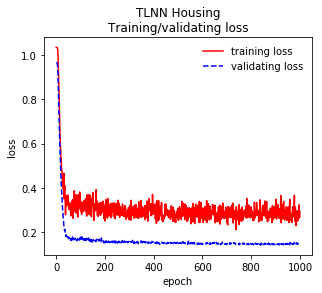

In [14]:
#----------------------------------------
# Summarize history for loss.

plt.figure('TLNN Housing loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('TLNN Housing' + '\n' + 'Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
plt.show()


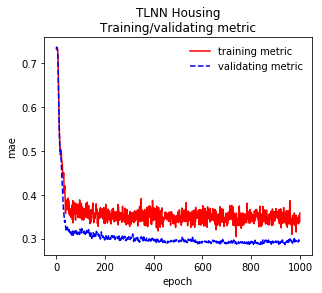

In [15]:
#----------------------------------------
# Summarize history for metric.

plt.figure('TLNN Housing metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('TLNN Housing' + '\n' + 'Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
plt.show()



In [16]:
#----------------------------------------
# Plot the observed and fitted response values.

fitted = model.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train])  # Here, this is used to compute fitted response values.
fitted = fitted[:, 0]

print(fitted.shape)
print(Y_train.shape)

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))


(506,)
(506,)


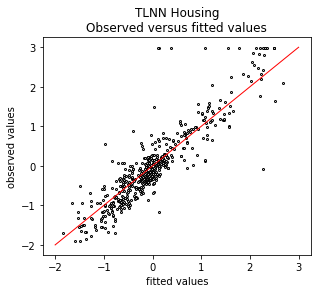

In [17]:
plt.figure('TLNN Housing', figsize = (4.8, 4.0))
plt.plot(fitted, Y_train, 'wo', markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('TLNN Housing' + '\n' + 'Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
plt.show()
